In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas(tqdm())

import os
from dateutil import parser
import cPickle as pickle

# %matplotlib nbagg
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline
import timeit
import time
import datetime as dt


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30



0it [00:00, ?it/s]


<IPython.core.display.Javascript object>

In [2]:
plt.rcParams['figure.figsize'] = (20,20)

In [3]:
## ONLY RUN IF DATA IS NOT CLEAN 
# with open('urinal-data-28-nov.csv','r') as raw, open('urinal-data-28-nov_clean.csv', 'a') as clean_f:
#     for line in raw:
#         if(len(line.split(',')) != 65):
#             print(len(line))
#         else:
#             clean_f.write(line)

In [4]:
# pickle_name = "urinal-data-28-nov_clean.p"
# pickle_path = "F:\\Research\\ben\\grideye_urinal"
# pickle_full = os.path.join(pickle_path, pickle_name)

# print("looking in", pickle_full)
pickle_full = "urinal-data-28-nov_clean.p"

In [163]:
       
#---------- read in pick or read csv, cleanup, and create pickle----------   
if os.path.isfile(pickle_full):
    print("loading pickle")
    df = pd.read_pickle(pickle_full)
else:
    print("creating pickle...")
    print("this will take some time...")
    df = pd.read_csv("urinal-data-28-nov_clean.csv")
    df.columns = ["time"]+["P"+str(x) for x in range(64)]
    
    # remove dirty data
    df = df[[(x[:2] != "TT") for x in df["time"]]]
    df = df[[x[16:18] != ":S" for x in df["time"]]]
        
    # drop indexes where camera had fallen down/face was in camera
    df = df.drop(range(0,97710+14234), axis=0) #drop row
    df["time"] = df["time"].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
    df = df.set_index('time')
    
    #flip image
    cols = []
    for y in range(7,-1,-1):
            for x in range(8):
                cols.append(x*8+y)
            
    cols = ["P"+str(x) for x in cols] 
    df = df.reindex(columns=cols)
   
    # reset column names
    df.columns = ["P"+str(x) for x in range(64)]
    
    
    
    df.to_pickle(pickle_full)


creating pickle...
this will take some time...





  0%|          | 0/3540394 [00:00<?, ?it/s]


  0%|          | 118/3540394 [00:00<50:03, 1178.67it/s]


  0%|          | 371/3540394 [00:00<42:02, 1403.27it/s]


  0%|          | 623/3540394 [00:00<36:28, 1617.45it/s]


  0%|          | 934/3540394 [00:00<31:13, 1889.17it/s]


  0%|          | 1278/3540394 [00:00<27:00, 2183.77it/s]


  0%|          | 1605/3540394 [00:00<24:19, 2425.23it/s]


  0%|          | 1939/3540394 [00:00<22:45, 2591.43it/s]


  0%|          | 2218/3540394 [00:00<26:21, 2237.73it/s]


  0%|          | 2464/3540394 [00:01<29:14, 2015.97it/s]


  0%|          | 2686/3540394 [00:01<31:36, 1865.54it/s]


  0%|          | 2889/3540394 [00:01<33:53, 1739.69it/s]


  0%|          | 3076/3540394 [00:01<34:04, 1729.86it/s]


  0%|          | 3329/3540394 [00:01<30:51, 1910.60it/s]


  0%|          | 3626/3540394 [00:01<27:33, 2138.88it/s]


  0%|          | 3858/3540394 [00:01<27:09, 2170.27it/s]


  0%|          | 4201/3540394 [00:01<24:10, 2438.13it/s]


  0%|      

  1%|          | 38266/3540394 [00:12<18:50, 3099.05it/s]


  1%|          | 38585/3540394 [00:12<18:40, 3124.27it/s]


  1%|          | 38902/3540394 [00:12<18:36, 3137.35it/s]


  1%|          | 39244/3540394 [00:13<18:09, 3214.52it/s]


  1%|          | 39592/3540394 [00:13<17:45, 3287.00it/s]


  1%|          | 39922/3540394 [00:13<18:04, 3228.59it/s]


  1%|          | 40272/3540394 [00:13<17:39, 3303.51it/s]


  1%|          | 40604/3540394 [00:13<17:53, 3259.17it/s]


  1%|          | 40991/3540394 [00:13<17:03, 3420.59it/s]


  1%|          | 41336/3540394 [00:13<17:02, 3422.19it/s]


  1%|          | 41681/3540394 [00:13<17:03, 3417.65it/s]


  1%|          | 42025/3540394 [00:13<18:49, 3098.56it/s]


  1%|          | 42342/3540394 [00:14<19:26, 2999.83it/s]


  1%|          | 42653/3540394 [00:14<19:14, 3030.10it/s]


  1%|          | 42960/3540394 [00:14<19:23, 3006.91it/s]


  1%|          | 43322/3540394 [00:14<18:23, 3167.78it/s]


  1%|          | 43643/3540394 [00:14<19

  2%|▏         | 78356/3540394 [00:25<20:12, 2856.31it/s]


  2%|▏         | 78726/3540394 [00:25<18:49, 3064.56it/s]


  2%|▏         | 79043/3540394 [00:25<19:41, 2930.80it/s]


  2%|▏         | 79404/3540394 [00:25<18:35, 3104.00it/s]


  2%|▏         | 79723/3540394 [00:25<18:35, 3102.42it/s]


  2%|▏         | 80061/3540394 [00:25<18:08, 3177.73it/s]


  2%|▏         | 80384/3540394 [00:26<18:12, 3168.16it/s]


  2%|▏         | 80705/3540394 [00:26<19:12, 3001.29it/s]


  2%|▏         | 81010/3540394 [00:26<19:53, 2898.24it/s]


  2%|▏         | 81304/3540394 [00:26<20:16, 2844.13it/s]


  2%|▏         | 81676/3540394 [00:26<18:50, 3059.57it/s]


  2%|▏         | 81994/3540394 [00:26<18:37, 3093.80it/s]


  2%|▏         | 82357/3540394 [00:26<17:48, 3235.24it/s]


  2%|▏         | 82686/3540394 [00:26<18:07, 3180.66it/s]


  2%|▏         | 83093/3540394 [00:26<16:56, 3401.76it/s]


  2%|▏         | 83441/3540394 [00:26<17:13, 3345.67it/s]


  2%|▏         | 83781/3540394 [00:27<18

  3%|▎         | 118095/3540394 [00:37<17:49, 3199.42it/s]


  3%|▎         | 118424/3540394 [00:38<18:44, 3042.25it/s]


  3%|▎         | 118736/3540394 [00:38<19:39, 2899.97it/s]


  3%|▎         | 119033/3540394 [00:38<19:35, 2910.46it/s]


  3%|▎         | 119329/3540394 [00:38<20:40, 2757.81it/s]


  3%|▎         | 119670/3540394 [00:38<19:30, 2923.39it/s]


  3%|▎         | 119974/3540394 [00:38<19:16, 2957.21it/s]


  3%|▎         | 120356/3540394 [00:38<17:58, 3172.06it/s]


  3%|▎         | 120681/3540394 [00:38<17:56, 3176.93it/s]


  3%|▎         | 121004/3540394 [00:38<18:57, 3007.06it/s]


  3%|▎         | 121311/3540394 [00:39<19:05, 2985.69it/s]


  3%|▎         | 121614/3540394 [00:39<20:25, 2789.82it/s]


  3%|▎         | 121930/3540394 [00:39<19:42, 2890.00it/s]


  3%|▎         | 122224/3540394 [00:39<19:37, 2902.51it/s]


  3%|▎         | 122609/3540394 [00:39<18:11, 3131.56it/s]


  3%|▎         | 122951/3540394 [00:39<17:43, 3212.70it/s]


  3%|▎         | 123279/

  4%|▍         | 157047/3540394 [00:50<16:41, 3378.85it/s]


  4%|▍         | 157438/3540394 [00:50<16:01, 3519.92it/s]


  4%|▍         | 157794/3540394 [00:50<17:02, 3308.61it/s]


  4%|▍         | 158169/3540394 [00:50<16:26, 3429.01it/s]


  4%|▍         | 158517/3540394 [00:50<16:41, 3377.32it/s]


  4%|▍         | 158907/3540394 [00:50<16:01, 3517.42it/s]


  4%|▍         | 159263/3540394 [00:51<17:09, 3284.72it/s]


  5%|▍         | 159598/3540394 [00:51<18:13, 3091.68it/s]


  5%|▍         | 159914/3540394 [00:51<18:48, 2995.41it/s]


  5%|▍         | 160219/3540394 [00:51<19:09, 2940.56it/s]


  5%|▍         | 160606/3540394 [00:51<17:47, 3166.77it/s]


  5%|▍         | 160931/3540394 [00:51<17:39, 3188.47it/s]


  5%|▍         | 161298/3540394 [00:51<16:59, 3315.74it/s]


  5%|▍         | 161665/3540394 [00:51<16:29, 3413.77it/s]


  5%|▍         | 162011/3540394 [00:51<16:57, 3320.29it/s]


  5%|▍         | 162347/3540394 [00:52<17:04, 3298.82it/s]


  5%|▍         | 162680/

  6%|▌         | 197652/3540394 [01:02<17:39, 3155.30it/s]


  6%|▌         | 197973/3540394 [01:03<18:30, 3009.21it/s]


  6%|▌         | 198279/3540394 [01:03<19:12, 2899.40it/s]


  6%|▌         | 198675/3540394 [01:03<17:40, 3150.64it/s]


  6%|▌         | 199011/3540394 [01:03<17:21, 3209.26it/s]


  6%|▌         | 199371/3540394 [01:03<16:49, 3310.28it/s]


  6%|▌         | 199753/3540394 [01:03<16:09, 3445.91it/s]


  6%|▌         | 200103/3540394 [01:03<17:01, 3268.94it/s]


  6%|▌         | 200436/3540394 [01:03<17:03, 3263.72it/s]


  6%|▌         | 200767/3540394 [01:03<17:45, 3134.61it/s]


  6%|▌         | 201085/3540394 [01:03<19:19, 2878.91it/s]


  6%|▌         | 201415/3540394 [01:04<18:35, 2992.76it/s]


  6%|▌         | 201755/3540394 [01:04<17:56, 3102.21it/s]


  6%|▌         | 202072/3540394 [01:04<17:50, 3118.37it/s]


  6%|▌         | 202470/3540394 [01:04<16:41, 3332.51it/s]


  6%|▌         | 202810/3540394 [01:04<16:49, 3306.52it/s]


  6%|▌         | 203146/

  7%|▋         | 238157/3540394 [01:15<17:15, 3187.96it/s]


  7%|▋         | 238480/3540394 [01:15<18:52, 2914.72it/s]


  7%|▋         | 238865/3540394 [01:15<17:30, 3142.53it/s]


  7%|▋         | 239212/3540394 [01:15<17:00, 3233.35it/s]


  7%|▋         | 239597/3540394 [01:15<16:11, 3395.90it/s]


  7%|▋         | 239953/3540394 [01:15<15:58, 3441.88it/s]


  7%|▋         | 240316/3540394 [01:16<15:43, 3495.92it/s]


  7%|▋         | 240670/3540394 [01:16<15:49, 3474.58it/s]


  7%|▋         | 241059/3540394 [01:16<15:19, 3589.53it/s]


  7%|▋         | 241421/3540394 [01:16<16:24, 3349.69it/s]


  7%|▋         | 241774/3540394 [01:16<16:10, 3399.20it/s]


  7%|▋         | 242129/3540394 [01:16<15:58, 3442.36it/s]


  7%|▋         | 242477/3540394 [01:16<16:24, 3349.86it/s]


  7%|▋         | 242832/3540394 [01:16<16:07, 3406.89it/s]


  7%|▋         | 243175/3540394 [01:16<16:26, 3340.75it/s]


  7%|▋         | 243511/3540394 [01:17<16:38, 3302.59it/s]


  7%|▋         | 243884/

  8%|▊         | 276580/3540394 [01:28<17:31, 3104.66it/s]


  8%|▊         | 276896/3540394 [01:28<18:20, 2964.41it/s]


  8%|▊         | 277283/3540394 [01:28<17:03, 3187.04it/s]


  8%|▊         | 277619/3540394 [01:28<16:48, 3235.07it/s]


  8%|▊         | 277988/3540394 [01:28<16:12, 3355.92it/s]


  8%|▊         | 278350/3540394 [01:28<15:51, 3429.91it/s]


  8%|▊         | 278698/3540394 [01:28<16:17, 3336.92it/s]


  8%|▊         | 279044/3540394 [01:28<16:07, 3371.12it/s]


  8%|▊         | 279384/3540394 [01:28<16:24, 3310.67it/s]


  8%|▊         | 279718/3540394 [01:29<16:34, 3279.02it/s]


  8%|▊         | 280048/3540394 [01:29<16:33, 3280.85it/s]


  8%|▊         | 280405/3540394 [01:29<16:09, 3362.12it/s]


  8%|▊         | 280743/3540394 [01:29<16:49, 3229.94it/s]


  8%|▊         | 281083/3540394 [01:29<16:34, 3277.27it/s]


  8%|▊         | 281432/3540394 [01:29<16:16, 3338.16it/s]


  8%|▊         | 281768/3540394 [01:29<16:33, 3279.43it/s]


  8%|▊         | 282115/

  9%|▉         | 317247/3540394 [01:40<17:21, 3094.51it/s]


  9%|▉         | 317606/3540394 [01:40<16:38, 3226.94it/s]


  9%|▉         | 317999/3540394 [01:40<15:45, 3407.87it/s]


  9%|▉         | 318345/3540394 [01:40<15:44, 3412.98it/s]


  9%|▉         | 318719/3540394 [01:41<15:19, 3502.32it/s]


  9%|▉         | 319073/3540394 [01:41<16:53, 3178.89it/s]


  9%|▉         | 319399/3540394 [01:41<17:41, 3035.42it/s]


  9%|▉         | 319710/3540394 [01:41<17:42, 3030.55it/s]


  9%|▉         | 320056/3540394 [01:41<17:03, 3145.23it/s]


  9%|▉         | 320376/3540394 [01:41<17:28, 3070.84it/s]


  9%|▉         | 320778/3540394 [01:41<16:14, 3303.69it/s]


  9%|▉         | 321116/3540394 [01:41<16:24, 3270.67it/s]


  9%|▉         | 321507/3540394 [01:41<15:36, 3436.90it/s]


  9%|▉         | 321857/3540394 [01:41<16:07, 3325.60it/s]


  9%|▉         | 322195/3540394 [01:42<16:39, 3219.96it/s]


  9%|▉         | 322522/3540394 [01:42<17:20, 3093.70it/s]


  9%|▉         | 322836/

 10%|█         | 356252/3540394 [01:53<16:38, 3189.72it/s]


 10%|█         | 356575/3540394 [01:53<17:11, 3086.42it/s]


 10%|█         | 356887/3540394 [01:53<18:39, 2844.37it/s]


 10%|█         | 357239/3540394 [01:53<17:35, 3017.09it/s]


 10%|█         | 357563/3540394 [01:53<17:13, 3079.23it/s]


 10%|█         | 357919/3540394 [01:53<16:32, 3207.24it/s]


 10%|█         | 358245/3540394 [01:53<16:33, 3201.80it/s]


 10%|█         | 358596/3540394 [01:53<16:08, 3286.13it/s]


 10%|█         | 358991/3540394 [01:53<15:19, 3459.30it/s]


 10%|█         | 359342/3540394 [01:54<15:40, 3383.90it/s]


 10%|█         | 359684/3540394 [01:54<16:05, 3295.33it/s]


 10%|█         | 360017/3540394 [01:54<17:23, 3048.41it/s]


 10%|█         | 360355/3540394 [01:54<16:52, 3140.76it/s]


 10%|█         | 360674/3540394 [01:54<17:34, 3016.37it/s]


 10%|█         | 361022/3540394 [01:54<16:52, 3141.03it/s]


 10%|█         | 361341/3540394 [01:54<16:59, 3116.84it/s]


 10%|█         | 361724/

 11%|█         | 395933/3540394 [02:05<19:07, 2740.32it/s]


 11%|█         | 396275/3540394 [02:05<17:59, 2913.41it/s]


 11%|█         | 396619/3540394 [02:05<17:09, 3052.69it/s]


 11%|█         | 396996/3540394 [02:05<16:11, 3235.64it/s]


 11%|█         | 397340/3540394 [02:06<15:54, 3291.21it/s]


 11%|█         | 397675/3540394 [02:06<16:51, 3107.71it/s]


 11%|█         | 397992/3540394 [02:06<18:00, 2907.24it/s]


 11%|█         | 398290/3540394 [02:06<18:13, 2873.76it/s]


 11%|█▏        | 398583/3540394 [02:06<18:10, 2880.59it/s]


 11%|█▏        | 398875/3540394 [02:06<18:55, 2766.64it/s]


 11%|█▏        | 399237/3540394 [02:06<17:35, 2975.03it/s]


 11%|█▏        | 399542/3540394 [02:06<17:30, 2990.56it/s]


 11%|█▏        | 399872/3540394 [02:06<17:01, 3075.48it/s]


 11%|█▏        | 400199/3540394 [02:07<16:43, 3129.21it/s]


 11%|█▏        | 400515/3540394 [02:07<18:04, 2896.06it/s]


 11%|█▏        | 400811/3540394 [02:07<18:29, 2830.22it/s]


 11%|█▏        | 401099/

 12%|█▏        | 435000/3540394 [02:18<18:31, 2792.87it/s]


 12%|█▏        | 435286/3540394 [02:18<18:31, 2794.07it/s]


 12%|█▏        | 435573/3540394 [02:18<18:22, 2815.48it/s]


 12%|█▏        | 435913/3540394 [02:18<17:25, 2968.03it/s]


 12%|█▏        | 436241/3540394 [02:18<16:56, 3055.15it/s]


 12%|█▏        | 436599/3540394 [02:18<16:11, 3194.24it/s]


 12%|█▏        | 436989/3540394 [02:18<15:19, 3376.60it/s]


 12%|█▏        | 437333/3540394 [02:19<16:38, 3106.98it/s]


 12%|█▏        | 437652/3540394 [02:19<17:57, 2879.19it/s]


 12%|█▏        | 437950/3540394 [02:19<18:31, 2792.11it/s]


 12%|█▏        | 438237/3540394 [02:19<18:22, 2814.35it/s]


 12%|█▏        | 438524/3540394 [02:19<19:13, 2688.22it/s]


 12%|█▏        | 438892/3540394 [02:19<17:40, 2923.52it/s]


 12%|█▏        | 439210/3540394 [02:19<17:15, 2994.50it/s]


 12%|█▏        | 439598/3540394 [02:19<16:04, 3213.96it/s]


 12%|█▏        | 439929/3540394 [02:19<16:12, 3186.75it/s]


 12%|█▏        | 440255/

 13%|█▎        | 470462/3540394 [02:30<21:03, 2429.05it/s]


 13%|█▎        | 470707/3540394 [02:30<21:37, 2365.52it/s]


 13%|█▎        | 470946/3540394 [02:31<21:47, 2348.47it/s]


 13%|█▎        | 471183/3540394 [02:31<22:10, 2307.22it/s]


 13%|█▎        | 471423/3540394 [02:31<21:55, 2332.30it/s]


 13%|█▎        | 471688/3540394 [02:31<21:09, 2416.78it/s]


 13%|█▎        | 471931/3540394 [02:31<23:07, 2211.07it/s]


 13%|█▎        | 472157/3540394 [02:31<27:32, 1856.84it/s]


 13%|█▎        | 472356/3540394 [02:31<27:59, 1827.22it/s]


 13%|█▎        | 472593/3540394 [02:31<26:04, 1961.23it/s]


 13%|█▎        | 472799/3540394 [02:32<26:27, 1932.32it/s]


 13%|█▎        | 473044/3540394 [02:32<24:47, 2061.41it/s]


 13%|█▎        | 473262/3540394 [02:32<24:25, 2093.36it/s]


 13%|█▎        | 473489/3540394 [02:32<23:50, 2143.25it/s]


 13%|█▎        | 473732/3540394 [02:32<23:11, 2203.30it/s]


 13%|█▎        | 473956/3540394 [02:32<23:11, 2204.43it/s]


 13%|█▎        | 474201/

 14%|█▍        | 498730/3540394 [02:43<21:55, 2311.55it/s]


 14%|█▍        | 498963/3540394 [02:43<21:52, 2316.87it/s]


 14%|█▍        | 499253/3540394 [02:43<20:33, 2465.34it/s]


 14%|█▍        | 499504/3540394 [02:43<22:21, 2267.42it/s]


 14%|█▍        | 499737/3540394 [02:43<23:51, 2124.71it/s]


 14%|█▍        | 499979/3540394 [02:43<22:58, 2205.08it/s]


 14%|█▍        | 500238/3540394 [02:43<21:57, 2307.37it/s]


 14%|█▍        | 500474/3540394 [02:44<23:06, 2193.17it/s]


 14%|█▍        | 500722/3540394 [02:44<22:18, 2270.43it/s]


 14%|█▍        | 500953/3540394 [02:44<22:54, 2211.94it/s]


 14%|█▍        | 501198/3540394 [02:44<22:15, 2276.08it/s]


 14%|█▍        | 501429/3540394 [02:44<22:54, 2211.63it/s]


 14%|█▍        | 501653/3540394 [02:44<22:53, 2212.41it/s]


 14%|█▍        | 501895/3540394 [02:44<22:18, 2270.21it/s]


 14%|█▍        | 502124/3540394 [02:44<22:52, 2213.91it/s]


 14%|█▍        | 502365/3540394 [02:44<22:18, 2269.19it/s]


 14%|█▍        | 502594/

 15%|█▍        | 526988/3540394 [02:55<21:01, 2388.18it/s]


 15%|█▍        | 527229/3540394 [02:55<21:39, 2319.19it/s]


 15%|█▍        | 527468/3540394 [02:55<21:27, 2339.32it/s]


 15%|█▍        | 527725/3540394 [02:56<20:54, 2401.97it/s]


 15%|█▍        | 527967/3540394 [02:56<22:19, 2249.53it/s]


 15%|█▍        | 528218/3540394 [02:56<21:38, 2319.34it/s]


 15%|█▍        | 528453/3540394 [02:56<22:30, 2230.00it/s]


 15%|█▍        | 528708/3540394 [02:56<21:40, 2315.17it/s]


 15%|█▍        | 528943/3540394 [02:56<23:07, 2170.65it/s]


 15%|█▍        | 529180/3540394 [02:56<22:33, 2225.15it/s]


 15%|█▍        | 529406/3540394 [02:56<23:08, 2167.75it/s]


 15%|█▍        | 529627/3540394 [02:56<23:01, 2179.06it/s]


 15%|█▍        | 529884/3540394 [02:56<21:58, 2283.18it/s]


 15%|█▍        | 530135/3540394 [02:57<21:23, 2344.76it/s]


 15%|█▍        | 530372/3540394 [02:57<22:43, 2208.37it/s]


 15%|█▍        | 530634/3540394 [02:57<21:39, 2316.45it/s]


 15%|█▍        | 530870/

 16%|█▌        | 555050/3540394 [03:08<22:21, 2225.76it/s]


 16%|█▌        | 555311/3540394 [03:08<21:22, 2326.92it/s]


 16%|█▌        | 555549/3540394 [03:08<21:47, 2282.25it/s]


 16%|█▌        | 555805/3540394 [03:08<21:06, 2356.61it/s]


 16%|█▌        | 556089/3540394 [03:08<20:02, 2481.14it/s]


 16%|█▌        | 556341/3540394 [03:08<21:33, 2306.51it/s]


 16%|█▌        | 556587/3540394 [03:08<21:09, 2350.47it/s]


 16%|█▌        | 556826/3540394 [03:08<21:23, 2325.16it/s]


 16%|█▌        | 557062/3540394 [03:09<21:23, 2323.90it/s]


 16%|█▌        | 557297/3540394 [03:09<21:19, 2331.57it/s]


 16%|█▌        | 557532/3540394 [03:09<21:45, 2284.40it/s]


 16%|█▌        | 557787/3540394 [03:09<21:06, 2355.68it/s]


 16%|█▌        | 558024/3540394 [03:09<22:45, 2184.53it/s]


 16%|█▌        | 558266/3540394 [03:09<22:05, 2249.01it/s]


 16%|█▌        | 558494/3540394 [03:09<23:40, 2099.04it/s]


 16%|█▌        | 558781/3540394 [03:09<21:46, 2282.23it/s]


 16%|█▌        | 559017/

 16%|█▋        | 583670/3540394 [03:20<21:02, 2341.53it/s]


 16%|█▋        | 583906/3540394 [03:20<21:37, 2278.33it/s]


 16%|█▋        | 584159/3540394 [03:20<20:59, 2346.48it/s]


 17%|█▋        | 584395/3540394 [03:20<21:57, 2243.09it/s]


 17%|█▋        | 584651/3540394 [03:21<21:08, 2329.55it/s]


 17%|█▋        | 584912/3540394 [03:21<20:28, 2406.59it/s]


 17%|█▋        | 585155/3540394 [03:21<20:48, 2366.49it/s]


 17%|█▋        | 585394/3540394 [03:21<20:59, 2346.15it/s]


 17%|█▋        | 585630/3540394 [03:21<21:36, 2279.28it/s]


 17%|█▋        | 585886/3540394 [03:21<20:54, 2355.13it/s]


 17%|█▋        | 586124/3540394 [03:21<21:56, 2244.67it/s]


 17%|█▋        | 586383/3540394 [03:21<21:03, 2338.06it/s]


 17%|█▋        | 586620/3540394 [03:21<22:21, 2201.53it/s]


 17%|█▋        | 586881/3540394 [03:21<21:19, 2308.31it/s]


 17%|█▋        | 587140/3540394 [03:22<20:37, 2385.97it/s]


 17%|█▋        | 587382/3540394 [03:22<21:48, 2257.20it/s]


 17%|█▋        | 587630/

 17%|█▋        | 613646/3540394 [03:33<18:33, 2629.32it/s]


 17%|█▋        | 613913/3540394 [03:33<19:09, 2546.97it/s]


 17%|█▋        | 614171/3540394 [03:34<19:20, 2521.89it/s]


 17%|█▋        | 614426/3540394 [03:34<19:28, 2504.03it/s]


 17%|█▋        | 614678/3540394 [03:34<20:12, 2412.85it/s]


 17%|█▋        | 614954/3540394 [03:34<19:27, 2505.57it/s]


 17%|█▋        | 615207/3540394 [03:34<19:49, 2458.62it/s]


 17%|█▋        | 615466/3540394 [03:34<19:32, 2495.14it/s]


 17%|█▋        | 615717/3540394 [03:34<19:48, 2461.69it/s]


 17%|█▋        | 615985/3540394 [03:34<19:20, 2520.64it/s]


 17%|█▋        | 616239/3540394 [03:34<19:27, 2505.28it/s]


 17%|█▋        | 616501/3540394 [03:34<19:12, 2536.96it/s]


 17%|█▋        | 616756/3540394 [03:35<19:35, 2487.79it/s]


 17%|█▋        | 617040/3540394 [03:35<18:51, 2582.62it/s]


 17%|█▋        | 617316/3540394 [03:35<18:30, 2632.45it/s]


 17%|█▋        | 617582/3540394 [03:35<18:26, 2640.65it/s]


 17%|█▋        | 617847/

 18%|█▊        | 644378/3540394 [03:46<18:08, 2661.33it/s]


 18%|█▊        | 644646/3540394 [03:46<19:01, 2536.78it/s]


 18%|█▊        | 644936/3540394 [03:46<18:19, 2634.20it/s]


 18%|█▊        | 645203/3540394 [03:46<19:23, 2487.72it/s]


 18%|█▊        | 645456/3540394 [03:46<19:30, 2473.45it/s]


 18%|█▊        | 645706/3540394 [03:46<19:28, 2478.24it/s]


 18%|█▊        | 645956/3540394 [03:46<19:47, 2437.86it/s]


 18%|█▊        | 646217/3540394 [03:46<19:24, 2485.89it/s]


 18%|█▊        | 646467/3540394 [03:46<19:39, 2452.92it/s]


 18%|█▊        | 646714/3540394 [03:47<19:41, 2450.07it/s]


 18%|█▊        | 646960/3540394 [03:47<19:57, 2416.38it/s]


 18%|█▊        | 647207/3540394 [03:47<19:49, 2431.76it/s]


 18%|█▊        | 647451/3540394 [03:47<20:12, 2386.16it/s]


 18%|█▊        | 647707/3540394 [03:47<19:48, 2434.71it/s]


 18%|█▊        | 647954/3540394 [03:47<19:43, 2443.89it/s]


 18%|█▊        | 648199/3540394 [03:47<19:45, 2440.65it/s]


 18%|█▊        | 648444/

 19%|█▉        | 674417/3540394 [03:58<19:37, 2433.96it/s]


 19%|█▉        | 674664/3540394 [03:58<19:32, 2443.61it/s]


 19%|█▉        | 674915/3540394 [03:58<19:24, 2460.85it/s]


 19%|█▉        | 675211/3540394 [03:58<18:26, 2588.42it/s]


 19%|█▉        | 675473/3540394 [03:58<19:08, 2494.23it/s]


 19%|█▉        | 675736/3540394 [03:58<18:51, 2532.11it/s]


 19%|█▉        | 675992/3540394 [03:58<19:42, 2421.92it/s]


 19%|█▉        | 676289/3540394 [03:59<18:37, 2563.47it/s]


 19%|█▉        | 676550/3540394 [03:59<19:25, 2456.71it/s]


 19%|█▉        | 676844/3540394 [03:59<18:28, 2583.34it/s]


 19%|█▉        | 677107/3540394 [03:59<18:46, 2541.08it/s]


 19%|█▉        | 677375/3540394 [03:59<18:29, 2579.74it/s]


 19%|█▉        | 677645/3540394 [03:59<18:15, 2613.22it/s]


 19%|█▉        | 677909/3540394 [03:59<19:20, 2465.59it/s]


 19%|█▉        | 678168/3540394 [03:59<19:04, 2500.21it/s]


 19%|█▉        | 678421/3540394 [03:59<19:11, 2484.89it/s]


 19%|█▉        | 678698/

 20%|█▉        | 705220/3540394 [04:10<19:07, 2470.31it/s]


 20%|█▉        | 705509/3540394 [04:10<18:17, 2582.41it/s]


 20%|█▉        | 705770/3540394 [04:10<18:58, 2490.45it/s]


 20%|█▉        | 706051/3540394 [04:10<18:19, 2577.99it/s]


 20%|█▉        | 706338/3540394 [04:11<17:45, 2658.72it/s]


 20%|█▉        | 706607/3540394 [04:11<18:10, 2598.66it/s]


 20%|█▉        | 706869/3540394 [04:11<18:36, 2537.65it/s]


 20%|█▉        | 707125/3540394 [04:11<18:51, 2503.44it/s]


 20%|█▉        | 707408/3540394 [04:11<18:12, 2592.11it/s]


 20%|█▉        | 707669/3540394 [04:11<18:47, 2513.44it/s]


 20%|█▉        | 707923/3540394 [04:11<18:44, 2517.99it/s]


 20%|██        | 708177/3540394 [04:11<19:16, 2448.19it/s]


 20%|██        | 708428/3540394 [04:11<19:08, 2466.37it/s]


 20%|██        | 708681/3540394 [04:11<19:00, 2483.30it/s]


 20%|██        | 708970/3540394 [04:12<18:12, 2591.95it/s]


 20%|██        | 709233/3540394 [04:12<18:08, 2601.30it/s]


 20%|██        | 709495/

 21%|██        | 735857/3540394 [04:22<19:09, 2439.20it/s]


 21%|██        | 736111/3540394 [04:22<18:57, 2466.17it/s]


 21%|██        | 736359/3540394 [04:23<19:24, 2407.97it/s]


 21%|██        | 736644/3540394 [04:23<18:31, 2522.25it/s]


 21%|██        | 736899/3540394 [04:23<19:15, 2425.33it/s]


 21%|██        | 737194/3540394 [04:23<18:21, 2545.79it/s]


 21%|██        | 737452/3540394 [04:23<18:41, 2498.31it/s]


 21%|██        | 737747/3540394 [04:23<17:50, 2616.94it/s]


 21%|██        | 738012/3540394 [04:23<17:58, 2598.89it/s]


 21%|██        | 738275/3540394 [04:23<18:28, 2528.62it/s]


 21%|██        | 738553/3540394 [04:23<17:58, 2598.80it/s]


 21%|██        | 738815/3540394 [04:23<18:37, 2505.89it/s]


 21%|██        | 739068/3540394 [04:24<18:47, 2483.76it/s]


 21%|██        | 739318/3540394 [04:24<18:47, 2484.03it/s]


 21%|██        | 739579/3540394 [04:24<18:31, 2519.79it/s]


 21%|██        | 739832/3540394 [04:24<18:53, 2470.69it/s]


 21%|██        | 740087/

 22%|██▏       | 763961/3540394 [04:35<22:17, 2076.34it/s]


 22%|██▏       | 764213/3540394 [04:35<21:07, 2190.36it/s]


 22%|██▏       | 764492/3540394 [04:35<19:46, 2340.07it/s]


 22%|██▏       | 764769/3540394 [04:35<18:51, 2452.71it/s]


 22%|██▏       | 765051/3540394 [04:35<18:07, 2552.07it/s]


 22%|██▏       | 765338/3540394 [04:35<17:31, 2638.37it/s]


 22%|██▏       | 765614/3540394 [04:35<17:18, 2672.19it/s]


 22%|██▏       | 765885/3540394 [04:36<17:28, 2645.38it/s]


 22%|██▏       | 766152/3540394 [04:36<17:33, 2633.05it/s]


 22%|██▏       | 766417/3540394 [04:36<17:41, 2614.49it/s]


 22%|██▏       | 766695/3540394 [04:36<17:22, 2661.35it/s]


 22%|██▏       | 766963/3540394 [04:36<19:26, 2377.92it/s]


 22%|██▏       | 767208/3540394 [04:36<19:20, 2389.00it/s]


 22%|██▏       | 767459/3540394 [04:36<19:04, 2423.82it/s]


 22%|██▏       | 767705/3540394 [04:36<20:33, 2248.21it/s]


 22%|██▏       | 767952/3540394 [04:36<20:00, 2309.99it/s]


 22%|██▏       | 768190/

 22%|██▏       | 791197/3540394 [04:48<20:35, 2225.45it/s]


 22%|██▏       | 791423/3540394 [04:48<20:31, 2231.62it/s]


 22%|██▏       | 791647/3540394 [04:48<20:51, 2196.04it/s]


 22%|██▏       | 791870/3540394 [04:48<20:46, 2204.76it/s]


 22%|██▏       | 792091/3540394 [04:48<21:27, 2135.29it/s]


 22%|██▏       | 792331/3540394 [04:48<20:45, 2206.47it/s]


 22%|██▏       | 792553/3540394 [04:48<21:21, 2144.21it/s]


 22%|██▏       | 792788/3540394 [04:48<20:48, 2200.60it/s]


 22%|██▏       | 793019/3540394 [04:48<20:34, 2225.74it/s]


 22%|██▏       | 793243/3540394 [04:49<20:44, 2207.36it/s]


 22%|██▏       | 793489/3540394 [04:49<20:06, 2276.09it/s]


 22%|██▏       | 793718/3540394 [04:49<20:49, 2198.97it/s]


 22%|██▏       | 793964/3540394 [04:49<20:11, 2266.57it/s]


 22%|██▏       | 794193/3540394 [04:49<21:05, 2169.43it/s]


 22%|██▏       | 794412/3540394 [04:49<21:06, 2168.06it/s]


 22%|██▏       | 794666/3540394 [04:49<20:11, 2267.23it/s]


 22%|██▏       | 794895/

 23%|██▎       | 814497/3540394 [05:01<25:46, 1762.10it/s]


 23%|██▎       | 814687/3540394 [05:01<25:14, 1800.09it/s]


 23%|██▎       | 814878/3540394 [05:01<24:49, 1830.03it/s]


 23%|██▎       | 815063/3540394 [05:01<27:45, 1636.11it/s]


 23%|██▎       | 815232/3540394 [05:01<27:51, 1630.22it/s]


 23%|██▎       | 815423/3540394 [05:01<26:43, 1699.48it/s]


 23%|██▎       | 815597/3540394 [05:01<28:43, 1580.68it/s]


 23%|██▎       | 815777/3540394 [05:01<27:40, 1640.61it/s]


 23%|██▎       | 815945/3540394 [05:01<27:35, 1645.92it/s]


 23%|██▎       | 816112/3540394 [05:02<28:13, 1608.44it/s]


 23%|██▎       | 816290/3540394 [05:02<27:26, 1654.94it/s]


 23%|██▎       | 816458/3540394 [05:02<27:50, 1630.25it/s]


 23%|██▎       | 816623/3540394 [05:02<28:04, 1617.36it/s]


 23%|██▎       | 816849/3540394 [05:02<25:41, 1767.04it/s]


 23%|██▎       | 817031/3540394 [05:02<27:42, 1638.49it/s]


 23%|██▎       | 817272/3540394 [05:02<25:02, 1811.80it/s]


 23%|██▎       | 817478/

 24%|██▎       | 838407/3540394 [05:13<25:49, 1743.26it/s]


 24%|██▎       | 838622/3540394 [05:13<24:22, 1847.96it/s]


 24%|██▎       | 838845/3540394 [05:13<23:07, 1946.59it/s]


 24%|██▎       | 839046/3540394 [05:14<23:01, 1955.66it/s]


 24%|██▎       | 839262/3540394 [05:14<22:22, 2012.68it/s]


 24%|██▎       | 839467/3540394 [05:14<22:34, 1994.46it/s]


 24%|██▎       | 839669/3540394 [05:14<23:20, 1928.08it/s]


 24%|██▎       | 839887/3540394 [05:14<22:34, 1993.44it/s]


 24%|██▎       | 840089/3540394 [05:14<22:59, 1958.00it/s]


 24%|██▎       | 840331/3540394 [05:14<21:41, 2075.27it/s]


 24%|██▎       | 840542/3540394 [05:14<22:37, 1988.32it/s]


 24%|██▎       | 840753/3540394 [05:14<22:14, 2022.20it/s]


 24%|██▍       | 840993/3540394 [05:14<21:12, 2121.14it/s]


 24%|██▍       | 841208/3540394 [05:15<22:05, 2036.28it/s]


 24%|██▍       | 841429/3540394 [05:15<21:35, 2083.62it/s]


 24%|██▍       | 841640/3540394 [05:15<22:26, 2004.15it/s]


 24%|██▍       | 841889/

 24%|██▍       | 864796/3540394 [05:26<21:31, 2071.29it/s]


 24%|██▍       | 865042/3540394 [05:26<20:30, 2174.35it/s]


 24%|██▍       | 865263/3540394 [05:26<21:41, 2055.23it/s]


 24%|██▍       | 865473/3540394 [05:26<22:17, 1999.58it/s]


 24%|██▍       | 865694/3540394 [05:26<21:39, 2057.63it/s]


 24%|██▍       | 865903/3540394 [05:26<22:16, 2000.64it/s]


 24%|██▍       | 866122/3540394 [05:26<21:43, 2051.96it/s]


 24%|██▍       | 866329/3540394 [05:26<22:39, 1967.34it/s]


 24%|██▍       | 866546/3540394 [05:26<22:02, 2022.11it/s]


 24%|██▍       | 866770/3540394 [05:27<21:25, 2080.57it/s]


 24%|██▍       | 866990/3540394 [05:27<21:05, 2113.10it/s]


 24%|██▍       | 867203/3540394 [05:27<22:33, 1974.50it/s]


 25%|██▍       | 867418/3540394 [05:27<22:08, 2011.64it/s]


 25%|██▍       | 867622/3540394 [05:27<22:53, 1945.85it/s]


 25%|██▍       | 867851/3540394 [05:27<21:52, 2036.74it/s]


 25%|██▍       | 868058/3540394 [05:27<21:56, 2030.44it/s]


 25%|██▍       | 868263/

 25%|██▌       | 891187/3540394 [05:38<19:21, 2281.63it/s]


 25%|██▌       | 891453/3540394 [05:38<18:31, 2382.94it/s]


 25%|██▌       | 891696/3540394 [05:38<19:30, 2262.36it/s]


 25%|██▌       | 891932/3540394 [05:38<19:16, 2290.64it/s]


 25%|██▌       | 892202/3540394 [05:38<18:23, 2399.47it/s]


 25%|██▌       | 892446/3540394 [05:39<19:35, 2253.05it/s]


 25%|██▌       | 892676/3540394 [05:39<19:57, 2211.42it/s]


 25%|██▌       | 892913/3540394 [05:39<19:33, 2255.95it/s]


 25%|██▌       | 893142/3540394 [05:39<19:38, 2245.70it/s]


 25%|██▌       | 893369/3540394 [05:39<20:48, 2120.56it/s]


 25%|██▌       | 893584/3540394 [05:39<20:59, 2101.01it/s]


 25%|██▌       | 893796/3540394 [05:39<21:51, 2017.60it/s]


 25%|██▌       | 894028/3540394 [05:39<21:00, 2099.47it/s]


 25%|██▌       | 894241/3540394 [05:39<21:24, 2060.72it/s]


 25%|██▌       | 894465/3540394 [05:40<20:54, 2109.09it/s]


 25%|██▌       | 894698/3540394 [05:40<20:19, 2170.26it/s]


 25%|██▌       | 894917/

 26%|██▌       | 917506/3540394 [05:51<21:04, 2074.00it/s]


 26%|██▌       | 917716/3540394 [05:51<21:04, 2073.92it/s]


 26%|██▌       | 917962/3540394 [05:51<20:04, 2176.30it/s]


 26%|██▌       | 918182/3540394 [05:51<21:08, 2066.62it/s]


 26%|██▌       | 918404/3540394 [05:51<20:43, 2109.35it/s]


 26%|██▌       | 918637/3540394 [05:51<20:07, 2170.60it/s]


 26%|██▌       | 918856/3540394 [05:51<20:52, 2093.16it/s]


 26%|██▌       | 919083/3540394 [05:51<20:24, 2141.13it/s]


 26%|██▌       | 919299/3540394 [05:51<21:27, 2035.07it/s]


 26%|██▌       | 919520/3540394 [05:51<20:58, 2083.31it/s]


 26%|██▌       | 919758/3540394 [05:52<20:11, 2163.59it/s]


 26%|██▌       | 919977/3540394 [05:52<20:18, 2151.09it/s]


 26%|██▌       | 920194/3540394 [05:52<21:14, 2055.40it/s]


 26%|██▌       | 920424/3540394 [05:52<20:34, 2122.37it/s]


 26%|██▌       | 920639/3540394 [05:52<20:56, 2084.94it/s]


 26%|██▌       | 920850/3540394 [05:52<20:52, 2091.17it/s]


 26%|██▌       | 921095/

 27%|██▋       | 944151/3540394 [06:03<19:59, 2163.64it/s]


 27%|██▋       | 944387/3540394 [06:03<19:31, 2216.44it/s]


 27%|██▋       | 944610/3540394 [06:03<20:22, 2123.30it/s]


 27%|██▋       | 944840/3540394 [06:03<19:54, 2172.15it/s]


 27%|██▋       | 945098/3540394 [06:03<18:58, 2278.88it/s]


 27%|██▋       | 945329/3540394 [06:03<19:36, 2205.87it/s]


 27%|██▋       | 945567/3540394 [06:03<19:10, 2255.07it/s]


 27%|██▋       | 945803/3540394 [06:04<18:56, 2283.78it/s]


 27%|██▋       | 946033/3540394 [06:04<18:56, 2282.23it/s]


 27%|██▋       | 946282/3540394 [06:04<18:28, 2339.99it/s]


 27%|██▋       | 946518/3540394 [06:04<19:23, 2228.61it/s]


 27%|██▋       | 946760/3540394 [06:04<18:57, 2280.68it/s]


 27%|██▋       | 946990/3540394 [06:04<19:33, 2210.80it/s]


 27%|██▋       | 947230/3540394 [06:04<19:05, 2264.05it/s]


 27%|██▋       | 947458/3540394 [06:04<19:41, 2194.45it/s]


 27%|██▋       | 947679/3540394 [06:04<19:39, 2198.43it/s]


 27%|██▋       | 947927/

 27%|██▋       | 971209/3540394 [06:15<19:20, 2213.74it/s]


 27%|██▋       | 971434/3540394 [06:15<19:23, 2208.46it/s]


 27%|██▋       | 971685/3540394 [06:15<18:41, 2290.24it/s]


 27%|██▋       | 971924/3540394 [06:15<18:27, 2318.87it/s]


 27%|██▋       | 972158/3540394 [06:16<18:54, 2263.74it/s]


 27%|██▋       | 972416/3540394 [06:16<18:13, 2349.40it/s]


 27%|██▋       | 972655/3540394 [06:16<18:08, 2358.83it/s]


 27%|██▋       | 972893/3540394 [06:16<19:00, 2250.28it/s]


 27%|██▋       | 973120/3540394 [06:16<19:06, 2238.87it/s]


 27%|██▋       | 973346/3540394 [06:16<20:07, 2126.05it/s]


 27%|██▋       | 973577/3540394 [06:16<19:40, 2174.61it/s]


 28%|██▊       | 973797/3540394 [06:16<20:47, 2057.39it/s]


 28%|██▊       | 974031/3540394 [06:16<20:02, 2133.64it/s]


 28%|██▊       | 974248/3540394 [06:17<19:56, 2144.02it/s]


 28%|██▊       | 974465/3540394 [06:17<19:57, 2142.12it/s]


 28%|██▊       | 974691/3540394 [06:17<19:39, 2175.14it/s]


 28%|██▊       | 974910/

 28%|██▊       | 996566/3540394 [06:29<18:01, 2352.49it/s]


 28%|██▊       | 996806/3540394 [06:29<19:42, 2151.69it/s]


 28%|██▊       | 997028/3540394 [06:29<19:31, 2171.26it/s]


 28%|██▊       | 997250/3540394 [06:29<19:52, 2132.31it/s]


 28%|██▊       | 997467/3540394 [06:29<19:53, 2130.42it/s]


 28%|██▊       | 997722/3540394 [06:29<18:55, 2240.06it/s]


 28%|██▊       | 997950/3540394 [06:29<19:22, 2187.08it/s]


 28%|██▊       | 998174/3540394 [06:29<19:15, 2200.81it/s]


 28%|██▊       | 998396/3540394 [06:29<19:19, 2191.74it/s]


 28%|██▊       | 998630/3540394 [06:30<18:58, 2233.46it/s]


 28%|██▊       | 998886/3540394 [06:30<18:14, 2321.93it/s]


 28%|██▊       | 999120/3540394 [06:30<19:22, 2185.96it/s]


 28%|██▊       | 999361/3540394 [06:30<18:50, 2247.67it/s]


 28%|██▊       | 999589/3540394 [06:30<19:23, 2183.68it/s]


 28%|██▊       | 999836/3540394 [06:30<18:43, 2262.11it/s]


 28%|██▊       | 1000099/3540394 [06:30<17:55, 2361.13it/s]


 28%|██▊       | 100035

 29%|██▉       | 1022130/3540394 [06:41<19:09, 2190.19it/s]


 29%|██▉       | 1022352/3540394 [06:41<19:57, 2102.04it/s]


 29%|██▉       | 1022569/3540394 [06:41<19:46, 2121.39it/s]


 29%|██▉       | 1022809/3540394 [06:41<19:05, 2197.93it/s]


 29%|██▉       | 1023031/3540394 [06:41<19:53, 2108.51it/s]


 29%|██▉       | 1023252/3540394 [06:41<19:37, 2136.94it/s]


 29%|██▉       | 1023468/3540394 [06:42<20:07, 2084.95it/s]


 29%|██▉       | 1023678/3540394 [06:42<21:01, 1994.28it/s]


 29%|██▉       | 1023880/3540394 [06:42<21:41, 1933.05it/s]


 29%|██▉       | 1024075/3540394 [06:42<22:28, 1866.50it/s]


 29%|██▉       | 1024297/3540394 [06:42<21:24, 1958.08it/s]


 29%|██▉       | 1024496/3540394 [06:42<21:35, 1942.68it/s]


 29%|██▉       | 1024741/3540394 [06:42<20:14, 2070.76it/s]


 29%|██▉       | 1024956/3540394 [06:42<20:01, 2093.06it/s]


 29%|██▉       | 1025168/3540394 [06:42<20:43, 2021.94it/s]


 29%|██▉       | 1025392/3540394 [06:43<20:07, 2082.24it/s]


 29%|██▉

 30%|██▉       | 1049306/3540394 [06:53<19:38, 2113.19it/s]


 30%|██▉       | 1049519/3540394 [06:53<20:21, 2039.69it/s]


 30%|██▉       | 1049726/3540394 [06:54<20:17, 2045.87it/s]


 30%|██▉       | 1049958/3540394 [06:54<19:35, 2119.10it/s]


 30%|██▉       | 1050172/3540394 [06:54<19:51, 2089.57it/s]


 30%|██▉       | 1050400/3540394 [06:54<19:22, 2142.09it/s]


 30%|██▉       | 1050616/3540394 [06:54<20:00, 2073.87it/s]


 30%|██▉       | 1050825/3540394 [06:54<21:32, 1926.10it/s]


 30%|██▉       | 1051047/3540394 [06:54<20:42, 2002.79it/s]


 30%|██▉       | 1051251/3540394 [06:54<21:14, 1953.38it/s]


 30%|██▉       | 1051479/3540394 [06:54<20:19, 2040.78it/s]


 30%|██▉       | 1051686/3540394 [06:55<20:53, 1985.61it/s]


 30%|██▉       | 1051906/3540394 [06:55<20:17, 2043.81it/s]


 30%|██▉       | 1052135/3540394 [06:55<19:38, 2111.36it/s]


 30%|██▉       | 1052349/3540394 [06:55<20:09, 2057.84it/s]


 30%|██▉       | 1052590/3540394 [06:55<19:17, 2150.14it/s]


 30%|██▉

 30%|███       | 1075590/3540394 [07:05<18:09, 2262.42it/s]


 30%|███       | 1075846/3540394 [07:06<17:31, 2343.35it/s]


 30%|███       | 1076082/3540394 [07:06<19:07, 2148.29it/s]


 30%|███       | 1076313/3540394 [07:06<18:43, 2193.01it/s]


 30%|███       | 1076536/3540394 [07:06<18:47, 2185.23it/s]


 30%|███       | 1076757/3540394 [07:06<18:48, 2182.83it/s]


 30%|███       | 1076992/3540394 [07:06<18:25, 2228.47it/s]


 30%|███       | 1077217/3540394 [07:06<19:09, 2143.62it/s]


 30%|███       | 1077443/3540394 [07:06<18:51, 2176.74it/s]


 30%|███       | 1077662/3540394 [07:06<20:20, 2017.16it/s]


 30%|███       | 1077891/3540394 [07:07<19:38, 2090.28it/s]


 30%|███       | 1078150/3540394 [07:07<18:30, 2216.72it/s]


 30%|███       | 1078393/3540394 [07:07<18:02, 2275.36it/s]


 30%|███       | 1078624/3540394 [07:07<18:51, 2175.99it/s]


 30%|███       | 1078874/3540394 [07:07<18:08, 2261.36it/s]


 30%|███       | 1079104/3540394 [07:07<18:34, 2209.34it/s]


 30%|███

 31%|███       | 1101061/3540394 [07:18<18:32, 2192.60it/s]


 31%|███       | 1101283/3540394 [07:18<19:00, 2138.40it/s]


 31%|███       | 1101499/3540394 [07:18<19:03, 2132.22it/s]


 31%|███       | 1101758/3540394 [07:18<18:03, 2250.17it/s]


 31%|███       | 1101986/3540394 [07:18<18:10, 2235.62it/s]


 31%|███       | 1102212/3540394 [07:19<18:34, 2187.07it/s]


 31%|███       | 1102457/3540394 [07:19<17:59, 2258.98it/s]


 31%|███       | 1102700/3540394 [07:19<17:36, 2306.39it/s]


 31%|███       | 1102933/3540394 [07:19<19:10, 2119.35it/s]


 31%|███       | 1103184/3540394 [07:19<18:21, 2212.76it/s]


 31%|███       | 1103410/3540394 [07:19<19:02, 2133.34it/s]


 31%|███       | 1103654/3540394 [07:19<18:20, 2215.21it/s]


 31%|███       | 1103879/3540394 [07:19<19:14, 2110.30it/s]


 31%|███       | 1104128/3540394 [07:19<18:21, 2210.87it/s]


 31%|███       | 1104409/3540394 [07:19<17:11, 2361.46it/s]


 31%|███       | 1104651/3540394 [07:20<17:53, 2268.33it/s]


 31%|███

 32%|███▏      | 1127605/3540394 [07:30<18:04, 2224.26it/s]


 32%|███▏      | 1127829/3540394 [07:30<18:48, 2137.35it/s]


 32%|███▏      | 1128045/3540394 [07:30<19:34, 2054.08it/s]


 32%|███▏      | 1128285/3540394 [07:31<18:44, 2144.76it/s]


 32%|███▏      | 1128510/3540394 [07:31<18:30, 2171.04it/s]


 32%|███▏      | 1128748/3540394 [07:31<18:01, 2229.36it/s]


 32%|███▏      | 1128973/3540394 [07:31<18:37, 2158.27it/s]


 32%|███▏      | 1129191/3540394 [07:31<18:59, 2115.64it/s]


 32%|███▏      | 1129442/3540394 [07:31<18:06, 2219.69it/s]


 32%|███▏      | 1129667/3540394 [07:31<18:49, 2134.19it/s]


 32%|███▏      | 1129940/3540394 [07:31<17:35, 2283.21it/s]


 32%|███▏      | 1130173/3540394 [07:31<18:31, 2169.39it/s]


 32%|███▏      | 1130417/3540394 [07:32<17:54, 2243.35it/s]


 32%|███▏      | 1130661/3540394 [07:32<17:28, 2298.35it/s]


 32%|███▏      | 1130907/3540394 [07:32<17:08, 2342.51it/s]


 32%|███▏      | 1131144/3540394 [07:32<17:22, 2310.81it/s]


 32%|███

 33%|███▎      | 1155091/3540394 [07:42<18:08, 2191.88it/s]


 33%|███▎      | 1155312/3540394 [07:43<18:29, 2149.95it/s]


 33%|███▎      | 1155531/3540394 [07:43<18:24, 2160.03it/s]


 33%|███▎      | 1155760/3540394 [07:43<18:05, 2197.37it/s]


 33%|███▎      | 1155981/3540394 [07:43<18:12, 2183.37it/s]


 33%|███▎      | 1156209/3540394 [07:43<17:58, 2210.23it/s]


 33%|███▎      | 1156440/3540394 [07:43<17:45, 2237.77it/s]


 33%|███▎      | 1156665/3540394 [07:43<18:10, 2185.89it/s]


 33%|███▎      | 1156902/3540394 [07:43<17:45, 2236.12it/s]


 33%|███▎      | 1157127/3540394 [07:43<18:53, 2102.93it/s]


 33%|███▎      | 1157373/3540394 [07:44<18:03, 2198.66it/s]


 33%|███▎      | 1157596/3540394 [07:44<18:50, 2107.69it/s]


 33%|███▎      | 1157832/3540394 [07:44<18:14, 2177.51it/s]


 33%|███▎      | 1158068/3540394 [07:44<17:49, 2227.70it/s]


 33%|███▎      | 1158316/3540394 [07:44<17:16, 2297.42it/s]


 33%|███▎      | 1158548/3540394 [07:44<18:13, 2178.07it/s]


 33%|███

 33%|███▎      | 1181642/3540394 [07:55<17:58, 2186.28it/s]


 33%|███▎      | 1181864/3540394 [07:55<19:17, 2036.82it/s]


 33%|███▎      | 1182092/3540394 [07:55<18:42, 2101.83it/s]


 33%|███▎      | 1182358/3540394 [07:55<17:31, 2242.62it/s]


 33%|███▎      | 1182588/3540394 [07:55<17:56, 2190.69it/s]


 33%|███▎      | 1182811/3540394 [07:55<18:16, 2150.51it/s]


 33%|███▎      | 1183029/3540394 [07:55<18:33, 2118.00it/s]


 33%|███▎      | 1183245/3540394 [07:55<18:27, 2129.30it/s]


 33%|███▎      | 1183469/3540394 [07:56<18:10, 2161.10it/s]


 33%|███▎      | 1183687/3540394 [07:56<18:53, 2079.00it/s]


 33%|███▎      | 1183933/3540394 [07:56<18:01, 2179.83it/s]


 33%|███▎      | 1184154/3540394 [07:56<18:45, 2094.37it/s]


 33%|███▎      | 1184381/3540394 [07:56<18:19, 2142.56it/s]


 33%|███▎      | 1184598/3540394 [07:56<18:18, 2144.91it/s]


 33%|███▎      | 1184828/3540394 [07:56<17:56, 2187.40it/s]


 33%|███▎      | 1185048/3540394 [07:56<18:07, 2166.58it/s]


 33%|███

 34%|███▍      | 1208206/3540394 [08:07<17:47, 2184.81it/s]


 34%|███▍      | 1208437/3540394 [08:07<17:30, 2220.33it/s]


 34%|███▍      | 1208661/3540394 [08:07<18:31, 2097.99it/s]


 34%|███▍      | 1208892/3540394 [08:07<18:00, 2157.00it/s]


 34%|███▍      | 1209149/3540394 [08:07<17:09, 2264.35it/s]


 34%|███▍      | 1209379/3540394 [08:07<17:52, 2173.19it/s]


 34%|███▍      | 1209613/3540394 [08:07<17:29, 2220.26it/s]


 34%|███▍      | 1209877/3540394 [08:08<16:39, 2331.36it/s]


 34%|███▍      | 1210114/3540394 [08:08<17:47, 2182.23it/s]


 34%|███▍      | 1210366/3540394 [08:08<17:05, 2272.45it/s]


 34%|███▍      | 1210598/3540394 [08:08<17:14, 2252.65it/s]


 34%|███▍      | 1210826/3540394 [08:08<17:33, 2210.85it/s]


 34%|███▍      | 1211050/3540394 [08:08<18:10, 2135.29it/s]


 34%|███▍      | 1211281/3540394 [08:08<17:46, 2182.99it/s]


 34%|███▍      | 1211501/3540394 [08:08<18:43, 2073.27it/s]


 34%|███▍      | 1211730/3540394 [08:08<18:12, 2131.87it/s]


 34%|███

 35%|███▍      | 1234291/3540394 [08:19<18:41, 2055.99it/s]


 35%|███▍      | 1234534/3540394 [08:19<17:50, 2153.87it/s]


 35%|███▍      | 1234761/3540394 [08:19<17:34, 2185.64it/s]


 35%|███▍      | 1234987/3540394 [08:19<17:24, 2207.38it/s]


 35%|███▍      | 1235223/3540394 [08:20<17:04, 2250.73it/s]


 35%|███▍      | 1235450/3540394 [08:20<17:12, 2231.96it/s]


 35%|███▍      | 1235686/3540394 [08:20<16:56, 2268.05it/s]


 35%|███▍      | 1235914/3540394 [08:20<17:21, 2213.71it/s]


 35%|███▍      | 1236137/3540394 [08:20<17:38, 2177.30it/s]


 35%|███▍      | 1236375/3540394 [08:20<17:11, 2233.66it/s]


 35%|███▍      | 1236600/3540394 [08:20<18:11, 2110.93it/s]


 35%|███▍      | 1236843/3540394 [08:20<17:29, 2195.69it/s]


 35%|███▍      | 1237065/3540394 [08:20<17:47, 2157.45it/s]


 35%|███▍      | 1237292/3540394 [08:21<17:31, 2189.38it/s]


 35%|███▍      | 1237544/3540394 [08:21<16:50, 2277.80it/s]


 35%|███▍      | 1237774/3540394 [08:21<17:13, 2228.56it/s]


 35%|███

 36%|███▌      | 1260728/3540394 [08:31<17:28, 2174.54it/s]


 36%|███▌      | 1260948/3540394 [08:31<17:39, 2152.43it/s]


 36%|███▌      | 1261178/3540394 [08:32<17:18, 2193.92it/s]


 36%|███▌      | 1261411/3540394 [08:32<17:01, 2231.63it/s]


 36%|███▌      | 1261636/3540394 [08:32<18:32, 2048.91it/s]


 36%|███▌      | 1261867/3540394 [08:32<17:55, 2119.37it/s]


 36%|███▌      | 1262083/3540394 [08:32<17:54, 2119.47it/s]


 36%|███▌      | 1262310/3540394 [08:32<17:34, 2160.68it/s]


 36%|███▌      | 1262528/3540394 [08:32<18:25, 2059.93it/s]


 36%|███▌      | 1262737/3540394 [08:32<19:21, 1961.34it/s]


 36%|███▌      | 1262936/3540394 [08:32<19:20, 1962.88it/s]


 36%|███▌      | 1263135/3540394 [08:33<21:57, 1727.97it/s]


 36%|███▌      | 1263327/3540394 [08:33<21:18, 1780.51it/s]


 36%|███▌      | 1263510/3540394 [08:33<22:25, 1691.82it/s]


 36%|███▌      | 1263698/3540394 [08:33<21:46, 1742.74it/s]


 36%|███▌      | 1263879/3540394 [08:33<21:36, 1755.65it/s]


 36%|███

 36%|███▋      | 1287414/3540394 [08:44<17:30, 2144.45it/s]


 36%|███▋      | 1287647/3540394 [08:44<17:05, 2195.97it/s]


 36%|███▋      | 1287909/3540394 [08:45<16:16, 2307.16it/s]


 36%|███▋      | 1288166/3540394 [08:45<15:46, 2379.52it/s]


 36%|███▋      | 1288407/3540394 [08:45<16:57, 2214.05it/s]


 36%|███▋      | 1288640/3540394 [08:45<16:43, 2244.97it/s]


 36%|███▋      | 1288896/3540394 [08:45<16:07, 2327.47it/s]


 36%|███▋      | 1289132/3540394 [08:45<17:21, 2161.33it/s]


 36%|███▋      | 1289371/3540394 [08:45<16:51, 2224.52it/s]


 36%|███▋      | 1289598/3540394 [08:45<17:22, 2158.31it/s]


 36%|███▋      | 1289848/3540394 [08:45<16:40, 2250.06it/s]


 36%|███▋      | 1290077/3540394 [08:46<16:55, 2215.75it/s]


 36%|███▋      | 1290318/3540394 [08:46<16:31, 2268.55it/s]


 36%|███▋      | 1290547/3540394 [08:46<16:57, 2210.08it/s]


 36%|███▋      | 1290783/3540394 [08:46<16:38, 2252.56it/s]


 36%|███▋      | 1291010/3540394 [08:46<17:02, 2200.37it/s]


 36%|███

 37%|███▋      | 1313254/3540394 [08:57<16:55, 2192.37it/s]


 37%|███▋      | 1313490/3540394 [08:57<16:34, 2238.79it/s]


 37%|███▋      | 1313716/3540394 [08:57<17:22, 2136.16it/s]


 37%|███▋      | 1313947/3540394 [08:57<16:59, 2182.85it/s]


 37%|███▋      | 1314168/3540394 [08:57<17:00, 2181.78it/s]


 37%|███▋      | 1314388/3540394 [08:57<17:11, 2158.73it/s]


 37%|███▋      | 1314637/3540394 [08:57<16:30, 2246.47it/s]


 37%|███▋      | 1314864/3540394 [08:57<16:32, 2242.30it/s]


 37%|███▋      | 1315093/3540394 [08:57<16:26, 2254.75it/s]


 37%|███▋      | 1315320/3540394 [08:58<17:07, 2165.09it/s]


 37%|███▋      | 1315569/3540394 [08:58<16:27, 2252.32it/s]


 37%|███▋      | 1315797/3540394 [08:58<17:06, 2166.26it/s]


 37%|███▋      | 1316033/3540394 [08:58<16:42, 2218.41it/s]


 37%|███▋      | 1316257/3540394 [08:58<17:02, 2175.06it/s]


 37%|███▋      | 1316487/3540394 [08:58<16:46, 2210.14it/s]


 37%|███▋      | 1316715/3540394 [08:58<16:37, 2230.03it/s]


 37%|███

 38%|███▊      | 1340249/3540394 [09:09<16:17, 2249.69it/s]


 38%|███▊      | 1340477/3540394 [09:09<16:23, 2236.74it/s]


 38%|███▊      | 1340723/3540394 [09:09<15:56, 2299.29it/s]


 38%|███▊      | 1340955/3540394 [09:09<16:57, 2162.65it/s]


 38%|███▊      | 1341187/3540394 [09:09<16:36, 2206.91it/s]


 38%|███▊      | 1341430/3540394 [09:09<16:09, 2267.88it/s]


 38%|███▊      | 1341659/3540394 [09:09<16:50, 2175.12it/s]


 38%|███▊      | 1341900/3540394 [09:10<16:21, 2240.31it/s]


 38%|███▊      | 1342127/3540394 [09:10<17:20, 2111.83it/s]


 38%|███▊      | 1342346/3540394 [09:10<17:10, 2132.56it/s]


 38%|███▊      | 1342573/3540394 [09:10<16:52, 2170.85it/s]


 38%|███▊      | 1342792/3540394 [09:10<16:59, 2155.30it/s]


 38%|███▊      | 1343009/3540394 [09:10<16:57, 2159.60it/s]


 38%|███▊      | 1343244/3540394 [09:10<16:32, 2212.72it/s]


 38%|███▊      | 1343467/3540394 [09:10<17:32, 2086.74it/s]


 38%|███▊      | 1343704/3540394 [09:10<16:55, 2162.48it/s]


 38%|███

 39%|███▊      | 1367324/3540394 [09:21<16:13, 2231.16it/s]


 39%|███▊      | 1367584/3540394 [09:21<15:33, 2328.60it/s]


 39%|███▊      | 1367822/3540394 [09:21<17:09, 2110.65it/s]


 39%|███▊      | 1368095/3540394 [09:21<15:59, 2264.66it/s]


 39%|███▊      | 1368330/3540394 [09:21<16:17, 2221.16it/s]


 39%|███▊      | 1368566/3540394 [09:22<16:01, 2259.48it/s]


 39%|███▊      | 1368805/3540394 [09:22<15:45, 2296.73it/s]


 39%|███▊      | 1369038/3540394 [09:22<16:40, 2169.81it/s]


 39%|███▊      | 1369308/3540394 [09:22<15:41, 2305.35it/s]


 39%|███▊      | 1369544/3540394 [09:22<16:48, 2153.36it/s]


 39%|███▊      | 1369773/3540394 [09:22<16:30, 2191.14it/s]


 39%|███▊      | 1369997/3540394 [09:22<17:37, 2052.97it/s]


 39%|███▊      | 1370268/3540394 [09:22<16:20, 2212.44it/s]


 39%|███▊      | 1370507/3540394 [09:22<15:59, 2261.20it/s]


 39%|███▊      | 1370739/3540394 [09:23<16:02, 2254.72it/s]


 39%|███▊      | 1370994/3540394 [09:23<15:29, 2334.79it/s]


 39%|███

 39%|███▉      | 1394817/3540394 [09:33<14:53, 2402.45it/s]


 39%|███▉      | 1395063/3540394 [09:34<16:15, 2199.23it/s]


 39%|███▉      | 1395309/3540394 [09:34<15:47, 2265.00it/s]


 39%|███▉      | 1395542/3540394 [09:34<16:22, 2183.91it/s]


 39%|███▉      | 1395765/3540394 [09:34<16:23, 2181.37it/s]


 39%|███▉      | 1395997/3540394 [09:34<16:06, 2219.37it/s]


 39%|███▉      | 1396222/3540394 [09:34<18:49, 1898.67it/s]


 39%|███▉      | 1396460/3540394 [09:34<17:41, 2019.85it/s]


 39%|███▉      | 1396675/3540394 [09:34<17:23, 2055.13it/s]


 39%|███▉      | 1396926/3540394 [09:34<16:27, 2171.51it/s]


 39%|███▉      | 1397150/3540394 [09:35<16:43, 2136.38it/s]


 39%|███▉      | 1397389/3540394 [09:35<16:11, 2205.05it/s]


 39%|███▉      | 1397614/3540394 [09:35<16:10, 2207.52it/s]


 39%|███▉      | 1397838/3540394 [09:35<16:07, 2214.91it/s]


 39%|███▉      | 1398080/3540394 [09:35<15:45, 2266.74it/s]


 39%|███▉      | 1398309/3540394 [09:35<16:12, 2202.38it/s]


 40%|███

 40%|████      | 1422167/3540394 [09:46<14:56, 2363.46it/s]


 40%|████      | 1422407/3540394 [09:46<15:37, 2259.51it/s]


 40%|████      | 1422649/3540394 [09:46<15:19, 2304.24it/s]


 40%|████      | 1422917/3540394 [09:46<14:40, 2405.41it/s]


 40%|████      | 1423161/3540394 [09:46<15:48, 2231.87it/s]


 40%|████      | 1423415/3540394 [09:46<15:14, 2315.20it/s]


 40%|████      | 1423651/3540394 [09:46<15:32, 2269.46it/s]


 40%|████      | 1423914/3540394 [09:46<14:54, 2366.04it/s]


 40%|████      | 1424185/3540394 [09:47<14:21, 2456.93it/s]


 40%|████      | 1424434/3540394 [09:47<14:36, 2412.85it/s]


 40%|████      | 1424678/3540394 [09:47<15:05, 2335.59it/s]


 40%|████      | 1424928/3540394 [09:47<14:48, 2381.05it/s]


 40%|████      | 1425168/3540394 [09:47<15:08, 2328.04it/s]


 40%|████      | 1425417/3540394 [09:47<14:51, 2372.35it/s]


 40%|████      | 1425656/3540394 [09:47<15:55, 2213.27it/s]


 40%|████      | 1425885/3540394 [09:47<15:45, 2235.28it/s]


 40%|███

 41%|████      | 1450091/3540394 [09:58<16:35, 2098.78it/s]


 41%|████      | 1450333/3540394 [09:58<15:56, 2185.22it/s]


 41%|████      | 1450556/3540394 [09:58<16:15, 2142.97it/s]


 41%|████      | 1450781/3540394 [09:58<16:02, 2172.10it/s]


 41%|████      | 1451041/3540394 [09:58<15:14, 2283.48it/s]


 41%|████      | 1451273/3540394 [09:59<16:09, 2153.82it/s]


 41%|████      | 1451519/3540394 [09:59<15:34, 2235.83it/s]


 41%|████      | 1451746/3540394 [09:59<15:40, 2221.36it/s]


 41%|████      | 1451992/3540394 [09:59<15:13, 2286.86it/s]


 41%|████      | 1452245/3540394 [09:59<14:46, 2354.24it/s]


 41%|████      | 1452483/3540394 [09:59<15:30, 2242.67it/s]


 41%|████      | 1452722/3540394 [09:59<15:14, 2282.85it/s]


 41%|████      | 1452953/3540394 [09:59<16:25, 2118.82it/s]


 41%|████      | 1453181/3540394 [09:59<16:04, 2163.14it/s]


 41%|████      | 1453401/3540394 [09:59<16:30, 2106.71it/s]


 41%|████      | 1453641/3540394 [10:00<15:54, 2185.75it/s]


 41%|███

 42%|████▏     | 1476324/3540394 [10:10<18:11, 1891.50it/s]


 42%|████▏     | 1476527/3540394 [10:10<18:39, 1843.10it/s]


 42%|████▏     | 1476758/3540394 [10:11<17:32, 1960.62it/s]


 42%|████▏     | 1477003/3540394 [10:11<16:30, 2083.73it/s]


 42%|████▏     | 1477220/3540394 [10:11<17:16, 1989.59it/s]


 42%|████▏     | 1477485/3540394 [10:11<15:59, 2149.45it/s]


 42%|████▏     | 1477709/3540394 [10:11<16:03, 2141.08it/s]


 42%|████▏     | 1477937/3540394 [10:11<15:46, 2179.83it/s]


 42%|████▏     | 1478160/3540394 [10:11<15:52, 2164.29it/s]


 42%|████▏     | 1478380/3540394 [10:11<16:27, 2087.72it/s]


 42%|████▏     | 1478592/3540394 [10:11<17:48, 1929.58it/s]


 42%|████▏     | 1478790/3540394 [10:12<18:53, 1819.44it/s]


 42%|████▏     | 1479033/3540394 [10:12<17:28, 1966.51it/s]


 42%|████▏     | 1479237/3540394 [10:12<18:29, 1858.15it/s]


 42%|████▏     | 1479467/3540394 [10:12<17:25, 1971.49it/s]


 42%|████▏     | 1479728/3540394 [10:12<16:08, 2127.51it/s]


 42%|███

 42%|████▏     | 1503872/3540394 [10:23<15:37, 2171.51it/s]


 42%|████▏     | 1504099/3540394 [10:23<15:25, 2199.35it/s]


 42%|████▏     | 1504320/3540394 [10:23<16:24, 2068.14it/s]


 42%|████▏     | 1504548/3540394 [10:23<15:57, 2125.90it/s]


 43%|████▎     | 1504813/3540394 [10:23<15:01, 2258.51it/s]


 43%|████▎     | 1505043/3540394 [10:23<15:39, 2166.37it/s]


 43%|████▎     | 1505263/3540394 [10:23<15:37, 2170.27it/s]


 43%|████▎     | 1505483/3540394 [10:23<16:13, 2089.40it/s]


 43%|████▎     | 1505720/3540394 [10:23<15:39, 2164.77it/s]


 43%|████▎     | 1505939/3540394 [10:24<16:00, 2118.66it/s]


 43%|████▎     | 1506171/3540394 [10:24<15:35, 2175.01it/s]


 43%|████▎     | 1506391/3540394 [10:24<15:38, 2166.85it/s]


 43%|████▎     | 1506609/3540394 [10:24<15:59, 2119.02it/s]


 43%|████▎     | 1506871/3540394 [10:24<15:05, 2246.38it/s]


 43%|████▎     | 1507099/3540394 [10:24<15:24, 2200.04it/s]


 43%|████▎     | 1507362/3540394 [10:24<14:38, 2312.91it/s]


 43%|███

 43%|████▎     | 1534225/3540394 [10:35<13:39, 2449.15it/s]


 43%|████▎     | 1534557/3540394 [10:35<12:34, 2657.73it/s]


 43%|████▎     | 1534869/3540394 [10:35<12:01, 2780.50it/s]


 43%|████▎     | 1535216/3540394 [10:35<11:18, 2955.49it/s]


 43%|████▎     | 1535595/3540394 [10:35<10:33, 3162.66it/s]


 43%|████▎     | 1535954/3540394 [10:35<10:11, 3277.65it/s]


 43%|████▎     | 1536290/3540394 [10:35<10:31, 3173.21it/s]


 43%|████▎     | 1536614/3540394 [10:36<11:03, 3019.36it/s]


 43%|████▎     | 1536922/3540394 [10:36<12:04, 2765.23it/s]


 43%|████▎     | 1537207/3540394 [10:36<12:04, 2763.32it/s]


 43%|████▎     | 1537490/3540394 [10:36<12:26, 2683.10it/s]


 43%|████▎     | 1537777/3540394 [10:36<12:12, 2734.48it/s]


 43%|████▎     | 1538100/3540394 [10:36<11:39, 2863.53it/s]


 43%|████▎     | 1538391/3540394 [10:36<11:41, 2855.42it/s]


 43%|████▎     | 1538686/3540394 [10:36<11:34, 2882.53it/s]


 43%|████▎     | 1538980/3540394 [10:36<11:30, 2898.32it/s]


 43%|███

 44%|████▍     | 1566368/3540394 [10:47<13:26, 2448.17it/s]


 44%|████▍     | 1566615/3540394 [10:47<13:25, 2451.77it/s]


 44%|████▍     | 1566884/3540394 [10:47<13:03, 2518.65it/s]


 44%|████▍     | 1567138/3540394 [10:47<13:30, 2433.42it/s]


 44%|████▍     | 1567434/3540394 [10:47<12:47, 2570.03it/s]


 44%|████▍     | 1567695/3540394 [10:48<13:14, 2483.08it/s]


 44%|████▍     | 1567978/3540394 [10:48<12:45, 2575.51it/s]


 44%|████▍     | 1568239/3540394 [10:48<12:46, 2573.31it/s]


 44%|████▍     | 1568499/3540394 [10:48<13:05, 2509.91it/s]


 44%|████▍     | 1568752/3540394 [10:48<13:14, 2480.23it/s]


 44%|████▍     | 1569027/3540394 [10:48<12:51, 2554.77it/s]


 44%|████▍     | 1569284/3540394 [10:48<12:59, 2527.21it/s]


 44%|████▍     | 1569559/3540394 [10:48<12:41, 2589.06it/s]


 44%|████▍     | 1569820/3540394 [10:48<12:47, 2567.78it/s]


 44%|████▍     | 1570095/3540394 [10:48<12:32, 2617.84it/s]


 44%|████▍     | 1570358/3540394 [10:49<12:33, 2613.02it/s]


 44%|███

 45%|████▌     | 1596867/3540394 [10:59<11:06, 2914.53it/s]


 45%|████▌     | 1597203/3540394 [10:59<10:40, 3034.40it/s]


 45%|████▌     | 1597524/3540394 [10:59<10:29, 3084.77it/s]


 45%|████▌     | 1597889/3540394 [10:59<10:00, 3233.05it/s]


 45%|████▌     | 1598216/3540394 [11:00<10:01, 3229.17it/s]


 45%|████▌     | 1598542/3540394 [11:00<10:36, 3049.24it/s]


 45%|████▌     | 1598894/3540394 [11:00<10:11, 3175.82it/s]


 45%|████▌     | 1599216/3540394 [11:00<10:26, 3100.57it/s]


 45%|████▌     | 1599530/3540394 [11:00<10:35, 3054.36it/s]


 45%|████▌     | 1599892/3540394 [11:00<10:05, 3202.41it/s]


 45%|████▌     | 1600216/3540394 [11:00<10:22, 3116.35it/s]


 45%|████▌     | 1600555/3540394 [11:00<10:07, 3190.90it/s]


 45%|████▌     | 1600902/3540394 [11:00<09:53, 3268.95it/s]


 45%|████▌     | 1601232/3540394 [11:00<09:52, 3273.25it/s]


 45%|████▌     | 1601616/3540394 [11:01<09:26, 3423.14it/s]


 45%|████▌     | 1601962/3540394 [11:01<09:28, 3410.40it/s]


 45%|███

 46%|████▌     | 1637370/3540394 [11:12<09:04, 3493.53it/s]


 46%|████▋     | 1637758/3540394 [11:12<08:48, 3600.35it/s]


 46%|████▋     | 1638123/3540394 [11:12<09:02, 3505.32it/s]


 46%|████▋     | 1638478/3540394 [11:12<09:03, 3501.56it/s]


 46%|████▋     | 1638831/3540394 [11:12<09:19, 3396.42it/s]


 46%|████▋     | 1639174/3540394 [11:12<09:32, 3318.74it/s]


 46%|████▋     | 1639531/3540394 [11:12<09:20, 3390.15it/s]


 46%|████▋     | 1639882/3540394 [11:12<09:14, 3424.58it/s]


 46%|████▋     | 1640226/3540394 [11:13<09:14, 3424.98it/s]


 46%|████▋     | 1640607/3540394 [11:13<08:57, 3531.24it/s]


 46%|████▋     | 1640962/3540394 [11:13<09:44, 3251.07it/s]


 46%|████▋     | 1641293/3540394 [11:13<09:49, 3221.93it/s]


 46%|████▋     | 1641620/3540394 [11:13<10:02, 3150.55it/s]


 46%|████▋     | 1641982/3540394 [11:13<09:39, 3276.73it/s]


 46%|████▋     | 1642314/3540394 [11:13<09:53, 3196.22it/s]


 46%|████▋     | 1642653/3540394 [11:13<09:43, 3249.68it/s]


 46%|███

 47%|████▋     | 1676321/3540394 [11:24<08:28, 3668.38it/s]


 47%|████▋     | 1676695/3540394 [11:24<08:34, 3625.73it/s]


 47%|████▋     | 1677063/3540394 [11:24<08:47, 3531.73it/s]


 47%|████▋     | 1677421/3540394 [11:24<09:09, 3393.29it/s]


 47%|████▋     | 1677814/3540394 [11:24<08:46, 3537.34it/s]


 47%|████▋     | 1678173/3540394 [11:25<08:52, 3499.94it/s]


 47%|████▋     | 1678554/3540394 [11:25<08:39, 3587.15it/s]


 47%|████▋     | 1678916/3540394 [11:25<08:48, 3523.27it/s]


 47%|████▋     | 1679277/3540394 [11:25<08:44, 3548.24it/s]


 47%|████▋     | 1679634/3540394 [11:25<09:19, 3324.56it/s]


 47%|████▋     | 1679971/3540394 [11:25<09:55, 3122.15it/s]


 47%|████▋     | 1680289/3540394 [11:25<10:09, 3053.40it/s]


 47%|████▋     | 1680599/3540394 [11:25<10:20, 2997.14it/s]


 47%|████▋     | 1680989/3540394 [11:25<09:37, 3217.43it/s]


 47%|████▋     | 1681325/3540394 [11:26<09:30, 3257.07it/s]


 47%|████▋     | 1681656/3540394 [11:26<09:28, 3270.78it/s]


 48%|███

 48%|████▊     | 1715927/3540394 [11:36<08:38, 3519.50it/s]


 48%|████▊     | 1716301/3540394 [11:36<08:29, 3582.06it/s]


 48%|████▊     | 1716662/3540394 [11:37<08:47, 3458.27it/s]


 48%|████▊     | 1717011/3540394 [11:37<08:54, 3412.89it/s]


 49%|████▊     | 1717355/3540394 [11:37<09:02, 3362.85it/s]


 49%|████▊     | 1717693/3540394 [11:37<09:25, 3223.71it/s]


 49%|████▊     | 1718018/3540394 [11:37<09:24, 3229.64it/s]


 49%|████▊     | 1718352/3540394 [11:37<09:18, 3260.65it/s]


 49%|████▊     | 1718698/3540394 [11:37<09:09, 3316.30it/s]


 49%|████▊     | 1719068/3540394 [11:37<08:52, 3420.68it/s]


 49%|████▊     | 1719412/3540394 [11:37<09:17, 3264.24it/s]


 49%|████▊     | 1719753/3540394 [11:37<09:11, 3299.64it/s]


 49%|████▊     | 1720085/3540394 [11:38<09:21, 3242.71it/s]


 49%|████▊     | 1720411/3540394 [11:38<10:18, 2942.50it/s]


 49%|████▊     | 1720766/3540394 [11:38<09:47, 3099.77it/s]


 49%|████▊     | 1721121/3540394 [11:38<09:24, 3221.07it/s]


 49%|███

 50%|████▉     | 1756550/3540394 [11:48<08:26, 3525.10it/s]


 50%|████▉     | 1756911/3540394 [11:49<08:43, 3406.22it/s]


 50%|████▉     | 1757258/3540394 [11:49<08:56, 3325.08it/s]


 50%|████▉     | 1757596/3540394 [11:49<08:55, 3329.89it/s]


 50%|████▉     | 1757933/3540394 [11:49<09:01, 3292.78it/s]


 50%|████▉     | 1758275/3540394 [11:49<08:57, 3316.24it/s]


 50%|████▉     | 1758609/3540394 [11:49<08:58, 3310.07it/s]


 50%|████▉     | 1758942/3540394 [11:49<09:14, 3211.70it/s]


 50%|████▉     | 1759265/3540394 [11:49<09:37, 3085.61it/s]


 50%|████▉     | 1759576/3540394 [11:49<10:15, 2895.51it/s]


 50%|████▉     | 1759879/3540394 [11:50<10:06, 2933.50it/s]


 50%|████▉     | 1760241/3540394 [11:50<09:32, 3110.04it/s]


 50%|████▉     | 1760612/3540394 [11:50<09:04, 3267.84it/s]


 50%|████▉     | 1760945/3540394 [11:50<09:09, 3239.20it/s]


 50%|████▉     | 1761340/3540394 [11:50<08:39, 3422.99it/s]


 50%|████▉     | 1761688/3540394 [11:50<08:38, 3431.63it/s]


 50%|███

 51%|█████     | 1796946/3540394 [12:01<08:35, 3379.53it/s]


 51%|█████     | 1797294/3540394 [12:01<08:31, 3407.56it/s]


 51%|█████     | 1797658/3540394 [12:01<08:21, 3472.70it/s]


 51%|█████     | 1798008/3540394 [12:01<08:33, 3392.94it/s]


 51%|█████     | 1798354/3540394 [12:01<08:30, 3412.29it/s]


 51%|█████     | 1798719/3540394 [12:01<08:20, 3479.19it/s]


 51%|█████     | 1799069/3540394 [12:01<08:21, 3471.68it/s]


 51%|█████     | 1799468/3540394 [12:01<08:02, 3610.34it/s]


 51%|█████     | 1799832/3540394 [12:02<08:09, 3554.72it/s]


 51%|█████     | 1800190/3540394 [12:02<08:37, 3363.42it/s]


 51%|█████     | 1800574/3540394 [12:02<08:18, 3491.16it/s]


 51%|█████     | 1800927/3540394 [12:02<08:19, 3479.81it/s]


 51%|█████     | 1801278/3540394 [12:02<08:29, 3415.16it/s]


 51%|█████     | 1801622/3540394 [12:02<09:04, 3194.77it/s]


 51%|█████     | 1801946/3540394 [12:02<09:47, 2959.28it/s]


 51%|█████     | 1802274/3540394 [12:02<09:30, 3047.85it/s]


 51%|███

 52%|█████▏    | 1837430/3540394 [12:13<08:38, 3283.65it/s]


 52%|█████▏    | 1837781/3540394 [12:13<08:28, 3347.98it/s]


 52%|█████▏    | 1838120/3540394 [12:13<08:36, 3296.34it/s]


 52%|█████▏    | 1838478/3540394 [12:13<08:24, 3370.72it/s]


 52%|█████▏    | 1838859/3540394 [12:13<08:07, 3490.21it/s]


 52%|█████▏    | 1839211/3540394 [12:13<08:43, 3250.80it/s]


 52%|█████▏    | 1839613/3540394 [12:14<08:13, 3446.33it/s]


 52%|█████▏    | 1839965/3540394 [12:14<08:17, 3417.94it/s]


 52%|█████▏    | 1840375/3540394 [12:14<07:52, 3596.40it/s]


 52%|█████▏    | 1840741/3540394 [12:14<08:02, 3519.59it/s]


 52%|█████▏    | 1841098/3540394 [12:14<08:02, 3518.36it/s]


 52%|█████▏    | 1841453/3540394 [12:14<08:23, 3376.58it/s]


 52%|█████▏    | 1841822/3540394 [12:14<08:10, 3463.24it/s]


 52%|█████▏    | 1842172/3540394 [12:14<08:22, 3380.46it/s]


 52%|█████▏    | 1842596/3540394 [12:14<07:51, 3597.96it/s]


 52%|█████▏    | 1842962/3540394 [12:14<07:52, 3592.92it/s]


 52%|███

 53%|█████▎    | 1877787/3540394 [12:25<09:19, 2971.45it/s]


 53%|█████▎    | 1878086/3540394 [12:25<09:37, 2880.15it/s]


 53%|█████▎    | 1878376/3540394 [12:25<10:10, 2723.59it/s]


 53%|█████▎    | 1878652/3540394 [12:25<10:12, 2714.56it/s]


 53%|█████▎    | 1878979/3540394 [12:26<09:41, 2858.47it/s]


 53%|█████▎    | 1879289/3540394 [12:26<09:27, 2925.89it/s]


 53%|█████▎    | 1879640/3540394 [12:26<08:59, 3078.14it/s]


 53%|█████▎    | 1880005/3540394 [12:26<08:34, 3227.86it/s]


 53%|█████▎    | 1880333/3540394 [12:26<08:37, 3206.37it/s]


 53%|█████▎    | 1880685/3540394 [12:26<08:24, 3292.41it/s]


 53%|█████▎    | 1881022/3540394 [12:26<08:20, 3314.37it/s]


 53%|█████▎    | 1881356/3540394 [12:26<08:20, 3312.27it/s]


 53%|█████▎    | 1881770/3540394 [12:26<07:50, 3522.40it/s]


 53%|█████▎    | 1882127/3540394 [12:26<07:58, 3463.67it/s]


 53%|█████▎    | 1882478/3540394 [12:27<07:59, 3460.54it/s]


 53%|█████▎    | 1882833/3540394 [12:27<07:55, 3486.75it/s]


 53%|███

 54%|█████▍    | 1919009/3540394 [12:37<08:07, 3325.02it/s]


 54%|█████▍    | 1919349/3540394 [12:38<08:04, 3346.47it/s]


 54%|█████▍    | 1919730/3540394 [12:38<07:46, 3472.84it/s]


 54%|█████▍    | 1920082/3540394 [12:38<08:01, 3363.29it/s]


 54%|█████▍    | 1920422/3540394 [12:38<08:20, 3238.28it/s]


 54%|█████▍    | 1920750/3540394 [12:38<08:39, 3119.34it/s]


 54%|█████▍    | 1921094/3540394 [12:38<08:24, 3207.72it/s]


 54%|█████▍    | 1921418/3540394 [12:38<08:24, 3208.98it/s]


 54%|█████▍    | 1921775/3540394 [12:38<08:09, 3307.91it/s]


 54%|█████▍    | 1922108/3540394 [12:38<08:21, 3227.41it/s]


 54%|█████▍    | 1922483/3540394 [12:38<08:00, 3367.12it/s]


 54%|█████▍    | 1922849/3540394 [12:39<07:49, 3448.84it/s]


 54%|█████▍    | 1923197/3540394 [12:39<08:03, 3345.95it/s]


 54%|█████▍    | 1923544/3540394 [12:39<07:58, 3377.48it/s]


 54%|█████▍    | 1923884/3540394 [12:39<07:59, 3368.32it/s]


 54%|█████▍    | 1924223/3540394 [12:39<08:00, 3366.14it/s]


 54%|███

 55%|█████▌    | 1959081/3540394 [12:50<07:59, 3299.13it/s]


 55%|█████▌    | 1959415/3540394 [12:50<08:26, 3123.24it/s]


 55%|█████▌    | 1959732/3540394 [12:50<08:29, 3099.34it/s]


 55%|█████▌    | 1960070/3540394 [12:50<08:17, 3177.65it/s]


 55%|█████▌    | 1960395/3540394 [12:50<08:14, 3196.69it/s]


 55%|█████▌    | 1960717/3540394 [12:50<08:14, 3197.57it/s]


 55%|█████▌    | 1961049/3540394 [12:50<08:08, 3231.77it/s]


 55%|█████▌    | 1961397/3540394 [12:50<07:58, 3300.50it/s]


 55%|█████▌    | 1961794/3540394 [12:50<07:34, 3474.93it/s]


 55%|█████▌    | 1962155/3540394 [12:51<07:29, 3512.80it/s]


 55%|█████▌    | 1962509/3540394 [12:51<08:08, 3227.58it/s]


 55%|█████▌    | 1962877/3540394 [12:51<07:50, 3350.32it/s]


 55%|█████▌    | 1963218/3540394 [12:51<07:51, 3342.13it/s]


 55%|█████▌    | 1963559/3540394 [12:51<07:49, 3361.25it/s]


 55%|█████▌    | 1963931/3540394 [12:51<07:35, 3459.09it/s]


 55%|█████▌    | 1964280/3540394 [12:51<07:48, 3365.37it/s]


 55%|███

 56%|█████▋    | 1998994/3540394 [13:02<08:46, 2925.05it/s]


 56%|█████▋    | 1999316/3540394 [13:02<08:32, 3007.69it/s]


 56%|█████▋    | 1999623/3540394 [13:02<08:45, 2930.32it/s]


 56%|█████▋    | 1999952/3540394 [13:02<08:28, 3028.63it/s]


 56%|█████▋    | 2000280/3540394 [13:02<08:17, 3096.88it/s]


 57%|█████▋    | 2000664/3540394 [13:02<07:48, 3284.98it/s]


 57%|█████▋    | 2000998/3540394 [13:02<07:53, 3253.02it/s]


 57%|█████▋    | 2001420/3540394 [13:03<07:20, 3492.63it/s]


 57%|█████▋    | 2001777/3540394 [13:03<07:57, 3220.24it/s]


 57%|█████▋    | 2002109/3540394 [13:03<08:12, 3120.96it/s]


 57%|█████▋    | 2002429/3540394 [13:03<08:31, 3006.33it/s]


 57%|█████▋    | 2002741/3540394 [13:03<08:26, 3034.57it/s]


 57%|█████▋    | 2003075/3540394 [13:03<08:13, 3118.08it/s]


 57%|█████▋    | 2003401/3540394 [13:03<08:06, 3156.85it/s]


 57%|█████▋    | 2003773/3540394 [13:03<07:44, 3304.73it/s]


 57%|█████▋    | 2004108/3540394 [13:03<07:43, 3315.24it/s]


 57%|███

 58%|█████▊    | 2038319/3540394 [13:14<08:24, 2976.32it/s]


 58%|█████▊    | 2038619/3540394 [13:14<08:36, 2907.08it/s]


 58%|█████▊    | 2038912/3540394 [13:14<08:47, 2848.39it/s]


 58%|█████▊    | 2039199/3540394 [13:14<08:57, 2791.28it/s]


 58%|█████▊    | 2039480/3540394 [13:15<09:20, 2677.79it/s]


 58%|█████▊    | 2039750/3540394 [13:15<09:21, 2672.71it/s]


 58%|█████▊    | 2040029/3540394 [13:15<09:14, 2705.79it/s]


 58%|█████▊    | 2040371/3540394 [13:15<08:39, 2886.60it/s]


 58%|█████▊    | 2040718/3540394 [13:15<08:13, 3037.93it/s]


 58%|█████▊    | 2041027/3540394 [13:15<08:21, 2989.12it/s]


 58%|█████▊    | 2041330/3540394 [13:15<08:22, 2980.42it/s]


 58%|█████▊    | 2041631/3540394 [13:15<09:06, 2744.77it/s]


 58%|█████▊    | 2041911/3540394 [13:16<24:09, 1033.55it/s]


 58%|█████▊    | 2042409/3540394 [13:16<18:24, 1355.82it/s]


 58%|█████▊    | 2042781/3540394 [13:16<14:54, 1674.70it/s]


 58%|█████▊    | 2043117/3540394 [13:16<12:39, 1971.28it/s]


 58%|███

 59%|█████▊    | 2074323/3540394 [13:27<08:38, 2827.14it/s]


 59%|█████▊    | 2074610/3540394 [13:27<08:36, 2835.62it/s]


 59%|█████▊    | 2074985/3540394 [13:27<07:59, 3058.17it/s]


 59%|█████▊    | 2075314/3540394 [13:27<07:49, 3122.25it/s]


 59%|█████▊    | 2075672/3540394 [13:27<07:31, 3246.71it/s]


 59%|█████▊    | 2076002/3540394 [13:28<08:05, 3016.55it/s]


 59%|█████▊    | 2076311/3540394 [13:28<08:12, 2972.85it/s]


 59%|█████▊    | 2076614/3540394 [13:28<08:25, 2898.22it/s]


 59%|█████▊    | 2076908/3540394 [13:28<08:26, 2890.68it/s]


 59%|█████▊    | 2077200/3540394 [13:28<08:38, 2823.23it/s]


 59%|█████▊    | 2077493/3540394 [13:28<08:32, 2853.58it/s]


 59%|█████▊    | 2077780/3540394 [13:28<09:08, 2664.31it/s]


 59%|█████▊    | 2078067/3540394 [13:28<08:57, 2720.28it/s]


 59%|█████▊    | 2078342/3540394 [13:28<09:18, 2616.03it/s]


 59%|█████▊    | 2078608/3540394 [13:29<09:16, 2628.66it/s]


 59%|█████▊    | 2078873/3540394 [13:29<09:38, 2527.33it/s]


 59%|███

 59%|█████▉    | 2106245/3540394 [13:39<09:33, 2499.62it/s]


 59%|█████▉    | 2106520/3540394 [13:39<09:18, 2567.30it/s]


 60%|█████▉    | 2106783/3540394 [13:39<09:14, 2584.19it/s]


 60%|█████▉    | 2107046/3540394 [13:39<09:12, 2594.85it/s]


 60%|█████▉    | 2107329/3540394 [13:40<08:58, 2661.05it/s]


 60%|█████▉    | 2107596/3540394 [13:40<09:20, 2554.67it/s]


 60%|█████▉    | 2107853/3540394 [13:40<09:22, 2547.08it/s]


 60%|█████▉    | 2108109/3540394 [13:40<09:35, 2486.99it/s]


 60%|█████▉    | 2108384/3540394 [13:40<09:19, 2558.99it/s]


 60%|█████▉    | 2108657/3540394 [13:40<09:09, 2606.37it/s]


 60%|█████▉    | 2108951/3540394 [13:40<08:50, 2697.95it/s]


 60%|█████▉    | 2109231/3540394 [13:40<08:45, 2725.83it/s]


 60%|█████▉    | 2109507/3540394 [13:40<08:43, 2733.35it/s]


 60%|█████▉    | 2109782/3540394 [13:40<08:53, 2679.40it/s]


 60%|█████▉    | 2110069/3540394 [13:41<08:43, 2731.95it/s]


 60%|█████▉    | 2110344/3540394 [13:41<09:01, 2640.40it/s]


 60%|███

 60%|██████    | 2139371/3540394 [13:51<07:27, 3128.87it/s]


 60%|██████    | 2139687/3540394 [13:51<08:03, 2897.65it/s]


 60%|██████    | 2139982/3540394 [13:51<08:15, 2826.50it/s]


 60%|██████    | 2140269/3540394 [13:52<08:37, 2703.34it/s]


 60%|██████    | 2140606/3540394 [13:52<08:07, 2872.76it/s]


 60%|██████    | 2140900/3540394 [13:52<08:03, 2891.77it/s]


 60%|██████    | 2141211/3540394 [13:52<07:53, 2952.44it/s]


 60%|██████    | 2141538/3540394 [13:52<07:40, 3040.07it/s]


 60%|██████    | 2141878/3540394 [13:52<07:25, 3138.29it/s]


 61%|██████    | 2142195/3540394 [13:52<07:36, 3061.80it/s]


 61%|██████    | 2142504/3540394 [13:52<07:50, 2973.88it/s]


 61%|██████    | 2142804/3540394 [13:52<07:57, 2925.87it/s]


 61%|██████    | 2143099/3540394 [13:52<08:14, 2826.62it/s]


 61%|██████    | 2143384/3540394 [13:53<08:28, 2748.57it/s]


 61%|██████    | 2143667/3540394 [13:53<08:24, 2770.90it/s]


 61%|██████    | 2143971/3540394 [13:53<08:10, 2844.38it/s]


 61%|███

 61%|██████▏   | 2176697/3540394 [14:03<07:03, 3223.40it/s]


 61%|██████▏   | 2177023/3540394 [14:03<07:05, 3203.06it/s]


 62%|██████▏   | 2177346/3540394 [14:04<07:08, 3177.87it/s]


 62%|██████▏   | 2177666/3540394 [14:04<07:25, 3058.49it/s]


 62%|██████▏   | 2177975/3540394 [14:04<07:34, 3000.24it/s]


 62%|██████▏   | 2178277/3540394 [14:04<08:11, 2773.76it/s]


 62%|██████▏   | 2178600/3540394 [14:04<07:50, 2894.51it/s]


 62%|██████▏   | 2178933/3540394 [14:04<07:32, 3010.64it/s]


 62%|██████▏   | 2179260/3540394 [14:04<07:22, 3073.40it/s]


 62%|██████▏   | 2179609/3540394 [14:04<07:07, 3185.55it/s]


 62%|██████▏   | 2179938/3540394 [14:04<07:03, 3216.13it/s]


 62%|██████▏   | 2180311/3540394 [14:05<06:46, 3349.63it/s]


 62%|██████▏   | 2180650/3540394 [14:05<06:44, 3361.53it/s]


 62%|██████▏   | 2180989/3540394 [14:05<07:23, 3068.29it/s]


 62%|██████▏   | 2181303/3540394 [14:05<07:20, 3082.71it/s]


 62%|██████▏   | 2181616/3540394 [14:05<07:52, 2876.28it/s]


 62%|███

 63%|██████▎   | 2216038/3540394 [14:16<06:39, 3312.04it/s]


 63%|██████▎   | 2216400/3540394 [14:16<06:29, 3396.52it/s]


 63%|██████▎   | 2216743/3540394 [14:16<06:40, 3305.72it/s]


 63%|██████▎   | 2217076/3540394 [14:16<07:08, 3087.56it/s]


 63%|██████▎   | 2217390/3540394 [14:16<07:19, 3012.97it/s]


 63%|██████▎   | 2217707/3540394 [14:16<07:12, 3056.66it/s]


 63%|██████▎   | 2218016/3540394 [14:16<07:16, 3030.78it/s]


 63%|██████▎   | 2218391/3540394 [14:16<06:51, 3215.77it/s]


 63%|██████▎   | 2218717/3540394 [14:16<06:59, 3154.14it/s]


 63%|██████▎   | 2219123/3540394 [14:17<06:30, 3379.32it/s]


 63%|██████▎   | 2219468/3540394 [14:17<06:33, 3353.77it/s]


 63%|██████▎   | 2219864/3540394 [14:17<06:15, 3514.42it/s]


 63%|██████▎   | 2220221/3540394 [14:17<06:39, 3303.57it/s]


 63%|██████▎   | 2220590/3540394 [14:17<06:27, 3409.88it/s]


 63%|██████▎   | 2220937/3540394 [14:17<06:26, 3414.15it/s]


 63%|██████▎   | 2221285/3540394 [14:17<06:24, 3432.47it/s]


 63%|███

 64%|██████▎   | 2255859/3540394 [14:28<06:56, 3084.61it/s]


 64%|██████▎   | 2256170/3540394 [14:28<07:04, 3026.52it/s]


 64%|██████▎   | 2256511/3540394 [14:28<06:50, 3131.37it/s]


 64%|██████▎   | 2256852/3540394 [14:28<06:39, 3209.68it/s]


 64%|██████▍   | 2257176/3540394 [14:28<06:56, 3079.45it/s]


 64%|██████▍   | 2257487/3540394 [14:28<06:59, 3061.58it/s]


 64%|██████▍   | 2257802/3540394 [14:28<06:55, 3087.06it/s]


 64%|██████▍   | 2258136/3540394 [14:29<06:45, 3158.76it/s]


 64%|██████▍   | 2258466/3540394 [14:29<06:41, 3196.36it/s]


 64%|██████▍   | 2258787/3540394 [14:29<07:11, 2970.01it/s]


 64%|██████▍   | 2259088/3540394 [14:29<07:30, 2844.68it/s]


 64%|██████▍   | 2259377/3540394 [14:29<08:12, 2599.47it/s]


 64%|██████▍   | 2259671/3540394 [14:29<07:55, 2691.33it/s]


 64%|██████▍   | 2260056/3540394 [14:29<07:12, 2958.35it/s]


 64%|██████▍   | 2260364/3540394 [14:29<07:10, 2976.73it/s]


 64%|██████▍   | 2260713/3540394 [14:29<06:50, 3113.61it/s]


 64%|███

 65%|██████▍   | 2295306/3540394 [14:40<06:37, 3129.63it/s]


 65%|██████▍   | 2295627/3540394 [14:40<06:51, 3027.09it/s]


 65%|██████▍   | 2295937/3540394 [14:40<07:17, 2845.71it/s]


 65%|██████▍   | 2296290/3540394 [14:41<06:51, 3020.16it/s]


 65%|██████▍   | 2296623/3540394 [14:41<06:40, 3104.94it/s]


 65%|██████▍   | 2297032/3540394 [14:41<06:11, 3346.03it/s]


 65%|██████▍   | 2297377/3540394 [14:41<06:14, 3320.68it/s]


 65%|██████▍   | 2297766/3540394 [14:41<05:57, 3472.16it/s]


 65%|██████▍   | 2298120/3540394 [14:41<06:10, 3349.11it/s]


 65%|██████▍   | 2298461/3540394 [14:41<06:29, 3188.19it/s]


 65%|██████▍   | 2298786/3540394 [14:41<06:56, 2984.01it/s]


 65%|██████▍   | 2299091/3540394 [14:41<07:20, 2819.01it/s]


 65%|██████▍   | 2299463/3540394 [14:42<06:48, 3034.80it/s]


 65%|██████▍   | 2299785/3540394 [14:42<06:42, 3085.31it/s]


 65%|██████▍   | 2300101/3540394 [14:42<06:46, 3050.42it/s]


 65%|██████▍   | 2300493/3540394 [14:42<06:19, 3267.48it/s]


 65%|███

 66%|██████▌   | 2331990/3540394 [14:53<06:40, 3014.29it/s]


 66%|██████▌   | 2332298/3540394 [14:53<08:52, 2269.98it/s]


 66%|██████▌   | 2332557/3540394 [14:53<09:11, 2191.04it/s]


 66%|██████▌   | 2332799/3540394 [14:53<10:15, 1962.11it/s]


 66%|██████▌   | 2333018/3540394 [14:53<09:56, 2023.63it/s]


 66%|██████▌   | 2333258/3540394 [14:53<09:28, 2122.54it/s]


 66%|██████▌   | 2333504/3540394 [14:54<09:05, 2212.21it/s]


 66%|██████▌   | 2333735/3540394 [14:54<11:47, 1706.01it/s]


 66%|██████▌   | 2333930/3540394 [14:54<12:42, 1582.29it/s]


 66%|██████▌   | 2334135/3540394 [14:54<11:50, 1698.32it/s]


 66%|██████▌   | 2334321/3540394 [14:54<12:53, 1559.67it/s]


 66%|██████▌   | 2334490/3540394 [14:54<14:27, 1390.69it/s]


 66%|██████▌   | 2334642/3540394 [14:54<19:21, 1038.31it/s]


 66%|██████▌   | 2334768/3540394 [14:55<18:50, 1066.30it/s]


 66%|██████▌   | 2334944/3540394 [14:55<16:36, 1209.18it/s]


 66%|██████▌   | 2335146/3540394 [14:55<14:37, 1373.91it/s]


 66%|███

 67%|██████▋   | 2361399/3540394 [15:07<15:44, 1248.90it/s]


 67%|██████▋   | 2361541/3540394 [15:07<21:12, 926.41it/s] 


 67%|██████▋   | 2361658/3540394 [15:07<21:07, 930.12it/s]


 67%|██████▋   | 2361820/3540394 [15:07<18:25, 1066.02it/s]


 67%|██████▋   | 2361956/3540394 [15:07<17:14, 1139.64it/s]


 67%|██████▋   | 2362169/3540394 [15:07<14:49, 1323.99it/s]


 67%|██████▋   | 2362323/3540394 [15:07<14:22, 1366.27it/s]


 67%|██████▋   | 2362475/3540394 [15:08<14:35, 1345.33it/s]


 67%|██████▋   | 2362763/3540394 [15:08<12:15, 1600.82it/s]


 67%|██████▋   | 2363046/3540394 [15:08<10:39, 1840.66it/s]


 67%|██████▋   | 2363346/3540394 [15:08<09:25, 2081.15it/s]


 67%|██████▋   | 2363601/3540394 [15:08<08:54, 2201.70it/s]


 67%|██████▋   | 2363879/3540394 [15:08<08:21, 2347.78it/s]


 67%|██████▋   | 2364195/3540394 [15:08<07:42, 2543.07it/s]


 67%|██████▋   | 2364469/3540394 [15:08<08:01, 2442.98it/s]


 67%|██████▋   | 2364728/3540394 [15:08<08:25, 2327.03it/s]


 67%|████

 67%|██████▋   | 2384991/3540394 [15:21<08:31, 2258.79it/s]


 67%|██████▋   | 2385225/3540394 [15:21<12:55, 1489.69it/s]


 67%|██████▋   | 2385414/3540394 [15:21<12:44, 1510.47it/s]


 67%|██████▋   | 2385593/3540394 [15:21<12:36, 1526.41it/s]


 67%|██████▋   | 2385772/3540394 [15:21<12:04, 1594.77it/s]


 67%|██████▋   | 2385979/3540394 [15:21<11:14, 1712.50it/s]


 67%|██████▋   | 2386163/3540394 [15:22<14:48, 1298.80it/s]


 67%|██████▋   | 2386317/3540394 [15:22<14:43, 1305.53it/s]


 67%|██████▋   | 2386510/3540394 [15:22<13:18, 1445.38it/s]


 67%|██████▋   | 2386682/3540394 [15:22<12:40, 1517.30it/s]


 67%|██████▋   | 2387007/3540394 [15:22<10:38, 1805.32it/s]


 67%|██████▋   | 2387253/3540394 [15:22<09:47, 1961.63it/s]


 67%|██████▋   | 2387604/3540394 [15:22<08:30, 2259.68it/s]


 67%|██████▋   | 2387919/3540394 [15:22<07:46, 2468.14it/s]


 67%|██████▋   | 2388212/3540394 [15:22<07:25, 2588.96it/s]


 67%|██████▋   | 2388494/3540394 [15:23<07:19, 2621.94it/s]


 67%|███

 68%|██████▊   | 2419359/3540394 [15:34<17:59, 1038.10it/s]


 68%|██████▊   | 2419517/3540394 [15:34<16:08, 1156.82it/s]


 68%|██████▊   | 2419649/3540394 [15:34<15:59, 1167.90it/s]


 68%|██████▊   | 2419783/3540394 [15:34<15:23, 1213.45it/s]


 68%|██████▊   | 2419913/3540394 [15:34<15:09, 1232.02it/s]


 68%|██████▊   | 2420042/3540394 [15:34<15:01, 1242.21it/s]


 68%|██████▊   | 2420172/3540394 [15:34<14:49, 1258.90it/s]


 68%|██████▊   | 2420301/3540394 [15:35<15:57, 1169.46it/s]


 68%|██████▊   | 2420422/3540394 [15:35<16:42, 1117.16it/s]


 68%|██████▊   | 2420548/3540394 [15:35<16:09, 1154.71it/s]


 68%|██████▊   | 2420671/3540394 [15:35<15:52, 1175.12it/s]


 68%|██████▊   | 2420822/3540394 [15:35<14:50, 1256.96it/s]


 68%|██████▊   | 2420966/3540394 [15:35<14:16, 1306.75it/s]


 68%|██████▊   | 2421157/3540394 [15:35<12:55, 1442.49it/s]


 68%|██████▊   | 2421400/3540394 [15:35<11:21, 1641.99it/s]


 68%|██████▊   | 2421642/3540394 [15:35<10:15, 1816.91it/s]


 68%|███

 69%|██████▉   | 2455239/3540394 [15:48<07:02, 2567.92it/s]


 69%|██████▉   | 2455505/3540394 [15:48<07:05, 2546.73it/s]


 69%|██████▉   | 2455779/3540394 [15:48<06:57, 2600.77it/s]


 69%|██████▉   | 2456057/3540394 [15:48<06:49, 2650.92it/s]


 69%|██████▉   | 2456377/3540394 [15:48<06:27, 2794.76it/s]


 69%|██████▉   | 2456749/3540394 [15:48<05:58, 3019.26it/s]


 69%|██████▉   | 2457137/3540394 [15:49<05:35, 3233.43it/s]


 69%|██████▉   | 2457471/3540394 [15:49<05:35, 3226.89it/s]


 69%|██████▉   | 2457801/3540394 [15:49<05:48, 3107.98it/s]


 69%|██████▉   | 2458118/3540394 [15:49<05:53, 3058.87it/s]


 69%|██████▉   | 2458429/3540394 [15:49<06:12, 2902.69it/s]


 69%|██████▉   | 2458724/3540394 [15:49<06:14, 2885.76it/s]


 69%|██████▉   | 2459053/3540394 [15:49<06:01, 2995.14it/s]


 69%|██████▉   | 2459447/3540394 [15:49<05:35, 3225.70it/s]


 69%|██████▉   | 2459777/3540394 [15:49<05:52, 3064.05it/s]


 69%|██████▉   | 2460175/3540394 [15:49<05:28, 3289.27it/s]


 69%|███

 70%|███████   | 2491885/3540394 [16:01<12:38, 1382.99it/s]


 70%|███████   | 2492033/3540394 [16:01<12:28, 1401.18it/s]


 70%|███████   | 2492228/3540394 [16:01<11:25, 1529.43it/s]


 70%|███████   | 2492390/3540394 [16:01<11:39, 1498.82it/s]


 70%|███████   | 2492546/3540394 [16:01<12:09, 1435.77it/s]


 70%|███████   | 2492744/3540394 [16:01<11:10, 1563.31it/s]


 70%|███████   | 2492966/3540394 [16:01<10:10, 1714.43it/s]


 70%|███████   | 2493285/3540394 [16:02<08:46, 1990.06it/s]


 70%|███████   | 2493618/3540394 [16:02<07:42, 2263.14it/s]


 70%|███████   | 2493906/3540394 [16:02<07:12, 2417.94it/s]


 70%|███████   | 2494171/3540394 [16:02<07:08, 2439.26it/s]


 70%|███████   | 2494432/3540394 [16:02<07:32, 2312.41it/s]


 70%|███████   | 2494676/3540394 [16:02<09:24, 1853.14it/s]


 70%|███████   | 2494885/3540394 [16:02<10:16, 1695.82it/s]


 70%|███████   | 2495074/3540394 [16:02<10:19, 1687.92it/s]


 70%|███████   | 2495303/3540394 [16:03<09:30, 1831.12it/s]


 70%|███

 71%|███████▏  | 2529693/3540394 [16:15<04:37, 3635.64it/s]


 71%|███████▏  | 2530090/3540394 [16:15<04:31, 3727.99it/s]


 71%|███████▏  | 2530476/3540394 [16:15<04:28, 3764.35it/s]


 71%|███████▏  | 2530884/3540394 [16:15<04:21, 3853.17it/s]


 71%|███████▏  | 2531314/3540394 [16:15<04:13, 3974.46it/s]


 72%|███████▏  | 2531769/3540394 [16:15<04:04, 4130.77it/s]


 72%|███████▏  | 2532186/3540394 [16:15<04:12, 3987.95it/s]


 72%|███████▏  | 2532589/3540394 [16:15<04:34, 3673.65it/s]


 72%|███████▏  | 2532964/3540394 [16:15<04:48, 3497.65it/s]


 72%|███████▏  | 2533341/3540394 [16:16<04:41, 3573.54it/s]


 72%|███████▏  | 2533730/3540394 [16:16<04:34, 3661.46it/s]


 72%|███████▏  | 2534147/3540394 [16:16<04:24, 3799.10it/s]


 72%|███████▏  | 2534602/3540394 [16:16<04:11, 3995.28it/s]


 72%|███████▏  | 2535019/3540394 [16:16<04:08, 4045.00it/s]


 72%|███████▏  | 2535428/3540394 [16:16<04:08, 4040.79it/s]


 72%|███████▏  | 2535908/3540394 [16:16<03:56, 4240.01it/s]


 72%|███

 73%|███████▎  | 2576440/3540394 [16:28<05:29, 2926.23it/s]


 73%|███████▎  | 2576864/3540394 [16:28<04:58, 3225.01it/s]


 73%|███████▎  | 2577200/3540394 [16:28<04:55, 3257.19it/s]


 73%|███████▎  | 2577594/3540394 [16:28<04:40, 3435.77it/s]


 73%|███████▎  | 2577986/3540394 [16:29<04:30, 3564.47it/s]


 73%|███████▎  | 2578351/3540394 [16:29<15:31, 1033.00it/s]


 73%|███████▎  | 2578690/3540394 [16:30<12:16, 1305.13it/s]


 73%|███████▎  | 2578979/3540394 [16:30<10:16, 1560.64it/s]


 73%|███████▎  | 2579267/3540394 [16:30<08:51, 1807.33it/s]


 73%|███████▎  | 2579559/3540394 [16:30<07:51, 2039.90it/s]


 73%|███████▎  | 2579848/3540394 [16:30<07:21, 2175.45it/s]


 73%|███████▎  | 2580146/3540394 [16:30<06:45, 2365.16it/s]


 73%|███████▎  | 2580454/3540394 [16:30<06:17, 2540.94it/s]


 73%|███████▎  | 2580746/3540394 [16:30<06:27, 2474.12it/s]


 73%|███████▎  | 2581020/3540394 [16:30<06:23, 2499.81it/s]


 73%|███████▎  | 2581290/3540394 [16:31<06:15, 2552.87it/s]


 73%|███

 74%|███████▎  | 2606353/3540394 [16:43<03:29, 4449.18it/s]


 74%|███████▎  | 2606859/3540394 [16:43<03:22, 4614.62it/s]


 74%|███████▎  | 2607350/3540394 [16:43<03:18, 4696.75it/s]


 74%|███████▎  | 2607851/3540394 [16:43<03:14, 4785.40it/s]


 74%|███████▎  | 2608337/3540394 [16:43<03:17, 4720.17it/s]


 74%|███████▎  | 2608815/3540394 [16:43<03:16, 4731.62it/s]


 74%|███████▎  | 2609292/3540394 [16:43<03:44, 4142.57it/s]


 74%|███████▎  | 2609723/3540394 [16:44<04:21, 3560.54it/s]


 74%|███████▎  | 2610105/3540394 [16:44<04:29, 3448.20it/s]


 74%|███████▎  | 2610469/3540394 [16:44<04:48, 3219.92it/s]


 74%|███████▎  | 2610808/3540394 [16:44<04:45, 3256.91it/s]


 74%|███████▍  | 2611146/3540394 [16:44<04:56, 3130.93it/s]


 74%|███████▍  | 2611481/3540394 [16:44<04:50, 3193.34it/s]


 74%|███████▍  | 2611859/3540394 [16:44<04:37, 3348.38it/s]


 74%|███████▍  | 2612309/3540394 [16:44<04:16, 3624.24it/s]


 74%|███████▍  | 2612752/3540394 [16:44<04:02, 3832.64it/s]


 74%|███

 75%|███████▍  | 2654505/3540394 [16:56<03:59, 3699.67it/s]


 75%|███████▍  | 2654899/3540394 [16:56<03:55, 3766.32it/s]


 75%|███████▌  | 2655330/3540394 [16:56<03:46, 3912.08it/s]


 75%|███████▌  | 2655749/3540394 [16:56<03:41, 3990.91it/s]


 75%|███████▌  | 2656153/3540394 [16:56<03:43, 3950.45it/s]


 75%|███████▌  | 2656552/3540394 [16:56<03:46, 3905.08it/s]


 75%|███████▌  | 2657021/3540394 [16:56<03:34, 4110.13it/s]


 75%|███████▌  | 2657453/3540394 [16:56<03:31, 4168.44it/s]


 75%|███████▌  | 2657874/3540394 [16:56<03:33, 4128.35it/s]


 75%|███████▌  | 2658290/3540394 [16:57<03:42, 3969.13it/s]


 75%|███████▌  | 2658690/3540394 [16:57<04:08, 3554.40it/s]


 75%|███████▌  | 2659056/3540394 [16:57<04:11, 3504.98it/s]


 75%|███████▌  | 2659433/3540394 [16:57<04:06, 3579.38it/s]


 75%|███████▌  | 2659797/3540394 [16:57<04:13, 3467.97it/s]


 75%|███████▌  | 2660149/3540394 [16:57<04:41, 3130.70it/s]


 75%|███████▌  | 2660477/3540394 [16:57<04:37, 3172.37it/s]


 75%|███

 76%|███████▌  | 2696863/3540394 [17:10<11:50, 1186.73it/s]


 76%|███████▌  | 2697064/3540394 [17:10<10:23, 1352.73it/s]


 76%|███████▌  | 2697389/3540394 [17:10<08:34, 1639.70it/s]


 76%|███████▌  | 2697630/3540394 [17:10<07:45, 1812.33it/s]


 76%|███████▌  | 2697854/3540394 [17:10<09:24, 1491.97it/s]


 76%|███████▌  | 2698043/3540394 [17:10<13:18, 1054.29it/s]


 76%|███████▌  | 2698194/3540394 [17:11<13:53, 1009.97it/s]


 76%|███████▌  | 2698328/3540394 [17:11<13:12, 1062.86it/s]


 76%|███████▌  | 2698466/3540394 [17:11<12:23, 1131.98it/s]


 76%|███████▌  | 2698597/3540394 [17:11<14:52, 943.31it/s] 


 76%|███████▌  | 2698709/3540394 [17:11<14:21, 976.67it/s]


 76%|███████▌  | 2698857/3540394 [17:11<12:54, 1086.15it/s]


 76%|███████▌  | 2699074/3540394 [17:11<10:58, 1277.17it/s]


 76%|███████▌  | 2699332/3540394 [17:11<09:18, 1505.19it/s]


 76%|███████▋  | 2699554/3540394 [17:11<08:24, 1665.06it/s]


 76%|███████▋  | 2699880/3540394 [17:12<07:10, 1950.23it/s]


 76%|████

 77%|███████▋  | 2727250/3540394 [17:24<08:52, 1525.65it/s]


 77%|███████▋  | 2727473/3540394 [17:24<08:05, 1675.22it/s]


 77%|███████▋  | 2727656/3540394 [17:24<07:53, 1717.23it/s]


 77%|███████▋  | 2727839/3540394 [17:24<07:46, 1742.07it/s]


 77%|███████▋  | 2728104/3540394 [17:25<06:59, 1936.00it/s]


 77%|███████▋  | 2728313/3540394 [17:25<06:50, 1979.05it/s]


 77%|███████▋  | 2728635/3540394 [17:25<06:02, 2236.32it/s]


 77%|███████▋  | 2728892/3540394 [17:25<05:49, 2324.89it/s]


 77%|███████▋  | 2729138/3540394 [17:25<06:02, 2237.11it/s]


 77%|███████▋  | 2729404/3540394 [17:25<05:45, 2349.14it/s]


 77%|███████▋  | 2729648/3540394 [17:25<06:02, 2236.04it/s]


 77%|███████▋  | 2729904/3540394 [17:25<05:48, 2323.63it/s]


 77%|███████▋  | 2730143/3540394 [17:25<06:20, 2130.61it/s]


 77%|███████▋  | 2730388/3540394 [17:26<06:05, 2216.10it/s]


 77%|███████▋  | 2730616/3540394 [17:26<06:15, 2158.51it/s]


 77%|███████▋  | 2730837/3540394 [17:26<06:17, 2142.03it/s]


 77%|███

 78%|███████▊  | 2755203/3540394 [17:37<05:31, 2366.52it/s]


 78%|███████▊  | 2755498/3540394 [17:37<05:12, 2513.46it/s]


 78%|███████▊  | 2755761/3540394 [17:37<05:08, 2547.09it/s]


 78%|███████▊  | 2756020/3540394 [17:37<05:27, 2396.15it/s]


 78%|███████▊  | 2756311/3540394 [17:37<05:09, 2530.12it/s]


 78%|███████▊  | 2756570/3540394 [17:37<05:28, 2382.99it/s]


 78%|███████▊  | 2756814/3540394 [17:37<05:30, 2368.80it/s]


 78%|███████▊  | 2757063/3540394 [17:37<05:26, 2401.74it/s]


 78%|███████▊  | 2757306/3540394 [17:37<05:51, 2229.18it/s]


 78%|███████▊  | 2757534/3540394 [17:38<05:55, 2204.39it/s]


 78%|███████▊  | 2757758/3540394 [17:38<06:56, 1879.46it/s]


 78%|███████▊  | 2757957/3540394 [17:38<08:05, 1612.45it/s]


 78%|███████▊  | 2758133/3540394 [17:38<12:10, 1070.17it/s]


 78%|███████▊  | 2758274/3540394 [17:38<13:40, 953.28it/s] 


 78%|███████▊  | 2758396/3540394 [17:38<13:55, 935.99it/s]


 78%|███████▊  | 2758508/3540394 [17:39<15:45, 827.02it/s]


 78%|█████

 78%|███████▊  | 2773954/3540394 [17:50<09:34, 1335.04it/s]


 78%|███████▊  | 2774091/3540394 [17:50<09:30, 1343.12it/s]


 78%|███████▊  | 2774250/3540394 [17:51<09:03, 1408.49it/s]


 78%|███████▊  | 2774394/3540394 [17:51<09:22, 1361.57it/s]


 78%|███████▊  | 2774533/3540394 [17:51<09:39, 1321.55it/s]


 78%|███████▊  | 2774695/3540394 [17:51<09:07, 1398.54it/s]


 78%|███████▊  | 2774847/3540394 [17:51<08:54, 1431.49it/s]


 78%|███████▊  | 2775012/3540394 [17:51<08:33, 1489.92it/s]


 78%|███████▊  | 2775171/3540394 [17:51<08:24, 1516.98it/s]


 78%|███████▊  | 2775340/3540394 [17:51<08:09, 1563.83it/s]


 78%|███████▊  | 2775498/3540394 [17:51<08:29, 1502.21it/s]


 78%|███████▊  | 2775659/3540394 [17:51<08:19, 1532.51it/s]


 78%|███████▊  | 2775814/3540394 [17:52<08:20, 1528.13it/s]


 78%|███████▊  | 2775988/3540394 [17:52<08:02, 1584.84it/s]


 78%|███████▊  | 2776148/3540394 [17:52<08:27, 1504.55it/s]


 78%|███████▊  | 2776317/3540394 [17:52<08:11, 1555.68it/s]


 78%|███

 79%|███████▉  | 2796903/3540394 [18:04<05:34, 2222.18it/s]


 79%|███████▉  | 2797132/3540394 [18:04<05:42, 2173.07it/s]


 79%|███████▉  | 2797392/3540394 [18:04<05:26, 2276.72it/s]


 79%|███████▉  | 2797660/3540394 [18:04<05:11, 2383.77it/s]


 79%|███████▉  | 2797903/3540394 [18:04<05:24, 2285.57it/s]


 79%|███████▉  | 2798136/3540394 [18:04<05:49, 2124.50it/s]


 79%|███████▉  | 2798376/3540394 [18:04<05:38, 2191.39it/s]


 79%|███████▉  | 2798600/3540394 [18:05<05:38, 2189.24it/s]


 79%|███████▉  | 2798822/3540394 [18:05<06:07, 2020.16it/s]


 79%|███████▉  | 2799029/3540394 [18:05<06:05, 2026.74it/s]


 79%|███████▉  | 2799235/3540394 [18:05<06:17, 1963.35it/s]


 79%|███████▉  | 2799470/3540394 [18:05<05:59, 2063.09it/s]


 79%|███████▉  | 2799680/3540394 [18:05<06:10, 1997.53it/s]


 79%|███████▉  | 2799883/3540394 [18:05<06:48, 1813.88it/s]


 79%|███████▉  | 2800149/3540394 [18:05<06:09, 2004.14it/s]


 79%|███████▉  | 2800360/3540394 [18:05<06:31, 1889.82it/s]


 79%|███

 80%|████████  | 2839351/3540394 [18:18<06:45, 1727.28it/s]


 80%|████████  | 2839612/3540394 [18:19<07:31, 1551.17it/s]


 80%|████████  | 2839833/3540394 [18:19<08:19, 1401.59it/s]


 80%|████████  | 2840026/3540394 [18:19<07:40, 1519.68it/s]


 80%|████████  | 2840215/3540394 [18:19<07:17, 1600.97it/s]


 80%|████████  | 2840402/3540394 [18:19<07:26, 1567.60it/s]


 80%|████████  | 2840580/3540394 [18:19<07:10, 1624.84it/s]


 80%|████████  | 2840757/3540394 [18:19<09:58, 1169.67it/s]


 80%|████████  | 2840955/3540394 [18:20<08:55, 1305.47it/s]


 80%|████████  | 2841138/3540394 [18:20<08:10, 1424.51it/s]


 80%|████████  | 2841301/3540394 [18:20<08:52, 1312.10it/s]


 80%|████████  | 2841597/3540394 [18:20<07:24, 1570.68it/s]


 80%|████████  | 2841788/3540394 [18:20<08:15, 1408.98it/s]


 80%|████████  | 2841956/3540394 [18:20<08:29, 1370.51it/s]


 80%|████████  | 2842154/3540394 [18:20<07:42, 1509.66it/s]


 80%|████████  | 2842409/3540394 [18:20<06:45, 1719.39it/s]


 80%|███

 81%|████████▏ | 2880613/3540394 [18:32<06:29, 1696.01it/s]


 81%|████████▏ | 2880809/3540394 [18:32<06:35, 1668.06it/s]


 81%|████████▏ | 2880995/3540394 [18:33<06:39, 1650.59it/s]


 81%|████████▏ | 2881199/3540394 [18:33<06:16, 1749.44it/s]


 81%|████████▏ | 2881420/3540394 [18:33<05:53, 1865.63it/s]


 81%|████████▏ | 2881617/3540394 [18:33<05:58, 1840.13it/s]


 81%|████████▏ | 2881847/3540394 [18:33<05:36, 1956.74it/s]


 81%|████████▏ | 2882244/3540394 [18:33<04:45, 2307.62it/s]


 81%|████████▏ | 2882824/3540394 [18:33<03:53, 2815.79it/s]


 81%|████████▏ | 2883464/3540394 [18:33<03:14, 3383.85it/s]


 81%|████████▏ | 2884167/3540394 [18:33<02:43, 4007.11it/s]


 81%|████████▏ | 2884912/3540394 [18:33<02:20, 4650.39it/s]


 82%|████████▏ | 2885653/3540394 [18:34<02:05, 5234.97it/s]


 82%|████████▏ | 2886287/3540394 [18:34<01:59, 5470.45it/s]


 82%|████████▏ | 2886914/3540394 [18:34<01:56, 5616.87it/s]


 82%|████████▏ | 2887545/3540394 [18:34<01:52, 5806.25it/s]


 82%|███

 83%|████████▎ | 2925857/3540394 [18:46<03:52, 2641.55it/s]


 83%|████████▎ | 2926415/3540394 [18:46<03:15, 3136.70it/s]


 83%|████████▎ | 2926898/3540394 [18:46<02:55, 3504.80it/s]


 83%|████████▎ | 2927466/3540394 [18:46<02:35, 3953.85it/s]


 83%|████████▎ | 2927984/3540394 [18:46<02:23, 4255.99it/s]


 83%|████████▎ | 2928622/3540394 [18:46<02:09, 4727.79it/s]


 83%|████████▎ | 2929270/3540394 [18:47<01:58, 5143.80it/s]


 83%|████████▎ | 2929951/3540394 [18:47<01:49, 5550.19it/s]


 83%|████████▎ | 2930612/3540394 [18:47<01:44, 5826.78it/s]


 83%|████████▎ | 2931229/3540394 [18:47<01:43, 5860.44it/s]


 83%|████████▎ | 2931899/3540394 [18:47<01:39, 6089.07it/s]


 83%|████████▎ | 2932527/3540394 [18:47<01:50, 5495.27it/s]


 83%|████████▎ | 2933101/3540394 [18:47<01:52, 5410.87it/s]


 83%|████████▎ | 2933673/3540394 [18:47<01:50, 5497.98it/s]


 83%|████████▎ | 2934236/3540394 [18:47<01:51, 5444.08it/s]


 83%|████████▎ | 2934846/3540394 [18:48<01:47, 5623.28it/s]


 83%|███

 85%|████████▍ | 2993745/3540394 [18:58<01:26, 6321.06it/s]


 85%|████████▍ | 2994409/3540394 [18:59<01:25, 6411.90it/s]


 85%|████████▍ | 2995053/3540394 [18:59<01:24, 6415.85it/s]


 85%|████████▍ | 2995697/3540394 [18:59<01:26, 6316.48it/s]


 85%|████████▍ | 2996331/3540394 [18:59<01:27, 6218.32it/s]


 85%|████████▍ | 2996955/3540394 [18:59<01:29, 6074.46it/s]


 85%|████████▍ | 2997565/3540394 [18:59<01:31, 5909.54it/s]


 85%|████████▍ | 2998159/3540394 [18:59<01:44, 5184.56it/s]


 85%|████████▍ | 2998696/3540394 [18:59<01:57, 4593.48it/s]


 85%|████████▍ | 2999181/3540394 [19:00<01:57, 4622.02it/s]


 85%|████████▍ | 2999692/3540394 [19:00<01:53, 4757.26it/s]


 85%|████████▍ | 3000264/3540394 [19:00<01:47, 5009.88it/s]


 85%|████████▍ | 3000858/3540394 [19:00<01:42, 5255.54it/s]


 85%|████████▍ | 3001458/3540394 [19:00<01:38, 5458.52it/s]


 85%|████████▍ | 3002062/3540394 [19:00<01:35, 5618.57it/s]


 85%|████████▍ | 3002633/3540394 [19:00<01:38, 5463.23it/s]


 85%|███

 86%|████████▋ | 3056999/3540394 [19:12<02:36, 3082.91it/s]


 86%|████████▋ | 3057340/3540394 [19:12<02:46, 2906.72it/s]


 86%|████████▋ | 3057772/3540394 [19:12<02:29, 3222.42it/s]


 86%|████████▋ | 3058304/3540394 [19:12<02:11, 3654.01it/s]


 86%|████████▋ | 3058709/3540394 [19:12<02:09, 3718.59it/s]


 86%|████████▋ | 3059109/3540394 [19:12<02:08, 3748.49it/s]


 86%|████████▋ | 3059555/3540394 [19:12<02:02, 3935.57it/s]


 86%|████████▋ | 3060157/3540394 [19:12<01:49, 4390.59it/s]


 86%|████████▋ | 3060778/3540394 [19:12<01:39, 4813.05it/s]


 86%|████████▋ | 3061292/3540394 [19:13<01:42, 4680.78it/s]


 86%|████████▋ | 3061784/3540394 [19:13<02:19, 3442.25it/s]


 86%|████████▋ | 3062192/3540394 [19:13<02:14, 3552.59it/s]


 87%|████████▋ | 3062593/3540394 [19:13<02:14, 3558.26it/s]


 87%|████████▋ | 3062981/3540394 [19:13<02:30, 3162.03it/s]


 87%|████████▋ | 3063328/3540394 [19:13<03:00, 2641.68it/s]


 87%|████████▋ | 3063628/3540394 [19:13<02:59, 2649.84it/s]


 87%|███

 88%|████████▊ | 3121912/3540394 [19:25<01:14, 5634.08it/s]


 88%|████████▊ | 3122487/3540394 [19:25<01:18, 5307.58it/s]


 88%|████████▊ | 3123055/3540394 [19:26<01:17, 5413.10it/s]


 88%|████████▊ | 3123682/3540394 [19:26<01:13, 5643.32it/s]


 88%|████████▊ | 3124304/3540394 [19:26<01:11, 5802.89it/s]


 88%|████████▊ | 3124892/3540394 [19:26<01:13, 5617.62it/s]


 88%|████████▊ | 3125469/3540394 [19:26<01:13, 5662.14it/s]


 88%|████████▊ | 3126115/3540394 [19:26<01:10, 5878.20it/s]


 88%|████████▊ | 3126709/3540394 [19:26<01:10, 5857.85it/s]


 88%|████████▊ | 3127299/3540394 [19:26<01:16, 5414.32it/s]


 88%|████████▊ | 3127850/3540394 [19:26<01:21, 5033.77it/s]


 88%|████████▊ | 3128366/3540394 [19:27<01:27, 4691.51it/s]


 88%|████████▊ | 3128849/3540394 [19:27<01:35, 4330.16it/s]


 88%|████████▊ | 3129297/3540394 [19:27<01:37, 4225.53it/s]


 88%|████████▊ | 3129731/3540394 [19:27<01:38, 4182.45it/s]


 88%|████████▊ | 3130157/3540394 [19:27<01:37, 4187.10it/s]


 88%|███

 90%|████████▉ | 3185199/3540394 [19:40<02:45, 2142.89it/s]


 90%|████████▉ | 3185546/3540394 [19:40<02:50, 2081.23it/s]


 90%|████████▉ | 3185847/3540394 [19:41<02:45, 2139.81it/s]


 90%|████████▉ | 3186211/3540394 [19:41<02:25, 2440.91it/s]


 90%|█████████ | 3186756/3540394 [19:41<02:00, 2924.23it/s]


 90%|█████████ | 3187321/3540394 [19:41<01:43, 3418.51it/s]


 90%|█████████ | 3187754/3540394 [19:41<01:42, 3434.01it/s]


 90%|█████████ | 3188162/3540394 [19:41<01:53, 3097.95it/s]


 90%|█████████ | 3188604/3540394 [19:41<01:43, 3403.02it/s]


 90%|█████████ | 3189125/3540394 [19:41<01:32, 3797.37it/s]


 90%|█████████ | 3189690/3540394 [19:41<01:23, 4211.53it/s]


 90%|█████████ | 3190296/3540394 [19:42<01:15, 4634.91it/s]


 90%|█████████ | 3190925/3540394 [19:42<01:09, 5030.63it/s]


 90%|█████████ | 3191599/3540394 [19:42<01:04, 5443.32it/s]


 90%|█████████ | 3192272/3540394 [19:42<01:00, 5774.06it/s]


 90%|█████████ | 3192950/3540394 [19:42<00:57, 6041.44it/s]


 90%|███

 92%|█████████▏| 3255587/3540394 [19:54<00:45, 6202.91it/s]


 92%|█████████▏| 3256225/3540394 [19:54<00:45, 6247.24it/s]


 92%|█████████▏| 3256869/3540394 [19:54<00:44, 6302.83it/s]


 92%|█████████▏| 3257521/3540394 [19:54<00:44, 6364.49it/s]


 92%|█████████▏| 3258187/3540394 [19:54<00:43, 6446.94it/s]


 92%|█████████▏| 3258837/3540394 [19:54<00:46, 6102.86it/s]


 92%|█████████▏| 3259455/3540394 [19:54<00:50, 5522.09it/s]


 92%|█████████▏| 3260023/3540394 [19:54<00:53, 5242.76it/s]


 92%|█████████▏| 3260562/3540394 [19:54<00:54, 5102.21it/s]


 92%|█████████▏| 3261131/3540394 [19:54<00:53, 5263.85it/s]


 92%|█████████▏| 3261718/3540394 [19:55<00:51, 5431.71it/s]


 92%|█████████▏| 3262342/3540394 [19:55<00:49, 5649.77it/s]


 92%|█████████▏| 3262979/3540394 [19:55<00:47, 5848.01it/s]


 92%|█████████▏| 3263618/3540394 [19:55<00:46, 5998.96it/s]


 92%|█████████▏| 3264254/3540394 [19:55<00:45, 6101.98it/s]


 92%|█████████▏| 3264869/3540394 [19:55<00:46, 5907.86it/s]


 92%|███

 94%|█████████▍| 3325852/3540394 [20:06<00:43, 4895.52it/s]


 94%|█████████▍| 3326528/3540394 [20:06<00:40, 5336.85it/s]


 94%|█████████▍| 3327166/3540394 [20:06<00:38, 5610.07it/s]


 94%|█████████▍| 3327801/3540394 [20:06<00:36, 5811.68it/s]


 94%|█████████▍| 3328476/3540394 [20:06<00:34, 6064.41it/s]


 94%|█████████▍| 3329149/3540394 [20:06<00:33, 6247.72it/s]


 94%|█████████▍| 3329792/3540394 [20:07<00:35, 5918.81it/s]


 94%|█████████▍| 3330400/3540394 [20:07<00:48, 4295.80it/s]


 94%|█████████▍| 3330905/3540394 [20:07<00:55, 3742.65it/s]


 94%|█████████▍| 3331345/3540394 [20:07<00:56, 3672.09it/s]


 94%|█████████▍| 3331758/3540394 [20:07<00:55, 3772.42it/s]


 94%|█████████▍| 3332298/3540394 [20:07<00:50, 4147.04it/s]


 94%|█████████▍| 3332890/3540394 [20:07<00:45, 4554.73it/s]


 94%|█████████▍| 3333382/3540394 [20:08<00:55, 3702.45it/s]


 94%|█████████▍| 3333804/3540394 [20:08<01:04, 3201.21it/s]


 94%|█████████▍| 3334209/3540394 [20:08<01:00, 3415.96it/s]


 94%|███

 96%|█████████▌| 3396207/3540394 [20:18<00:26, 5383.96it/s]


 96%|█████████▌| 3396838/3540394 [20:19<00:25, 5631.34it/s]


 96%|█████████▌| 3397480/3540394 [20:19<00:24, 5846.69it/s]


 96%|█████████▌| 3398133/3540394 [20:19<00:23, 6034.68it/s]


 96%|█████████▌| 3398801/3540394 [20:19<00:22, 6212.82it/s]


 96%|█████████▌| 3399435/3540394 [20:19<00:22, 6250.32it/s]


 96%|█████████▌| 3400109/3540394 [20:19<00:21, 6387.35it/s]


 96%|█████████▌| 3400776/3540394 [20:19<00:21, 6468.32it/s]


 96%|█████████▌| 3401444/3540394 [20:19<00:21, 6528.13it/s]


 96%|█████████▌| 3402100/3540394 [20:19<00:21, 6498.47it/s]


 96%|█████████▌| 3402752/3540394 [20:19<00:21, 6494.69it/s]


 96%|█████████▌| 3403403/3540394 [20:20<00:21, 6498.15it/s]


 96%|█████████▌| 3404054/3540394 [20:20<00:21, 6488.65it/s]


 96%|█████████▌| 3404704/3540394 [20:20<00:22, 6098.37it/s]


 96%|█████████▌| 3405320/3540394 [20:20<00:26, 5091.63it/s]


 96%|█████████▌| 3405861/3540394 [20:20<00:29, 4500.76it/s]


 96%|███

 98%|█████████▊| 3464452/3540394 [20:31<00:16, 4506.79it/s]


 98%|█████████▊| 3464911/3540394 [20:31<00:16, 4450.18it/s]


 98%|█████████▊| 3465362/3540394 [20:31<00:17, 4392.27it/s]


 98%|█████████▊| 3465806/3540394 [20:31<00:17, 4369.42it/s]


 98%|█████████▊| 3466253/3540394 [20:31<00:16, 4398.32it/s]


 98%|█████████▊| 3466695/3540394 [20:31<00:17, 4303.88it/s]


 98%|█████████▊| 3467128/3540394 [20:32<00:17, 4215.58it/s]


 98%|█████████▊| 3467552/3540394 [20:32<00:17, 4218.36it/s]


 98%|█████████▊| 3467992/3540394 [20:32<00:16, 4270.61it/s]


 98%|█████████▊| 3468465/3540394 [20:32<00:16, 4396.80it/s]


 98%|█████████▊| 3468907/3540394 [20:32<00:17, 4030.95it/s]


 98%|█████████▊| 3469318/3540394 [20:32<00:19, 3603.80it/s]


 98%|█████████▊| 3469692/3540394 [20:32<00:19, 3634.27it/s]


 98%|█████████▊| 3470083/3540394 [20:32<00:18, 3709.75it/s]


 98%|█████████▊| 3470489/3540394 [20:32<00:18, 3807.10it/s]


 98%|█████████▊| 3470900/3540394 [20:33<00:17, 3892.73it/s]


 98%|███

100%|█████████▉| 3529288/3540394 [20:43<00:01, 5707.62it/s]


100%|█████████▉| 3529908/3540394 [20:43<00:01, 5843.86it/s]


100%|█████████▉| 3530499/3540394 [20:44<00:01, 5424.09it/s]


100%|█████████▉| 3531069/3540394 [20:44<00:01, 5502.22it/s]


100%|█████████▉| 3531681/3540394 [20:44<00:01, 5672.55it/s]


100%|█████████▉| 3532292/3540394 [20:44<00:01, 5795.87it/s]


100%|█████████▉| 3532912/3540394 [20:44<00:01, 5911.20it/s]


100%|█████████▉| 3533548/3540394 [20:44<00:01, 6031.84it/s]


100%|█████████▉| 3534207/3540394 [20:44<00:01, 6185.10it/s]


100%|█████████▉| 3534878/3540394 [20:44<00:00, 6332.43it/s]


100%|█████████▉| 3535543/3540394 [20:44<00:00, 6422.61it/s]


100%|█████████▉| 3536211/3540394 [20:44<00:00, 6495.24it/s]


100%|█████████▉| 3536887/3540394 [20:45<00:00, 6571.75it/s]


100%|█████████▉| 3537563/3540394 [20:45<00:00, 6626.92it/s]


100%|█████████▉| 3538227/3540394 [20:45<00:00, 6437.75it/s]


100%|█████████▉| 3538873/3540394 [20:45<00:00, 6333.04it/s]


100%|███

<IPython.core.display.Javascript object>

In [166]:
df.reset_index(inplace=True)
# test = df["time"].iloc[0:100].progress_apply(pd.to_datetime,format="%a %b %d %H:%M:%S %Y") + dt.timedelta(hours=10)
# test


# Animate A person walking to the middle

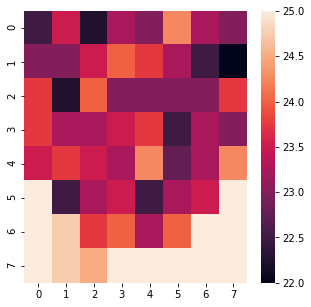

In [34]:
plt.rcParams['figure.figsize'] = (5,5)
# Person walking to middle: walk in - 9911 , walk out - 10198 df.iloc[9911:10198]
frames = []
for row in df.iloc[14233-10:14233].iterrows():
        frames.append(np.array(row[1][1:]).reshape(8,8).astype('float'))

        
# frames = np.array(df.iloc[9910]).reshape(8,8).astype('float')
# frames
sns.heatmap(frames[1], vmin=22, vmax=25)


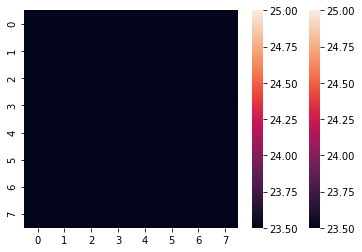

In [40]:
# Low res animation
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
plt.rcParams['animation.writer'] = 'ffmpeg'
# print(matplotlib.animation.writers.list())
from matplotlib import animation, rc
from IPython.display import HTML

# fig, ax = plt.subplots()
# fig.set_tight_layout(True)
fig = plt.figure()

def init():
    sns.heatmap(np.zeros((8, 8)),vmin=23.5,vmax=25)
#     return (sns,)

def animate(i):
    plt.clf()
    data = frames[i]
    sns.heatmap(data, vmin=23.5,vmax=25)
#     return (sns,)
numframes=5*len(frames)/10
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=10,repeat=False)#,blit = True)
HTML(anim.to_html5_video())

#need to return a seaborn object with an "artist object"
#in order to use blit (and therefore speed up rendering)


# Grab Urinal sections

In [167]:
height = 6
n = 8
width_left = 2
width_middle = 3
width_right = 3
bottom_trim = 0

left_mask   = []
middle_mask = []
right_mask  = []
for y in range(n-height,n-bottom_trim):
    # LEFT
    for x in range(width_left):
        left_mask.append(x+y*n) 
    # MIDDLE
    for x in range(width_middle):
         middle_mask.append(x+y*n+width_left) 
    # RIGHT
    for x in range(width_right):
         right_mask.append(x+y*n+width_left+width_middle) 

left_mask = ["P"+str(x) for x in left_mask]  
middle_mask = ["P"+str(x) for x in middle_mask]  
right_mask = ["P"+str(x) for x in right_mask]  

In [168]:
df.head()[middle_mask]

,P18,P19,P20,P26,P27,P28,P34,P35,P36,P42,P43,P44,P50,P51,P52,P58,P59,P60
0,23.0,23.75,22.25,23.50,23.75,22.25,23.00,23.00,23.25,23.25,23.25,23.25,22.75,22.75,22.50,24.00,22.25,24.00
1,23.0,24.00,22.50,23.75,23.50,23.00,22.00,23.00,22.75,22.25,23.25,22.25,22.25,23.00,23.00,23.00,22.25,22.75
2,23.5,23.50,22.25,23.50,23.25,23.25,23.75,23.75,24.00,22.75,23.75,23.00,23.50,22.50,22.75,23.25,23.00,23.50
3,23.0,24.00,22.75,23.75,22.25,23.00,23.00,22.75,23.50,21.75,23.00,22.25,23.25,22.75,24.00,22.75,22.25,23.75
4,23.5,24.25,22.75,22.75,23.00,23.75,23.75,22.75,24.25,22.00,23.75,23.50,24.00,22.50,22.75,23.00,22.25,24.00


# Take Temperature Threshold Each Urinal
## Static Method

In [169]:
# %%notify
# # Which threshold do you want?

# ### --- temperature average that is considered to be a person --- ###
# threshold = 23.5
# ### ------------------------------------------------------------- ###

# pickle_name1 = 'df_tempMeans_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'
# pickle_name2 = 'df_tempMeans_thresh_'+str(threshold)[0:2]+'_'+str(threshold)[3]+'.p'


# if os.path.isfile(pickle_name1) and os.path.isfile(pickle_name2):
#     print("loading pickles")
#     df_tempMeans = pd.read_pickle(pickle_name1)
#     df_tempMeans_thresh = pd.read_pickle(pickle_name2)
# else:
#     print("creating pickle...")
#     print("this will take some time...")
    
#     left  = df[left_mask].mean(axis=1)
#     middle = df[middle_mask].mean(axis=1)
#     right = df[right_mask].mean(axis=1)
#     df_tempMeans = pd.concat([left, middle,right], axis=1)
    
#     # threshold
#     df_tempMeans_thresh = (df_tempMeans > threshold).astype(int)
    
#     df_tempMeans.to_pickle(pickle_name1)
#     df_tempMeans_thresh.to_pickle(pickle_name2)
    

## Adaptive Threshold
1. get background temperature (top row) (Tb)
2. Calculate mean of highest three temperatures for each section (Tm)
3. Compare Tb to Tm (Tm -Tb > threshold)

In [170]:
height = 6 # top 2 rows
n = 8
width_left = 2
width_middle = 3
width_right = 3

left_top   = []
middle_top = []
right_top  = []
for y in range(0,n-height):
    # LEFT
    for x in range(width_left):
        left_top.append(x+y*n) 
    # MIDDLE
    for x in range(width_middle):
         middle_top.append(x+y*n+width_left) 
    # RIGHT
    for x in range(width_right):
         right_top.append(x+y*n+width_left+width_middle) 

left_top = ["P"+str(x) for x in left_top]  
middle_top = ["P"+str(x) for x in middle_top]  
right_top = ["P"+str(x) for x in right_top]  

df[middle_top].sample(10)

,P2,P3,P4,P10,P11,P12
456913,21.50,22.00,22.75,22.75,23.25,22.00
430512,21.50,21.25,22.25,22.25,22.75,21.25
906518,22.50,21.50,22.25,23.00,23.75,23.00
1439126,23.25,22.75,24.25,24.50,24.25,24.00
2742505,22.00,22.00,22.50,22.00,23.25,22.50
2749125,22.75,22.50,22.00,22.75,22.50,22.00
219488,22.25,23.00,22.75,23.00,23.75,22.00
3529378,20.75,21.50,22.00,21.00,22.50,22.00
1267726,22.25,21.50,23.25,22.75,24.50,21.75
1902250,22.25,23.00,23.50,23.50,24.25,22.00


In [172]:
pickle_full_l = 'left_mean3.p'
pickle_full_m = 'middle_mean3.p'
pickle_full_r = 'right_mean3.p'
if os.path.isfile(pickle_full_l) and os.path.isfile(pickle_full_m) and os.path.isfile(pickle_full_r):
    print("loading pickle")
    left = pd.read_pickle(pickle_full_l)
    middle = pd.read_pickle(pickle_full_m)
    right = pd.read_pickle(pickle_full_r)
else:
    print("creating pickle...")
    print("this will take some time...")
    
    # 1. Get Background Temperature (improve by using Kalman filter)
    window = 600 # 1 minute window for background temp

    left_thresh = []
    middle_thresh = []
    right_thresh = []
    print("1")
    for t in tnrange(window/2,len(df),window):  
        left_thresh.append(df.loc[t-window/2:t+window/2,:][left_top].mean().mean())
        middle_thresh.append(df.loc[t-window/2:t+window/2,:][middle_top].mean().mean())
        right_thresh.append(df.loc[t-window/2:t+window/2,:][right_top].mean().mean())
    
    left_thresh = [x for x in left_thresh for _ in range(window)]    
    middle_thresh = [x for x in middle_thresh for _ in range(window)]    
    right_thresh = [x for x in right_thresh for _ in range(window)]  
    
    if len(left_thresh) > len(df):
        left_thresh = left_thresh[0:-(len(left_thresh) - len(df))]
        middle_thresh = middle_thresh[0:-(len(middle_thresh) - len(df))]
        right_thresh = right_thresh[0:-(len(right_thresh) - len(df))]
    elif len(left_thresh) < len(df):    
        left_thresh.extend([left_thresh[-1]]*(len(df) - len(left_thresh)))
        middle_thresh.extend([middle_thresh[-1]]*(len(df) - len(middle_thresh)))
        right_thresh.extend([right_thresh[-1]]*(len(df) - len(right_thresh)))
    else:
        pass

    if not (len(left_thresh) == len(middle_thresh) == len(right_thresh) == len(df)):
        raise AssertionError()
        
    # 2. 
    print("2")
    left  = df[left_mask].copy()
    middle = df[middle_mask].copy()
    right = df[right_mask].copy()
        
    def top_three_mean(numbers):
        count = 0
        m1 = m2 = m3 = float('-inf')
        for x in numbers:
            count += 1
            if x > m3:
                if x >= m2:
                    if x >= m1:
                        m1, m2, m3 = x, m1, m2   
                    else:
                        m3 = m2
                        m2 = x
                else:
                    m3 = x

        tri_mean = np.mean((m1,m2,m3))          
        return tri_mean if count >= 2 else None


    left["mean3"] = left.progress_apply(top_three_mean,axis = 1)
    middle["mean3"] = middle.progress_apply(top_three_mean,axis = 1)
    right["mean3"] = right.progress_apply(top_three_mean,axis = 1)
    
    left["left_thresh"] = left_thresh
    middle["middle_thresh"] = middle_thresh
    right["right_thresh"] = right_thresh

    left.to_pickle('left_mean3.p')
    middle.to_pickle('middle_mean3.p')
    right.to_pickle('right_mean3.p')

loading pickle


### 3. Compare Tb and Tm

In [173]:
left["mean_total"] = left.iloc[:,0:-3].mean(axis=1)
middle["mean_total"] = middle.iloc[:,0:-3].mean(axis=1)
right["mean_total"] = right.iloc[:,0:-3].mean(axis=1)
# left[left["mean3"] - left["mean_total"] > 2]

In [174]:

Tabs = 24
Tth = 2.5
df_temp_thresh = pd.DataFrame({"time":df["time"]})
# df_temp_thresh["left"] = (left["mean3"] - left["left_thresh"] > Tth).astype(int)
# df_temp_thresh["middle"] = (middle["mean3"] - middle["middle_thresh"] > Tth).astype(int)
# df_temp_thresh["right"] = (right["mean3"] - right["right_thresh"] > Tth).astype(int)
df_temp_thresh["left"] = (left["mean3"] > Tabs).astype(int)
df_temp_thresh["middle"] = (middle["mean3"] > Tabs).astype(int)
df_temp_thresh["right"] = (right["mean3"] > Tabs).astype(int)
df_temp_thresh.set_index("time",inplace=True)
df_temp_thresh.sample(5)

,left,middle,right
time,,,
2017-11-27 05:56:55,0,0,0
2017-11-26 21:36:37,0,0,0
2017-11-24 22:15:34,0,0,0
2017-11-27 01:06:15,0,0,0
2017-11-24 01:55:46,0,0,0


In [175]:
len(df_temp_thresh)

3540394

# Differentiate Binary Threshold Columnwise

In [176]:
print("Differentiating df_tempMeans_thresh" )
df_temp_diff = df_temp_thresh.diff(axis=0)[1:]
print("complete")
df_temp_diff.reset_index(inplace=True)

assert df_temp_diff["left"].sum() == 0
assert df_temp_diff["middle"].sum() == 0
assert df_temp_diff["right"].sum() == 0
# df_temp_diff.iloc[90:120,1:4,]
# len(df_temp_diff.iloc[:,1][df_temp_diff.iloc[:,1] != 0])

Differentiating df_tempMeans_thresh
complete


In [177]:
df_temp_diff_redL =  pd.concat([df_temp_diff.iloc[:,1][df_temp_diff.iloc[:,1] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,1] != 0]],axis = 1)
df_temp_diff_redM = pd.concat([df_temp_diff.iloc[:,2][df_temp_diff.iloc[:,2] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,2] != 0]],axis = 1)
df_temp_diff_redR = pd.concat([df_temp_diff.iloc[:,3][df_temp_diff.iloc[:,3] != 0],df_temp_diff["time"][df_temp_diff.iloc[:,3] != 0]],axis = 1)
df_temp_diff_redR.head(10)

,right,time
18,1.0,2017-11-23 16:57:01
20,-1.0,2017-11-23 16:57:02
35,1.0,2017-11-23 16:57:03
37,-1.0,2017-11-23 16:57:03
41,1.0,2017-11-23 16:57:04
42,-1.0,2017-11-23 16:57:04
47,1.0,2017-11-23 16:57:05
49,-1.0,2017-11-23 16:57:05
53,1.0,2017-11-23 16:57:05
54,-1.0,2017-11-23 16:57:05


In [178]:
df_temp_diff_redL.columns = ["in_out","time"]
df_temp_diff_redM.columns = ["in_out","time"]
df_temp_diff_redR.columns = ["in_out","time"]

df_temp_diff_redM.head()
len(df_temp_diff_redM)

589292

In [179]:
df_temp_diff_redR["in_out"].iloc[0]

1.0

In [180]:
#check in_out always alternates-->it always does
prev = -1
test = df_temp_diff_redL
for i in tnrange(len(test)):
    
    curr = test["in_out"].iloc[i]
    if curr == prev:
        print(test["time"].iloc[i])
        raise AssertionError()
    prev = curr

In [181]:
def in_out(b):
    try:
        if int(b) == 1:
            return "in"
        elif int(b) == -1:
            return "out"
        else:
            return b
    except:
        return b
    
df_temp_diff_redL["in_out"]    = df_temp_diff_redL["in_out"].apply(in_out)
df_temp_diff_redL["time"]    = df_temp_diff_redL["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redL["Position"] = ["Left" for x in range(len(df_temp_diff_redL))]

df_temp_diff_redM["in_out"]    = df_temp_diff_redM["in_out"].apply(in_out)
df_temp_diff_redM["time"]    = df_temp_diff_redM["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redM["Position"] = ["Middle" for x in range(len(df_temp_diff_redM))]

df_temp_diff_redR["in_out"]    = df_temp_diff_redR["in_out"].apply(in_out)
df_temp_diff_redR["time"]    = df_temp_diff_redR["time"]#.progress_apply(pd.to_datetime) + datetime.timedelta(hours=10)
df_temp_diff_redR["Position"] = ["Right" for x in range(len(df_temp_diff_redR))]

In [182]:

rsv = df_temp_diff_redL
rsv = rsv.append(df_temp_diff_redM)
rsv = rsv.append(df_temp_diff_redR)
# rsv = rsv.set_index("time")
# sorted_visits .sample(20)


rsv.sort_index(inplace=True)

rsv.head()

,in_out,time,Position
3,in,2017-11-23 16:56:59,Middle
4,in,2017-11-23 16:56:59,Left
4,out,2017-11-23 16:56:59,Middle
5,out,2017-11-23 16:57:00,Left
5,in,2017-11-23 16:57:00,Middle


In [289]:
rsv.index[0]

3

# Collect In and Out Times (as indices)

In [290]:
# in and out are times, and inx and outx are the indexes
in_out_dict = {"Left":{"in":[],"out":[],"inx":[],"outx":[]},"Middle":{"in":[],"out":[],"inx":[],"outx":[]},
               "Right":{"in":[],"out":[],"inx":[],"outx":[]}}

for t in tnrange(len(rsv)):
    in_out_dict[rsv["Position"].iloc[t]][rsv["in_out"].iloc[t]].append(rsv["time"].iloc[t])
    in_out_dict[rsv["Position"].iloc[t]][rsv["in_out"].iloc[t]+'x'].append(rsv.index[t])
    
    

<IPython.core.display.Javascript object>

# Remove Non-Stays

In [293]:
from datetime import timedelta

def removeStays(timeFilt):
    left_stays = pd.concat([pd.DataFrame(in_out_dict["Left"]["in"]),pd.DataFrame(in_out_dict["Left"]["out"]),
                           pd.DataFrame(in_out_dict["Left"]["inx"]),pd.DataFrame(in_out_dict["Left"]["outx"])],axis=1)
    left_stays.columns = ["in","out","inx","outx"]
    left_stays = left_stays[left_stays["out"] - left_stays["in"]> timedelta(seconds=timeFilt )]
    left_stays["length"] = left_stays["out"] - left_stays["in"]
    
    middle_stays = pd.concat([pd.DataFrame(in_out_dict["Middle"]["in"]),pd.DataFrame(in_out_dict["Middle"]["out"]),
                             pd.DataFrame(in_out_dict["Middle"]["inx"]),pd.DataFrame(in_out_dict["Middle"]["outx"])],axis=1)
    middle_stays.columns = ["in","out","inx","outx"]
    middle_stays = middle_stays[middle_stays["out"] - middle_stays["in"]> timedelta(seconds=timeFilt )]
    middle_stays["length"] = middle_stays["out"] - middle_stays["in"]

    right_stays = pd.concat([pd.DataFrame(in_out_dict["Right"]["in"]),pd.DataFrame(in_out_dict["Right"]["out"]),
                            pd.DataFrame(in_out_dict["Right"]["inx"]),pd.DataFrame(in_out_dict["Right"]["outx"])],axis=1)
    right_stays.columns = ["in","out","inx","outx"]
    right_stays = right_stays[right_stays["out"] - right_stays["in"]> timedelta(seconds=timeFilt )]
    right_stays["length"] = right_stays["out"] - right_stays["in"]
    
    return left_stays, middle_stays, right_stays



In [294]:
timeFilt = 8
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

print("Left: {},Middle:{},Right:{}".format(len(stays[0]),len(stays[1]),len(stays[2])))

Left: 228,Middle:142,Right:194


In [295]:
#210 for 23.5
#74 for 24.0
print(len(left_stays))
left_stays.head(10)

228


,in,out,inx,outx,length
476,2017-11-23 17:05:10,2017-11-23 17:05:52,2439,2815,00:00:42
549,2017-11-23 17:06:30,2017-11-23 17:07:12,3147,3520,00:00:42
924,2017-11-23 17:33:20,2017-11-23 17:33:50,17369,17632,00:00:30
999,2017-11-23 17:40:15,2017-11-23 17:40:53,21033,21367,00:00:38
1483,2017-11-23 17:59:33,2017-11-23 17:59:44,31264,31359,00:00:11
1493,2017-11-23 17:59:54,2017-11-23 18:00:07,31452,31563,00:00:13
1877,2017-11-23 18:17:40,2017-11-23 18:18:04,40864,41082,00:00:24
4354,2017-11-23 19:06:46,2017-11-23 19:07:30,66892,67276,00:00:44
7294,2017-11-23 19:50:09,2017-11-23 19:50:39,89889,90153,00:00:30
7499,2017-11-23 19:52:29,2017-11-23 19:53:18,91126,91559,00:00:49


# Re-sort stay length filtered data

In [296]:
left_stays["Position"] = 'left'
middle_stays["Position"] = 'middle'
right_stays["Position"] = 'right'

sorted_stays = left_stays
sorted_stays = sorted_stays.append(middle_stays)
sorted_stays = sorted_stays.append(right_stays)
# rsv = rsv.set_index("time")
# sorted_visits .sample(20)
# sorted_stays

sorted_stays.sort_index(inplace=True)
sorted_stays.sample(10)
len(sorted_stays)

564

# Search for anomalies

In [297]:
sorted_stays[sorted_stays['length'] > timedelta(seconds=70 )]
# sorted_stays['length']


,in,out,inx,outx,length,Position
87,2017-11-23 16:58:23,2017-11-23 17:01:58,739,746,00:03:35,middle
18381,2017-11-24 09:09:42,2017-11-24 09:10:59,513461,514146,00:01:17,left
18838,2017-11-24 12:31:06,2017-11-24 12:32:22,620198,620865,00:01:16,left
19054,2017-11-24 15:39:39,2017-11-24 15:41:04,720118,720869,00:01:25,left
19449,2017-11-24 18:55:54,2017-11-24 18:57:21,824141,824907,00:01:27,left
38365,2017-11-24 14:15:58,2017-11-24 14:17:14,675775,676441,00:01:16,right
39434,2017-11-24 17:29:10,2017-11-24 17:30:25,778164,778831,00:01:15,right
39758,2017-11-24 18:11:14,2017-11-24 18:12:32,800464,801148,00:01:18,right
40038,2017-11-24 18:35:48,2017-11-24 18:37:13,813487,814232,00:01:25,right
251055,2017-11-27 09:59:11,2017-11-27 10:01:16,2828844,2829949,00:02:05,middle


## Set Up Figure Parameters

In [298]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.mlab as mlab


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
plt.rcParams.update(params)

# Histograms of Urinal Visit Length > 1 

In [299]:
timeFilt = 1
stays = removeStays(timeFilt)
left_stays = stays[0]
middle_stays = stays[1]
right_stays = stays[2]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


KeyError: 'left_length'

In [ ]:

# the histogram of the data
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 1 second')


# plt.text(max(left_stays["left_length"]) - 1, max(n)- 10, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)


# Histograms of Urinal Visit Length > 5

In [ ]:
stay_length = 5 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


In [ ]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
plt.title('Histogram of Urinal Visit Length > 5 seconds')


plt.text(max(left_stays["left_length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)

# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.5f'))

# Histograms of Urinal Visit Length > 8

In [ ]:
stay_length = 8 # 10 = 1 second
left_stays = left_df[left_df['left_length']>stay_length]
middle_stays = middle_df[middle_df['middle_length']>stay_length]
right_stays = right_df[right_df['right_length']>stay_length]

# num_stays10 = [len(left_stays), len(middle_stays), len(right_stays)]
# print("left: {} middle: {} right: {} ".format(num_stays10[0],num_stays10[1],num_stays10[2]))
left_stay_mean = left_stays['left_length'].mean()
left_stay_std = left_stays['left_length'].std()
left_stay_norm = (left_stays['left_length'] - left_stay_mean)/left_stay_std

middle_stay_mean = middle_stays['middle_length'].mean()
middle_stay_std = middle_stays['middle_length'].std()
middle_stay_norm = (middle_stays['middle_length'] - middle_stay_mean)/middle_stay_std

right_stay_mean = right_stays['right_length'].mean()
right_stay_std = right_stays['right_length'].std()
# right_stay_med = right_stays['right_length'].median()
right_stay_norm = (right_stays['right_length'] - right_stay_mean)/right_stay_std


print("left   - mean: {} std: {}\nmiddle - mean: {} std: {}\nright  - mean: {} std: {}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


In [ ]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(left_stays["left_length"].T, bins=bins, facecolor='red', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Left')
plt.ylabel('Frequency')
# plt.title('Histogram of Urinal Visit Length > 8 seconds')
plt.title('Left\n Histogram of Urinal Visit Length')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(max(left_stays["left_length"]) - 1, max(n)- 1, r'$\mu = {0:.2f}$'.format(left_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(left_stay_std), fontdict=font)
# mu = {} sigma = {}'.format(left_stay_mean,left_stay_std))
# ax.text(right, top, 'right bottom',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax.transAxes)

In [ ]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(middle_stays["middle_length"].T, bins=bins, facecolor='green', alpha=transp, histtype='bar')
ax.set_xticks(bins);

plt.xlabel('Length of Visits Middle')
plt.ylabel('Frequency')
plt.title('Middle\n Histogram of Urinal Visit Length')
plt.text(max(middle_stays["middle_length"]) - 1 , max(n) - 1, r'$\mu = {0:.2f}$'.format(middle_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(middle_stay_std), fontdict=font)

In [ ]:
transp = 0.5
bins = 100
fig = plt.figure()
plt.xticks(rotation=90) 
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(right_stays["right_length"].T, bins=bins, facecolor='blue', alpha=transp, histtype='bar')
ax.set_xticks(bins);


plt.xlabel('Length of Visits Right')
plt.ylabel('Frequency')
plt.title('Right\n Histogram of Urinal Visit Length')
plt.text(max(right_stays["right_length"]) - 1, max(n ) - 1, r'$\mu = {0:.2f}$'.format(right_stay_mean) + '\n' + r'$\sigma = {0:.2f}$'.format(right_stay_std), fontdict=font)

In [ ]:
left_stays.sample(5)

In [300]:
sorted_stays.head()

,in,out,inx,outx,length,Position
87,2017-11-23 16:58:23,2017-11-23 17:01:58,739,746,00:03:35,middle
242,2017-11-23 17:03:21,2017-11-23 17:03:49,1481,1727,00:00:28,middle
297,2017-11-23 17:04:18,2017-11-23 17:05:16,1979,2490,00:00:58,middle
353,2017-11-23 17:03:22,2017-11-23 17:03:49,1485,1722,00:00:27,right
430,2017-11-23 17:04:28,2017-11-23 17:05:15,2071,2486,00:00:47,right


# Visits per Hour
## Function to convert epoch to hour (24 hour time)

In [393]:

sorted_stays["hour"] = sorted_stays["in"].dt.hour
# middle_stays["hour"] = middle_stays["Middle_in"].dt.hour
# right_stays["hour"] = right_stays["Right_in"].dt.hour
# right_stays
sorted_stays.head(10)

,in,out,inx,outx,length,Position,hour
87,2017-11-23 16:58:23,2017-11-23 17:01:58,739,746,00:03:35,middle,16
242,2017-11-23 17:03:21,2017-11-23 17:03:49,1481,1727,00:00:28,middle,17
297,2017-11-23 17:04:18,2017-11-23 17:05:16,1979,2490,00:00:58,middle,17
353,2017-11-23 17:03:22,2017-11-23 17:03:49,1485,1722,00:00:27,right,17
430,2017-11-23 17:04:28,2017-11-23 17:05:15,2071,2486,00:00:47,right,17
476,2017-11-23 17:05:10,2017-11-23 17:05:52,2439,2815,00:00:42,left,17
549,2017-11-23 17:06:30,2017-11-23 17:07:12,3147,3520,00:00:42,left,17
720,2017-11-23 17:10:33,2017-11-23 17:11:07,5292,5594,00:00:34,middle,17
924,2017-11-23 17:33:20,2017-11-23 17:33:50,17369,17632,00:00:30,left,17
999,2017-11-23 17:40:15,2017-11-23 17:40:53,21033,21367,00:00:38,left,17


In [422]:
sorted_ins = sorted_stays.drop(["out","outx"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'inx': 'x'})
sorted_outs = sorted_stays.drop(["in","inx"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'outx': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)

hour_df = pd.concat([stays["hour"],stays["in_out"],stays["time"].dt.day], axis = 1)
hour_df = hour_df[hour_df["in_out"] == "in"]
stays.drop(["x","hour"],axis = 1,inplace = True)


In [423]:
hour_df["counts"] = 1
hour_df.drop(["in_out"],axis = 1,inplace = True)

In [424]:
# hour_df = sorted_stays.iloc[:,-2:]
hour_counts = hour_df["hour"].value_counts()
# hour_counts
# sorted_stays["in"][sorted_stays["Position"] == 'left']
hour_counts["23"] = 0
hour_counts = hour_counts.sort_index()
# hour_counts

In [427]:
# hour_df["counts"] = 1
adj_check = (hour_df.hour != hour_df.hour.shift()).cumsum()
hour_sums = hour_df.groupby(['time','hour', adj_check], as_index=False, sort=False)['counts'].sum()
hour_sums

,time,hour,counts
0,23,16,1
1,23,17,17
2,23,18,2
3,23,19,11
4,23,20,3
5,23,21,1
6,24,0,1
7,24,6,1
8,24,7,10
9,24,8,6



## Get Walk Ins of Visits

## Plot Urinal Visits per Hour

In [351]:
#missing 13
hour_counts.tolist()
hour_counts.index.tolist();

Text(0.5,1,u'Urinal Visits Per Hour')

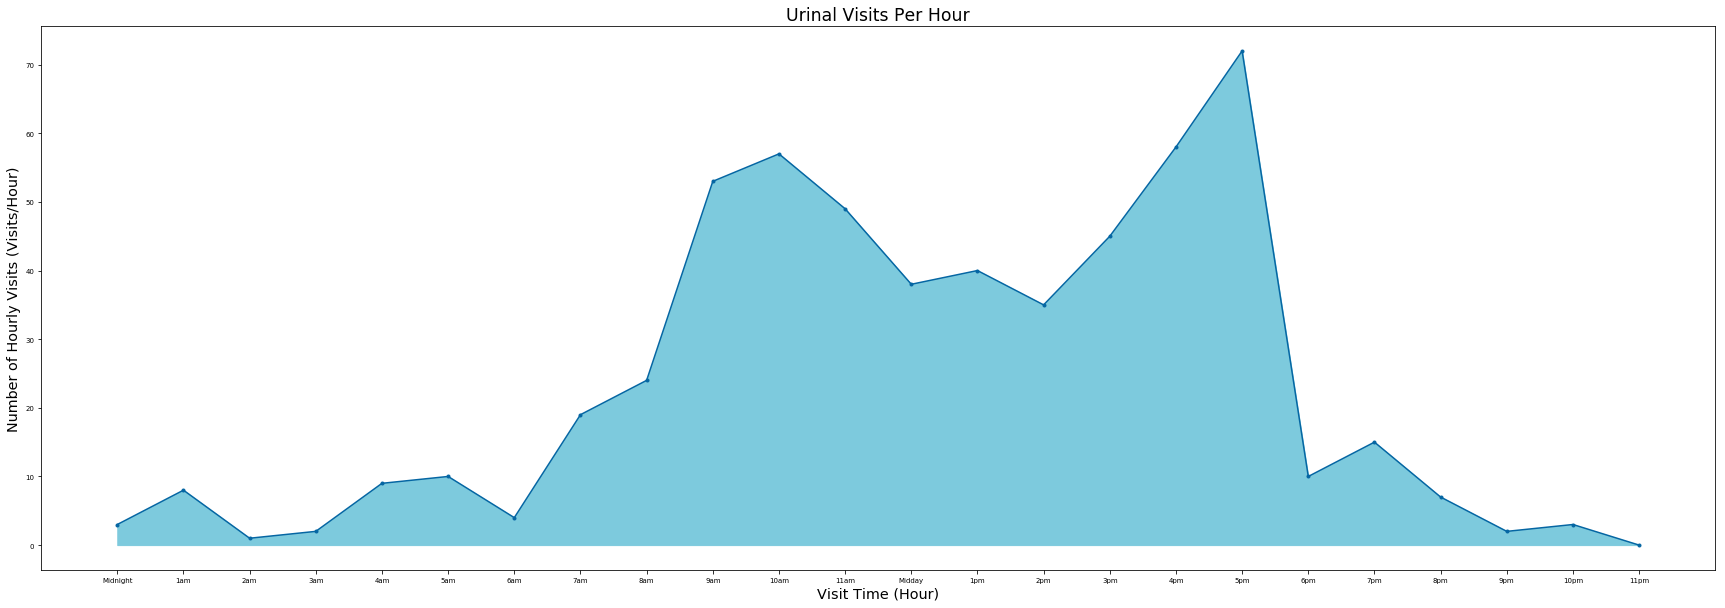

In [429]:
plt.rcParams['figure.figsize'] = (30,10)
visit_times = pd.DataFrame({"Hour Visited":hour_counts})
x = np.arange(0.0, 24, 1)

my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
             "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plt.xticks(range(24), my_xticks);
plt.plot(x, visit_times, marker='.', lw=1.5, color="#0566A3")
# plt.fill_between(visit_times,range(24))
# plt.plot(x, y, marker='.', lw=1)
d = np.zeros(len(visit_times))
plt.fill_between(x,visit_times.iloc[:,0],where=visit_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD')#"#aee1ec")

plt.xlabel('Visit Time (Hour)')
plt.ylabel('Number of Hourly Visits (Visits/Hour)')
plt.title('Urinal Visits Per Hour')

Text(0.5,1,u'Urinal Visits Per Hour')

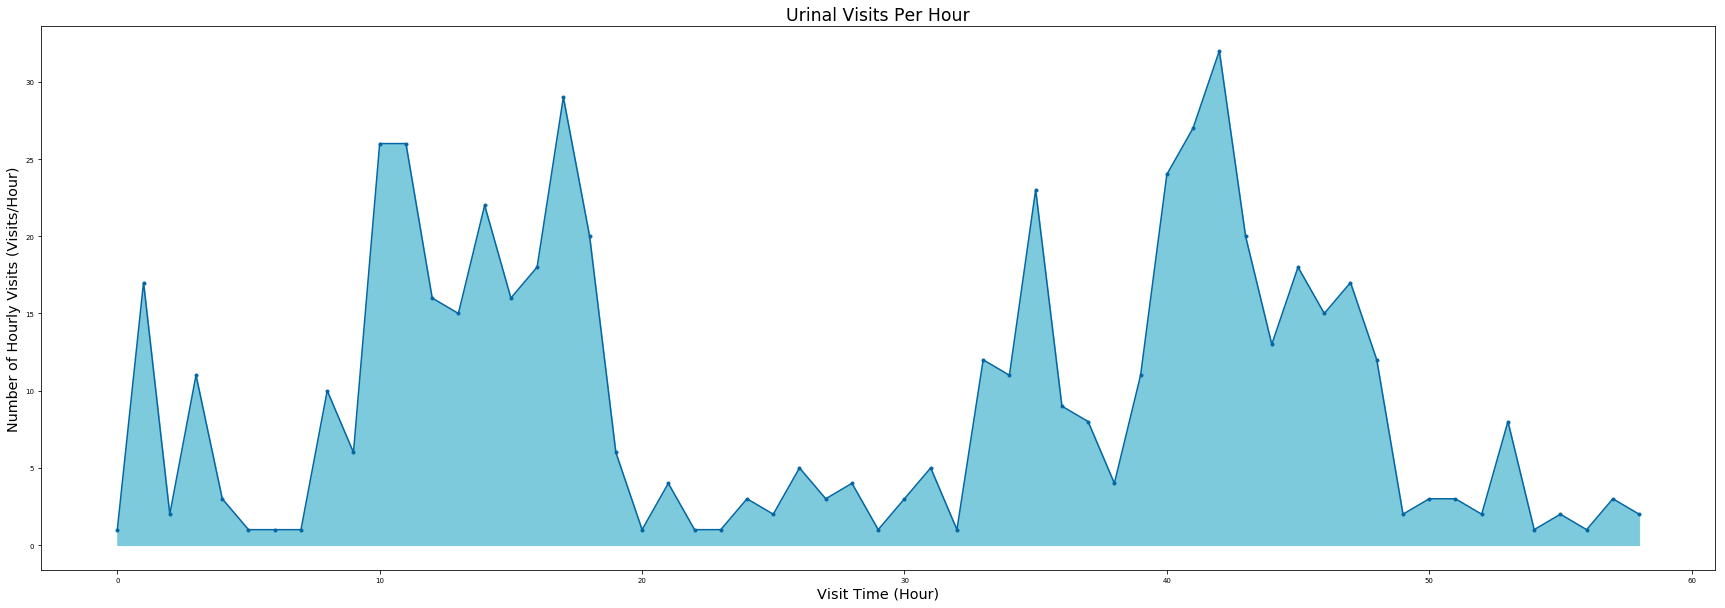

In [433]:
hour_sums
plt.rcParams['figure.figsize'] = (30,10)
num_times = pd.DataFrame({"Num Visists":hour_sums["counts"]})
x = np.arange(0.0, len(num_times), 1)

# my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
#              "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
# plt.xticks(range(24), my_xticks);
plt.plot(x, num_times, marker='.', lw=1.5, color="#0566A3")
# plt.fill_between(visit_times,range(24))
# plt.plot(x, y, marker='.', lw=1)
d = np.zeros(len(num_times))
plt.fill_between(x,num_times.iloc[:,0],where=num_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD')#"#aee1ec")

plt.xlabel('Visit Time (Hour)')
plt.ylabel('Number of Hourly Visits (Visits/Hour)')
plt.title('Urinal Visits Per Hour')

# Get All state changes

In [305]:
sorted_stays.head()

,in,out,inx,outx,length,Position,hour
87,2017-11-23 16:58:23,2017-11-23 17:01:58,739,746,00:03:35,middle,16
242,2017-11-23 17:03:21,2017-11-23 17:03:49,1481,1727,00:00:28,middle,17
297,2017-11-23 17:04:18,2017-11-23 17:05:16,1979,2490,00:00:58,middle,17
353,2017-11-23 17:03:22,2017-11-23 17:03:49,1485,1722,00:00:27,right,17
430,2017-11-23 17:04:28,2017-11-23 17:05:15,2071,2486,00:00:47,right,17


In [380]:
sorted_ins = sorted_stays.drop(["out","outx"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'inx': 'x'})
sorted_outs = sorted_stays.drop(["in","inx"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'outx': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)
hour_df = stays["hour"]
stays.drop(["x","hour"],axis = 1,inplace = True)




,time,length,Position,hour,in_out
3554,2017-11-23 17:53:20,00:00:18,middle,17,out
2629,2017-11-23 17:53:29,00:00:40,right,17,out
1483,2017-11-23 17:59:33,00:00:11,left,17,in
1483,2017-11-23 17:59:44,00:00:11,left,17,out
1493,2017-11-23 17:59:54,00:00:13,left,17,in
1493,2017-11-23 18:00:07,00:00:13,left,17,out
1877,2017-11-23 18:17:40,00:00:24,left,18,in
1877,2017-11-23 18:18:04,00:00:24,left,18,out
4163,2017-11-23 18:23:43,00:00:34,right,18,in
4163,2017-11-23 18:24:17,00:00:34,right,18,out


## All Possible State Changes
We assume that only one person can walk in and out at a time.  
given a sampling rate of 10 Hz this is a pretty safe bet.  
We also ignore a "change" where the state remains the same
(this is covered by visit times).

We represent the empty urinal by __0__, and a person by __1__.  
So a state change from 1 person at the left Urinal to the empty state:  
        _100 &rarr; 000 = b100000_


In [323]:
# state_changes = {"000100"}

#----- empty to 1 person changes---

states_dec = [
int('100000',2),
int('010000',2),
int('001000',2),
int('000100',2),
int('000010',2),
int('000001',2),

#----- 1 person to 2 changes---
int('100110',2),
int('100101',2),
int('110100',2),
int('101100',2),

int('010110',2),
int('010011',2),
int('110010',2),
int('011010',2),

int('001011',2),
int('001101',2),
int('011001',2),
int('101001',2),

#----- 2 person to 3 changes---
int('011111',2),
int('101111',2),
int('110111',2),
int('111011',2),
int('111101',2),
int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]

## Count All State Changes

In [325]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in stays.iterrows():
    
    # Deteremine the current state
    pos =row[1]["Position"]
    inout = row[1]["in_out"]
#     print(pos)
    #LIN
    if pos == "left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [326]:
total = state_changes_df["Count"].sum()
global_prob = state_changes_df/total
state_changes_df.sort_values(by=["Count"]).T

State Change,110111,011111,111011,010011,110010,111101,100110,010110,111110,011010,...,101100,100101,001101,101001,000010,010000,001000,000001,100000,000100
Count,1.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,8.0,...,22.0,28.0,28.0,29.0,111.0,115.0,159.0,161.0,192.0,194.0


In [327]:
total

1128.0

# Build a Transistion Matrix

In [328]:
# all states
tri_states = ["000","100","010","001","110","011","101","111"]
# build an empty 8x8 transition matrix
trans_matrix = pd.DataFrame(0.0, index=tri_states, columns=tri_states)


state_changes_df.iloc[0][0]

for i in range(len(state_changes_df)):
#     print(state_changes_df.iloc[i])
    state1 = state_changes_df.iloc[i].name[0:3]
    state2 = state_changes_df.iloc[i].name[3:6]
    trans_matrix[state1][state2] = float(state_changes_df.iloc[i][0])

trans_matrix.T

,000,100,010,001,110,011,101,111
000,0.0,194.0,111.0,161.0,0.0,0.0,0.0,0.0
100,192.0,0.0,0.0,0.0,4.0,0.0,28.0,0.0
010,115.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0
001,159.0,0.0,0.0,0.0,0.0,18.0,28.0,0.0
110,0.0,8.0,4.0,0.0,0.0,0.0,0.0,1.0
011,0.0,0.0,8.0,15.0,0.0,0.0,0.0,2.0
101,0.0,22.0,0.0,29.0,0.0,0.0,0.0,9.0
111,0.0,0.0,0.0,0.0,5.0,3.0,4.0,0.0


# As Row Probabilities


In [ ]:
sum_rows = trans_matrix.sum(axis=0).astype(np.float64)
for index, row_sum in enumerate(sum_rows):
    for col in range(trans_matrix.shape[0]):
#         print("{} / {}".format(trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64),row_sum))
        trans_matrix[tri_states[index]][tri_states[col]] = trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64) / float(row_sum)
trans_matrix.T

# Animate

In [ ]:
import svgwrite 

path = [(100,100),(100,200),(200,200),(200,100)]

image = svgwrite.Drawing('test.svg',size=(300,300))

rectangle = image.add(image.polygon(path,id ='polygon',stroke="black",fill="white"))
rectangle.add(image.animateTransform("rotate","transform",id="polygon", from_="0 150 150", to="360 150 150",dur="4s",begin="0s",repeatCount="indefinite"))
text = image.add(image.text('rectangle1',insert=(150,30),id="text"))
text.add(image.animateColor("fill", attributeType="XML",from_="green", to="red",id="text", dur="4s",repeatCount="indefinite"))

image.save()

In [ ]:
# from IPython.display import SVG, display
# def show_svg():
#     display(SVG(url='http://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'))
from IPython.display import SVG
def show_svg(file_string):
    return SVG(file_string)


In [ ]:
dwg = svgwrite.Drawing('test2.svg', profile='tiny')#size=(300,300))
dwg.add(dwg.line((100, 100), (200, 200), stroke=svgwrite.rgb(100, 50, 0, '%')))
dwg.add(dwg.text('Test', insert=(100, 20)))
dwg.save()

In [ ]:
import svgutils.transform as st

template = st.fromfile('test.svg')
static_svg = st.fromfile('URINAL-ILL.SVG')
template.append(static_svg)
template.save('merged.svg')
show_svg('merged.svg')

# No-one to one person

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
tri_states = ["000","100","010","001","110","011","101","111"]
zero2one = []
one2zero = []
zeroone = []
for i in range(1,4):
    zero2one.append(state_changes_df.loc[tri_states[0]+tri_states[i]][0])
#     one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

# zero2one.append(one2zero)
print(sum(zero2one))

zeroone = zero2one/sum(zero2one)
print(zeroone)
# zero2one

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
zeroone = ax.bar(ind, zeroone, width, color='r')


ax.set_xlabel('Urinal')
ax.set_ylabel('Probability (%)')
ax.set_title('Probability of Visit for Empty')
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'));

# rects = ax.patches

# # Now make some labels
# labels = [zeroone[i] % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
# zeroone[0]

In [ ]:
one2zero = []
for i in range(1,4):
    one2zero.append(state_changes_df.loc[tri_states[i]+tri_states[0]][0])

one2zero = one2zero/sum(one2zero)
one2zero

N = 3.0
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2zero, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
ax.set_xticklabels(('Left', 'Middle', 'Right'));

In [ ]:

one2two = []
for i in range(1,4):
    for j in range(4,7):
        try:
            one2two.append(state_changes_df.loc[tri_states[i]+tri_states[j]][0])
        except:
            pass
        
one2two = one2two/sum(one2two)
one2two 

N = float(len(one2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, one2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')
ax.set_xticks(ind);
# ax.set_xticklabels(('Left', 'Middle', 'Right'))

In [ ]:

two2one = []
for i in range(1,4):
    for j in range(4,7):
        try:
            two2one.append(state_changes_df.loc[tri_states[j]+tri_states[i]][0])
        except:
            pass
two2one = two2one/sum(two2one)
two2one

N = float(len(two2one))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2one, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

In [ ]:

two2three = []
for i in range(4,7):
    two2three.append(state_changes_df.loc[tri_states[i]+tri_states[7]][0])
        
two2three = two2three/sum(two2three)
two2three

N = float(len(two2three))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, two2three, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

In [ ]:

three2two = []
for i in range(4,7):
    three2two.append(state_changes_df.loc[tri_states[7]+tri_states[i]][0])
        
three2two = three2two/sum(three2two)
three2two

N = float(len(three2two))
ind = np.arange(N)
width = 1/N
fig, ax = plt.subplots()
stay10 = ax.bar(ind, three2two, width, color='r')


ax.set_ylabel('Probability of Visit for Empty')
ax.set_title('Probability (%)')

# ax.set_xticklabels(('Left', 'Middle', 'Right'))

# Get mean Temp for every frame

In [ ]:

pickle_mean = 'frame_mean.p'
if os.path.isfile(pickle_mean):
    print("loading pickle")
    temp_inst = pd.read_pickle(pickle_mean)
else:
    print("creating pickle...")
    print("This takes around 25 mins")
    tqdm.pandas(tqdm())
    # calculate mean of each frame
    temp_inst = df.iloc[:,1:].progress_apply(np.mean,axis=1)
    temp_inst.to_pickle('frame_mean.p')

In [ ]:
# pickle_var = 'frame_var.p'
# if os.path.isfile(pickle_mean):
#     print("loading pickle")
#     temp_inst = pd.read_pickle(pickle_mean)
# else:
#     print("creating pickle...")
#     print("This takes around 25 mins")
#     tqdm.pandas(tqdm())
#     # calculate mean of each frame
#     temp_inst = df.iloc[:,1:].progress_apply(np.mean,axis=1)
#     temp_inst.to_pickle('frame_mean.p')
# temp_var = df.sample(10).iloc[:,1:]#.progress_apply(np.var,axis=1)
temp_var = df.sample(100).iloc[:,1:].progress_apply(np.var,axis=1)


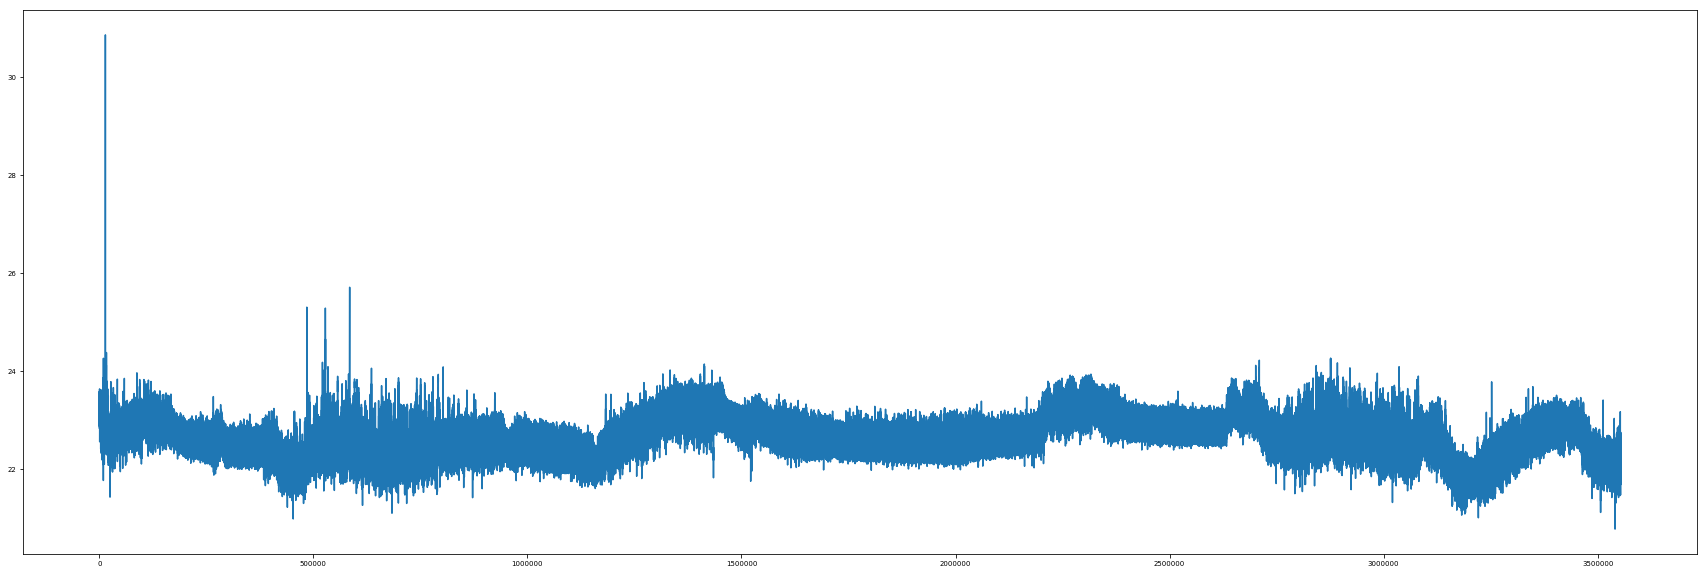

In [117]:
# plt.plot(temp_inst.rolling(window=80).mean())
plt.plot(temp_inst)

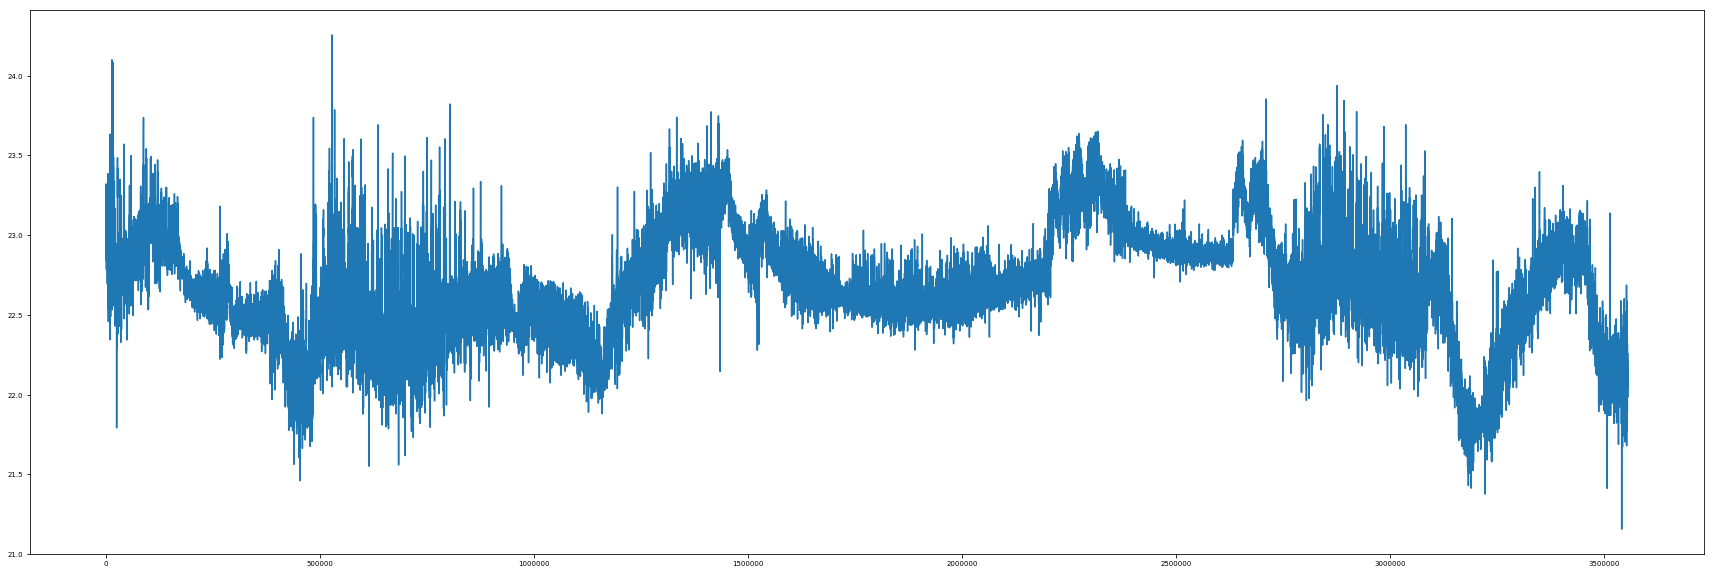

In [120]:
plt.plot(temp_inst.rolling(window=80).mean())

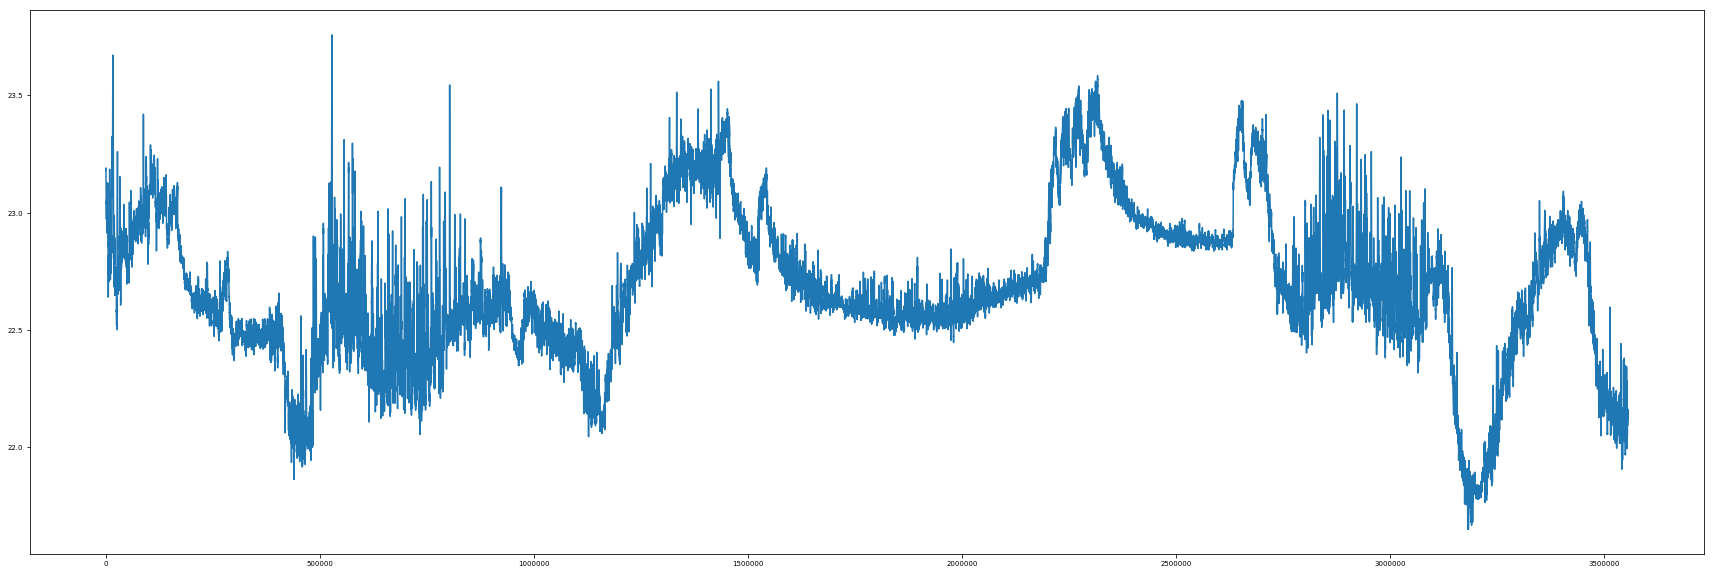

In [121]:
plt.plot(temp_inst.rolling(window=600).mean())

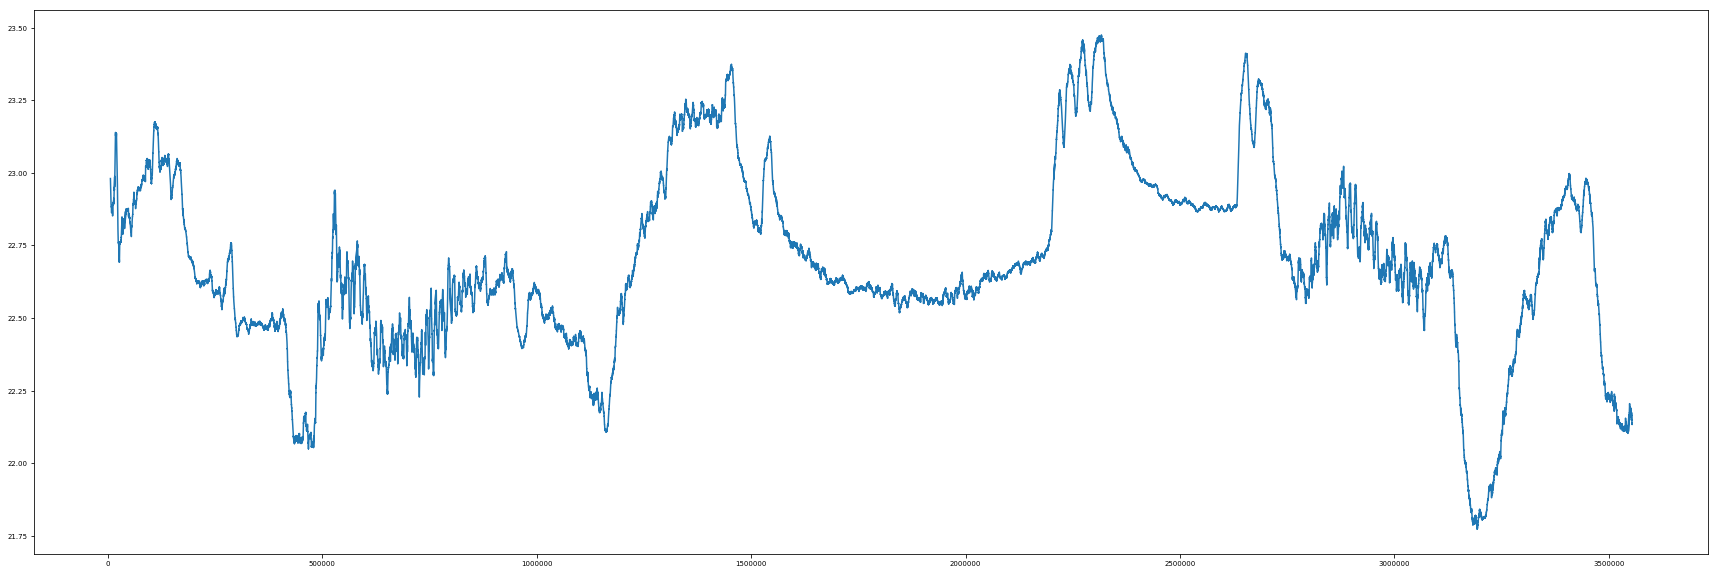

In [122]:
plt.plot(temp_inst.rolling(window=6000).mean())

In [2]:
check = 97650
chend = 3500000
    
temp_inst.iloc[check:chend][temp_inst.iloc[check:chend]>24].head()
# temp_inst.iloc[1100:]

NameError: name 'temp_inst' is not defined

# Apply [Paper](http://file.scirp.org/pdf/JCC_2017031515552013.pdf) Algorithm



$$v_{ij}(t)=\frac{1}{\tau}\sum_{k=t-(\tau-1)}^t (T_{i,j}(t)-\overline{T_{i,j}(k)})^2,$$
$$where\ \ \overline{T_{i,j}(t)}=\frac{1}{\tau}\sum_{k=t-(\tau-1)}^t T_{i,j}(t)$$

$v_{ij}(t)\ is\ the\ variance\ for\ time\ instance\ t\\\tau = time\ window\\t = time\ instance\\t\geqslant\tau\\T_{i,j}\ is\ the\ pixel\ Temperature\ at\ location\ i,j$



## Kalmann Filter


In [55]:
window_t = 10 #10 SECONDS


# get mean median and sum of each pixel

In [ ]:
sum1 = []
mean1 = []
median1 = []
norm = 3652340
for i in tnrange(1,65):
    sum1.append(df.iloc[:,i].sum())
    mean1.append(df.iloc[:,i].mean())
    median1.append(df.iloc[:,i].median())
    


In [ ]:
np.mean(mean1)

In [ ]:
# norm = len(df.iloc[:,2])

# sum1_norm = [sum1[i]/norm for i in range(len(sum1))]
# sum1_norm1 = [sum1[i]/1000000 for i in range(len(sum1))]

mean_df = pd.DataFrame({'col':mean1})
mean_df = np.flip((np.array(mean_df).reshape(8,8).astype('float').T),0)
# sum_df = sum_df.values.reshape(8,8).astype('float')
sns.heatmap(mean_df)#, vmin=22, vmax=27)

# Zero Mean each pixel

In [ ]:
centred = []
df_mean = pd.DataFrame()
for i in tnrange(1,65):
    centred = df.iloc[:,i] - mean1[i-1]
    df_mean = df_mean.append(pd.Series(centred),ignore_index=True)




In [ ]:
df_mean = df_mean.T

In [ ]:
df_mean

In [ ]:
cMean = []
for i in tnrange(64):
    cMean.append(df_mean.iloc[:,i].mean())
    
# for i in tnrange(1,65):
#     sum1.append(df.iloc[:,i].sum())
#     mean1.append(df.iloc[:,i].mean())
# df_mean.iloc[:,10].mean()

In [ ]:
cMean_df = pd.DataFrame({'col':cMean})
cMean_df = cMean_df.values.reshape(8,8).astype('float')
sns.heatmap(cMean_df)#, vmin=22, vmax=27)

In [ ]:
from scipy.interpolate import griddata
import math


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = cMean
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0, vmin=0, vmax=1.6e-15)

In [ ]:


points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = mean1
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
# for row in df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:].iterrows():
#     frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))
df_chunk = df.iloc[(time_10to11_fri):(time_10to11_fri+(chunk_hour1)),1:]
# df_chunk.iloc[:,0]
for i in range(64):
    frames.append(df_chunk.iloc[:,i].mean())

In [ ]:
points = [(math.floor(ix / 8), (ix % 8)) for ix in range(0, 64)]
grid_x, grid_y = np.mgrid[0:7:32j, 0:7:32j]
pixels = frames
bicubic = griddata(points, pixels, (grid_x, grid_y), method='cubic')
sns.heatmap(bicubic, linewidths=0.0)

In [ ]:
fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    h_init = sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True, vmin=22, vmax=27)
    type(h_init)
    return [h_init]
def animate(i):
    plt.clf()
    data = frames[i]
    h_curr = sns.heatmap(data, linewidths=0.5, annot=True, vmin=22, vmax=27)
    return h_curr
#init()
animate(599)

In [ ]:
start_time = timeit.default_timer()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=600, interval=60, repeat=True,blit=True)
elapsed = timeit.default_timer() - start_time
print(elapsed)

In [ ]:
start_time = timeit.default_timer()
anim.save('mymovie.mp4',fps=10)
elapsed = timeit.default_timer() - start_time
print(elapsed)
plt.close(fig)

In [ ]:
start_time = timeit.default_timer()
HTML(anim.to_html5_video())
elapsed = timeit.default_timer() - start_time
print(elapsed)

# TRAINING DATA

# Create Videos
## (Skip as time consuming and saved to file)

## Need to implent loading video from file

In [ ]:
import io
import base64
from IPython.display import HTML

video = io.open('test.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

<IPython.core.display.Javascript object>


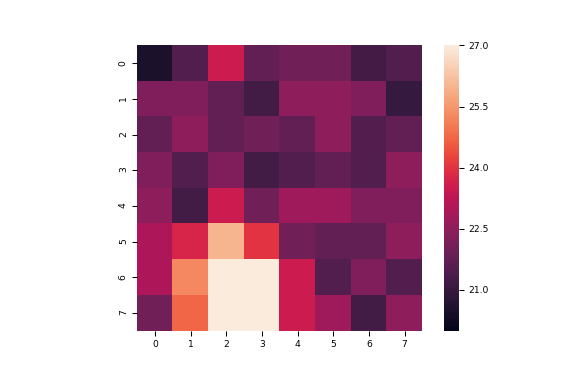

In [281]:
# Low res animation
%matplotlib nbagg
fig = plt.figure()
# plt.rcParams['animation.writer'] = 'avconv'


def init():
    sns.heatmap(np.zeros((8, 8)),vmin=20,vmax=27)

def animate(i):
    plt.clf()
    data = frames1[i]
    sns.heatmap(data, vmin=20,vmax=27,square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames1), interval = 10, repeat = True,blit=True)

# HTML(anim.to_html5_video())
# anim._repr_html_() is None
# rc('animation', html='html5')
# anim
# plt.rcParams['animation.writer'] = 'avconv'
# anim.save('MovWave.mp4', codec='h264')

<IPython.core.display.Javascript object>


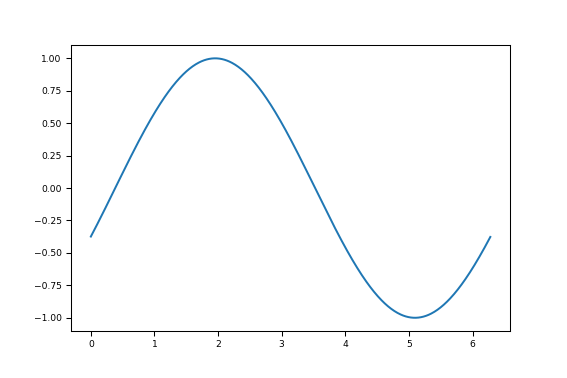

In [264]:
%matplotlib nbagg
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)        # x-array
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
    interval=25, blit=True)

In [241]:
frames1

[array([[ 21.5 ,  22.25,  21.75,  20.75,  23.5 ,  23.  ,  21.  ,  20.75],
        [ 20.75,  21.75,  22.  ,  22.75,  22.  ,  22.5 ,  22.  ,  21.25],
        [ 21.  ,  21.75,  21.  ,  21.5 ,  22.25,  21.  ,  21.25,  20.75],
        [ 20.75,  22.25,  22.25,  21.25,  21.25,  20.75,  21.  ,  22.  ],
        [ 21.75,  22.  ,  22.75,  22.  ,  22.  ,  22.  ,  21.25,  20.  ],
        [ 22.75,  23.75,  26.75,  24.  ,  22.  ,  22.  ,  22.  ,  21.25],
        [ 23.  ,  25.5 ,  27.25,  27.  ,  22.25,  21.25,  21.25,  20.25],
        [ 22.5 ,  24.25,  28.  ,  26.  ,  24.  ,  21.5 ,  22.75,  21.75]]),
 array([[ 22.25,  22.5 ,  22.5 ,  21.  ,  22.25,  22.75,  20.75,  21.75],
        [ 21.75,  22.  ,  22.25,  21.  ,  22.  ,  22.  ,  22.5 ,  22.75],
        [ 20.25,  22.25,  21.5 ,  22.25,  21.5 ,  21.75,  21.25,  21.5 ],
        [ 22.25,  21.  ,  22.25,  22.25,  22.25,  21.25,  21.75,  21.75],
        [ 22.25,  22.5 ,  22.25,  22.25,  22.25,  22.75,  22.5 ,  21.25],
        [ 23.  ,  23.5 ,  26.25,  24

In [ ]:
print(states_left,states_middle,states_right)
# states_left[0][1] - states_left[0][0]

In [ ]:
#entry wise product (Hadamard product)

In [ ]:
# from scipy import signal.savgol_filter
# y = savgol_filter(x, 5, 2)

In [ ]:
left = []
middle = []
right = []
df_temp_diffA = []
# x.append([1, 0, 1])
left = np.diff(df_tempMeans_thresh.iloc[:][0])
middle = np.diff(df_tempMeans_thresh.iloc[:][1])
right = np.diff(df_tempMeans_thresh.iloc[:][2])
df_temp_diffA.append(left)
df_temp_diffA.append(middle)
df_temp_diffA.append(right)
df_temp_diff1 = pd.DataFrame(df_temp_diffA)
df_temp_diff1 = df_temp_diff1.T

In [ ]:
assert df_temp_diff1.iloc[:,0].sum() == False


In [ ]:
for i in range(len(x)):
    print(x[i])

In [ ]:
df_temp_diff_test = df_tempMeans_thresh.diff()[1:]


In [252]:
plt.plot(df_temp_diff_test.iloc[:][0])
plt.plot(df_temp_diff_test.iloc[:][1])
plt.plot(df_temp_diff_test.iloc[:][2])
plt.show()

NameError: name 'df_temp_diff_test' is not defined